# Seminarski rad iz ''Uvoda u nauku o podacima''
## Predviđanje zadovoljstva kupaca korišćenjem mašinskog učenja

**Studenti:** Vuk Trajanović, Mirko Mihajlović  
**Predmet:** Uvod u nauku o podacima  
**Datum:** Oktobar 2025   
**Profesor:** Branko Arsić

## **1. Uvod**

U ovom projektu analiziramo dataset koji sadrži informacije o zadovoljstvu kupaca aviokompanija. Cilj je razviti model mašinskog učenja koji može predvideti da li će kupac biti zadovoljan ili nezadovoljan na osnovu različitih faktora.


**Ciljana promenljiva:** `satisfaction` (zadovoljan/nezadovoljan)

## **2. Učitavanje podataka**

Učitavamo podatke iz fajla "Airline_customer_satisfaction.csv"

In [1]:
import pandas as pd

data = pd.read_csv("Airline_customer_satisfaction.csv")
data

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


Prikazujemo koliko imamo kolona i redova

In [2]:
print(f"Dimenzije dataseta: {data.shape}")
print(f"Broj redova: {data.shape[0]}")
print(f"Broj kolona: {data.shape[1]}")

Dimenzije dataseta: (129880, 22)
Broj redova: 129880
Broj kolona: 22


Prikazujemo informacije dataseta

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

Prikazujemo opis, i koliko ima nepostojećih vrednosti u kolonama

In [4]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## **3. Eksploratorna analiza podataka (EDA)**

U ovom delu ćemo detaljno analizirati podatke kako bismo razumeli njihovu strukturu, distribuciju i međusobne odnose.

### **3.1 Univarijantna analiza**

Univarijantna analiza pomaže nam da razumemo distribuciju pojedinačnih promenljivih.

#### **3.1.1 Kategorijske promenljive**

Pravimo metodu za štampanje plotova kategorijskih promenljivih.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categoric(data, column):
    plt.figure(figsize=(10, 6))
    value_counts = data[column].value_counts()

    df = value_counts.reset_index()
    df.columns = [column, 'count']

    ax = sns.barplot(
        data=df,
        x=column,
        y='count',
        order=df[column],  
        palette=['#228B22', '#FFD700', '#FF4500'][:len(df)]
    )

    plt.title(f'Barplot - {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Broj pojava', fontsize=10)

    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + (max(value_counts.values) * 0.01),
            int(p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

    print(f"\nDistribucija kategorija za {column}:")
    print(value_counts)
        

Analiziramo sve kategorijske podatke.





SATISFACTION


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\2989837001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


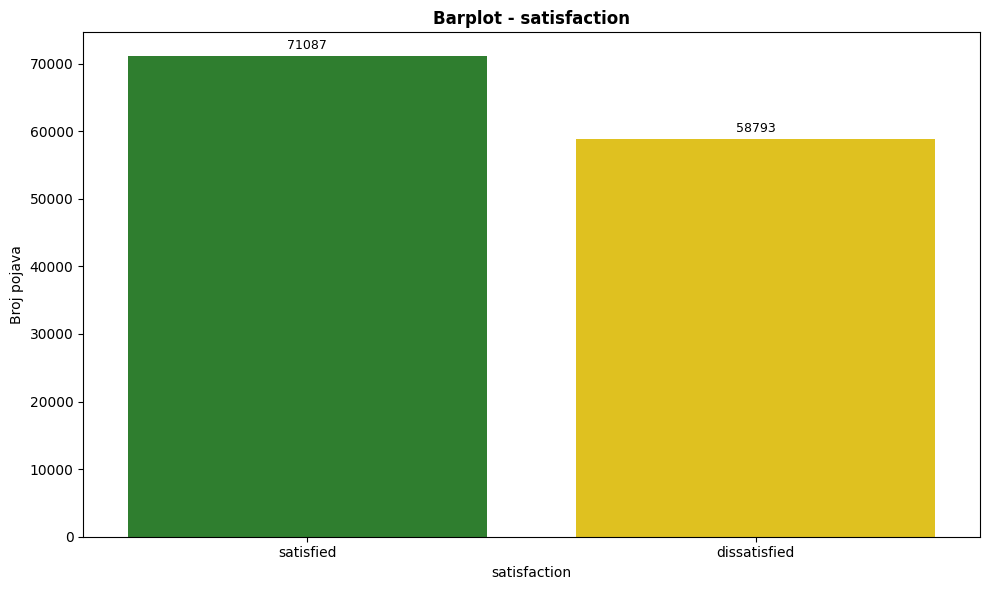

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\2989837001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(



Distribucija kategorija za satisfaction:
satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64




CUSTOMER TYPE


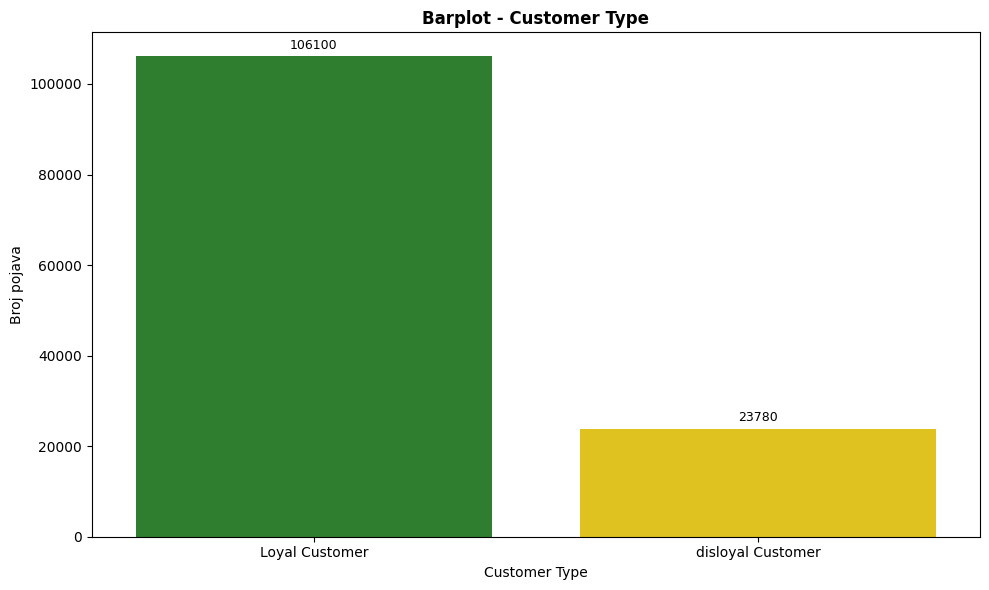


Distribucija kategorija za Customer Type:
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64




TYPE OF TRAVEL


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\2989837001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


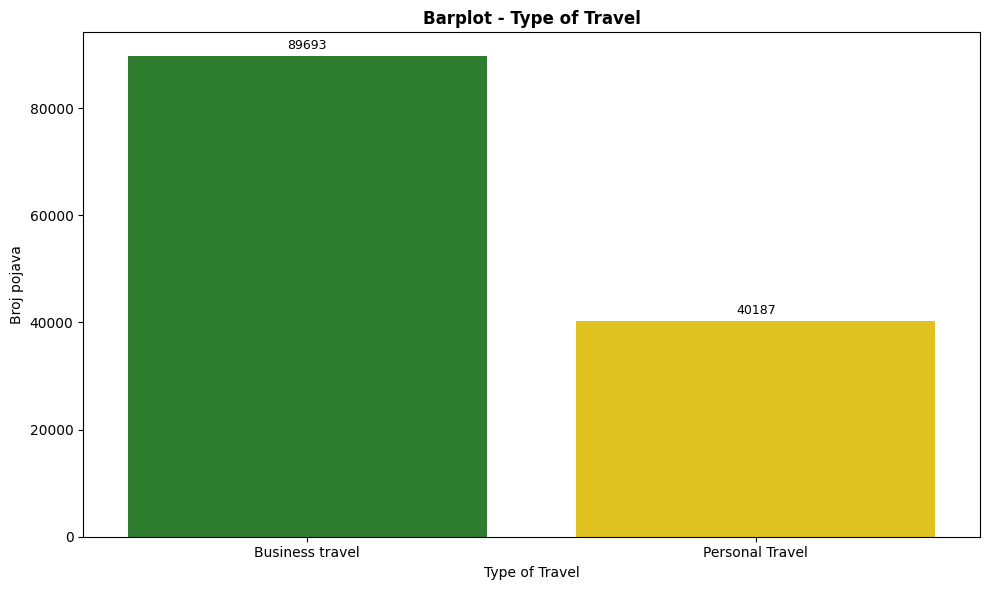

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\2989837001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(



Distribucija kategorija za Type of Travel:
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64




CLASS


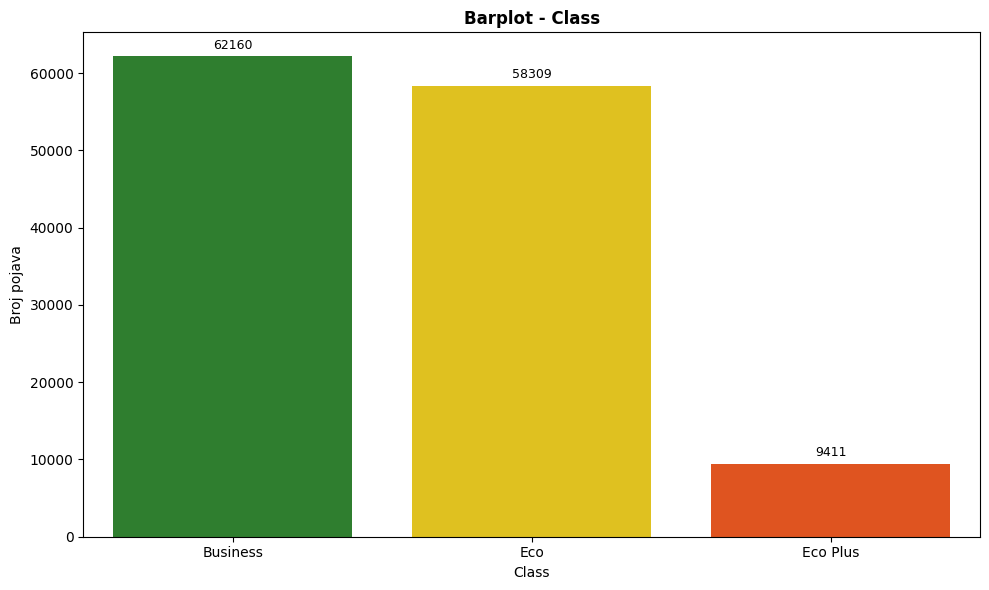


Distribucija kategorija za Class:
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


In [7]:
columns = ["satisfaction", "Customer Type", "Type of Travel","Class"]

# Analiza svih kategorijskih kolona


for column in columns:
    print(f"\n\n\n\n{'='*60}")
    print(f"{column.upper()}")
    print('='*60)
    plot_categoric(data, column)

#### **3.1.2 Numeričke promenljive**

Pravimo metodu za štampanje plotova numerički promenljivih promenljivih koje NISU ocene.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_numeric_nongrades(data, column):
    
    plt.figure(figsize=(14, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data[column], color="skyblue")
    plt.title(f'Boxplot - {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[column], kde=True, color="darkgreen", bins=30)
    plt.title(f'Histogram - {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frekvencija', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Osnovne statistike
    print(f"\nOsnovne statistike za {column}:")
    print(f"  Srednja vrednost: {data[column].mean():.2f}")
    print(f"  Medijana: {data[column].median():.2f}")
    print(f"  St. devijacija: {data[column].std():.2f}")
    print(f"  Min: {data[column].min():.2f}")
    print(f"  Max: {data[column].max():.2f}")
    
    # D'Agostino K^2 test za normalnost
    stat, p = stats.normaltest(data[column])
    print(f"\nD'Agostino K^2 test za {column}: stat={stat:.3f}, p-vrednost={p:.3f}")
    
    if p > 0.05:
        print(f"Podaci su normalno raspoređeni")
    else:
        print(f"Podaci nisu normalno raspoređeni")


Pravimo grafike





AGE


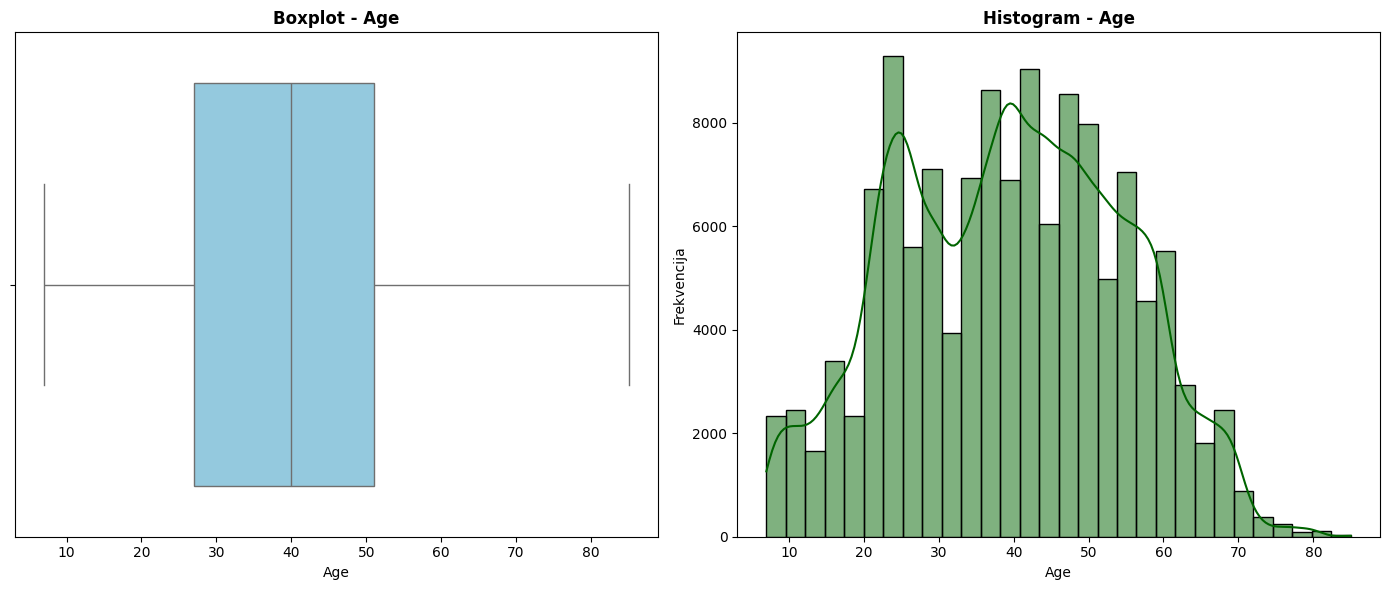


Osnovne statistike za Age:
  Srednja vrednost: 39.43
  Medijana: 40.00
  St. devijacija: 15.12
  Min: 7.00
  Max: 85.00

D'Agostino K^2 test za Age: stat=7524.622, p-vrednost=0.000
Podaci nisu normalno raspoređeni




FLIGHT DISTANCE


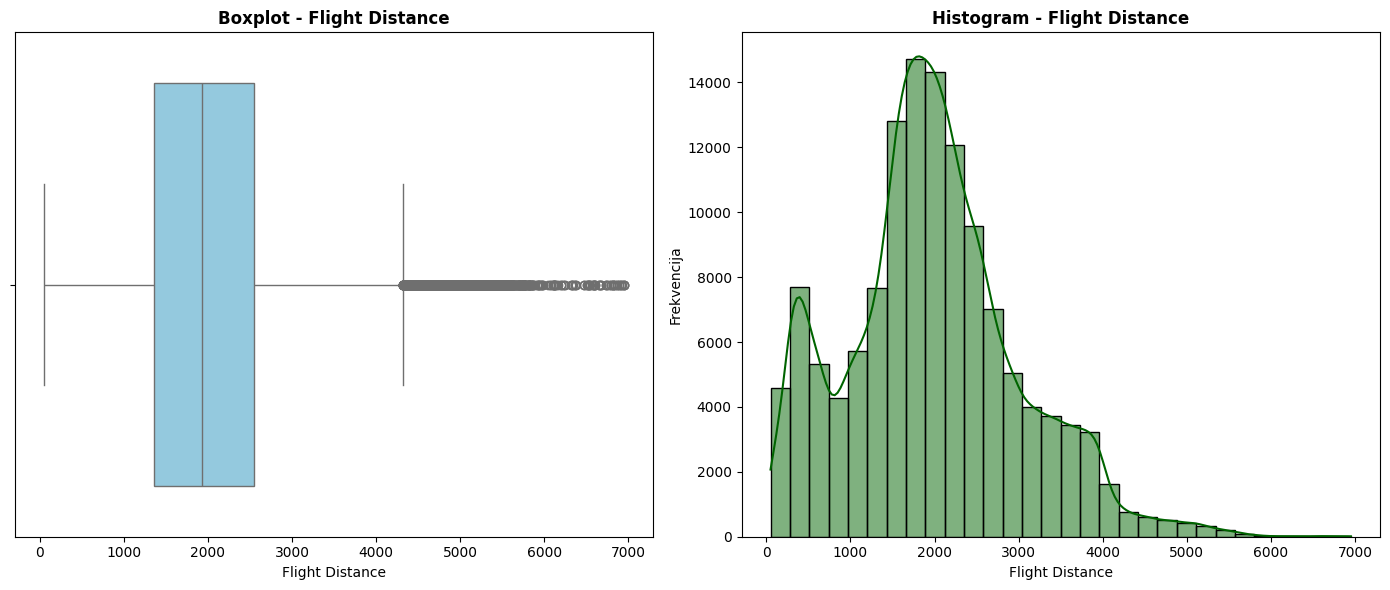


Osnovne statistike za Flight Distance:
  Srednja vrednost: 1981.41
  Medijana: 1925.00
  St. devijacija: 1027.12
  Min: 50.00
  Max: 6951.00

D'Agostino K^2 test za Flight Distance: stat=4795.466, p-vrednost=0.000
Podaci nisu normalno raspoređeni




DEPARTURE DELAY IN MINUTES


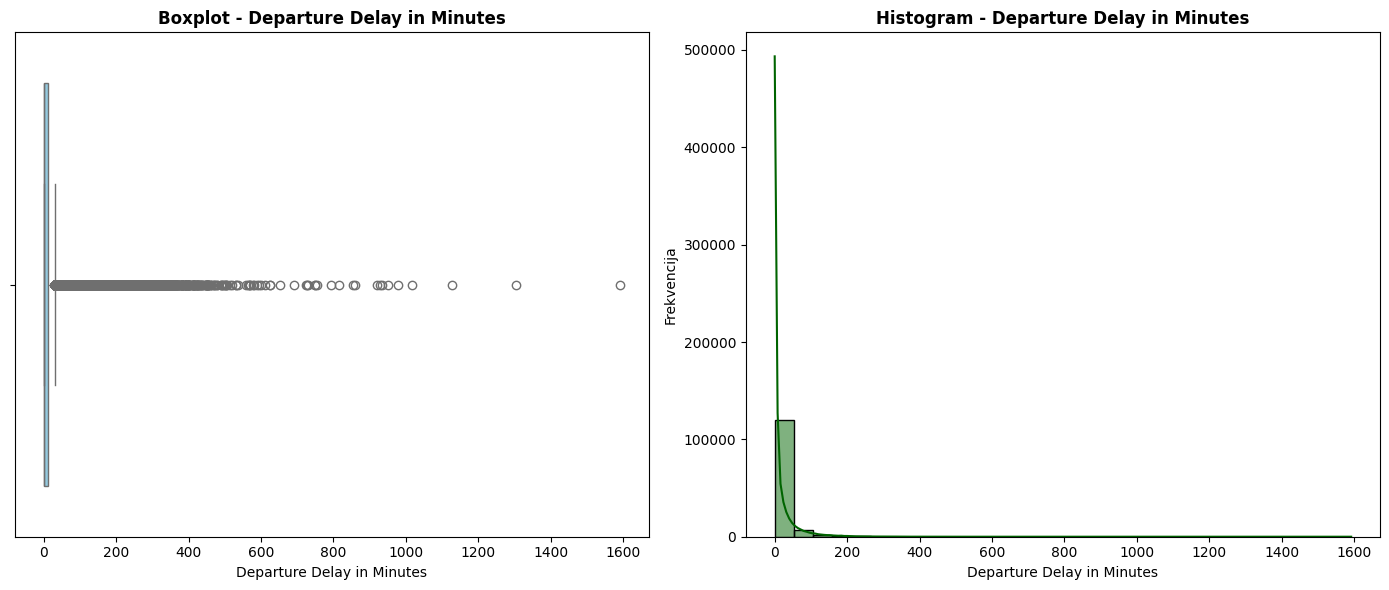


Osnovne statistike za Departure Delay in Minutes:
  Srednja vrednost: 14.71
  Medijana: 0.00
  St. devijacija: 38.07
  Min: 0.00
  Max: 1592.00

D'Agostino K^2 test za Departure Delay in Minutes: stat=165379.251, p-vrednost=0.000
Podaci nisu normalno raspoređeni




ARRIVAL DELAY IN MINUTES


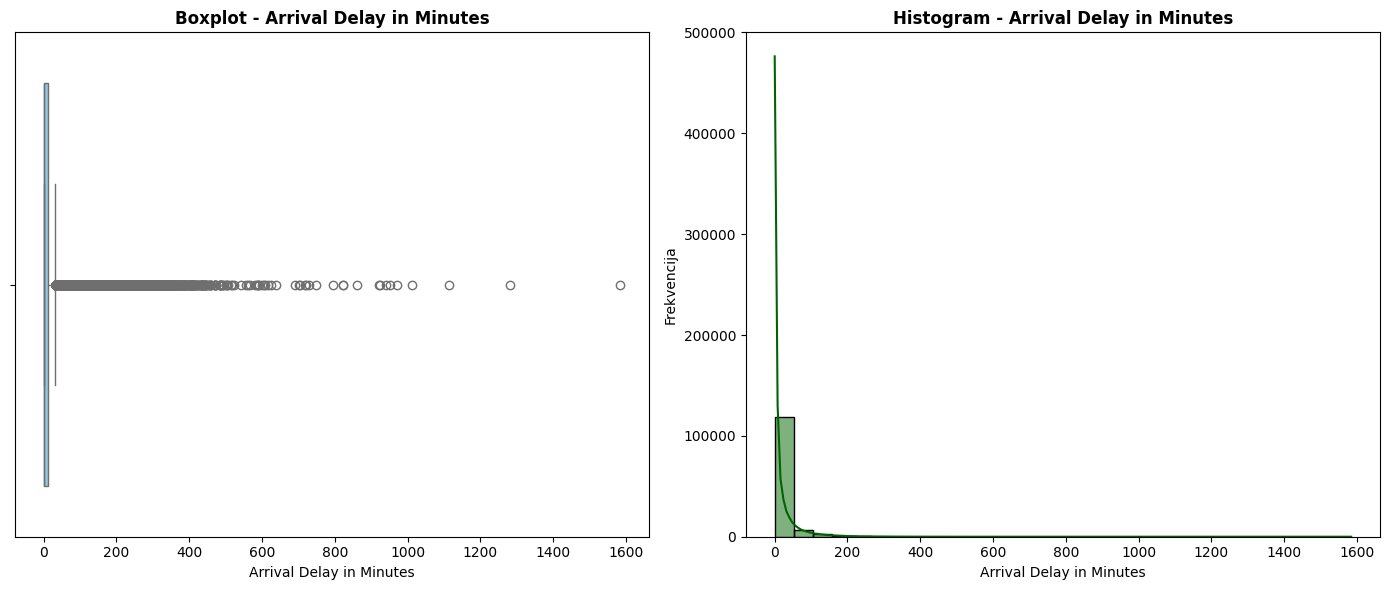


Osnovne statistike za Arrival Delay in Minutes:
  Srednja vrednost: 15.09
  Medijana: 0.00
  St. devijacija: 38.47
  Min: 0.00
  Max: 1584.00

D'Agostino K^2 test za Arrival Delay in Minutes: stat=nan, p-vrednost=nan
Podaci nisu normalno raspoređeni


In [9]:
columns = ["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
# Analiza svih Numerički kolona koje ne predstavljaju ocene.


for column in columns:
    print(f"\n\n\n\n{'='*60}")
    print(f"{column.upper()}")
    print('='*60)
    plot_numeric_nongrades(data, column)

Gledamo promenljive koje predstavljaju ocene (nema razloga da koristimo histogram, ima samo 6 vrednosti, barplot je daleko pregledniji)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_numeric_grades(data, column):
    value_counts_sorted = data[column].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    
    palette = sns.color_palette("RdYlGn", 6)

    sns.barplot(x=value_counts_sorted.index, 
                y=value_counts_sorted.values, 
                palette=palette)
    
    plt.title(f'Barplot - {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Broj pojava', fontsize=10)
    
    for i, v in enumerate(value_counts_sorted.values):
        plt.text(i, v + max(value_counts_sorted.values) * 0.01, 
                 str(v), 
                 ha='center', 
                 fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nDistribucija ocene za {column}:")
    print(value_counts_sorted)





SEAT COMFORT


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


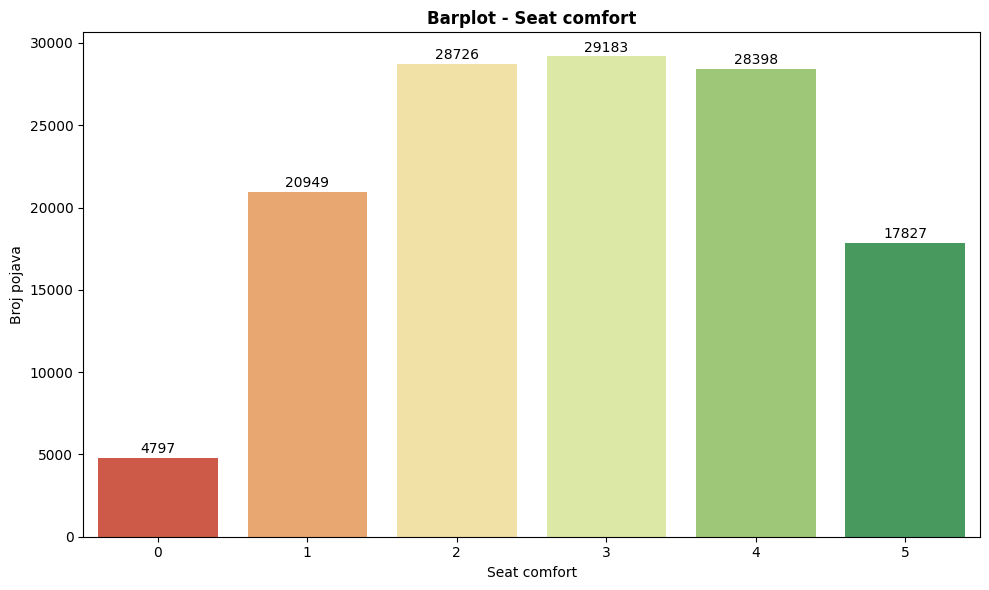


Distribucija ocene za Seat comfort:
Seat comfort
0     4797
1    20949
2    28726
3    29183
4    28398
5    17827
Name: count, dtype: int64




DEPARTURE/ARRIVAL TIME CONVENIENT


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


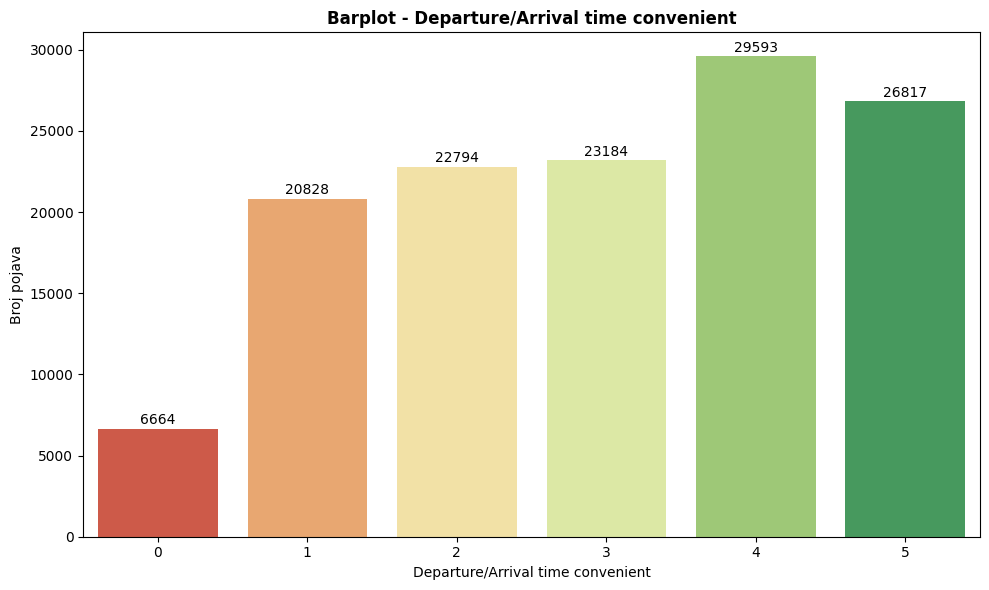


Distribucija ocene za Departure/Arrival time convenient:
Departure/Arrival time convenient
0     6664
1    20828
2    22794
3    23184
4    29593
5    26817
Name: count, dtype: int64




FOOD AND DRINK


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


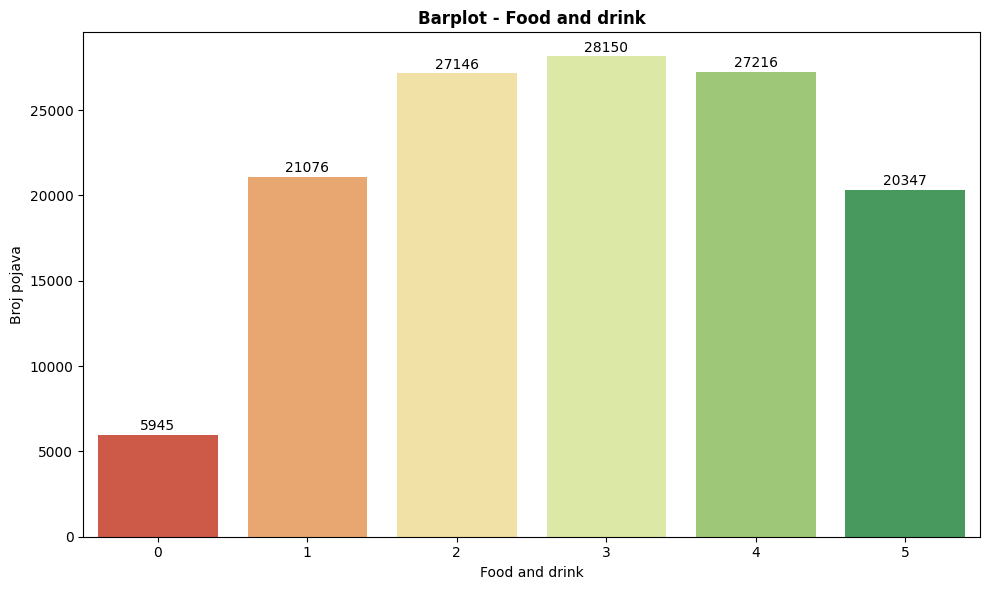


Distribucija ocene za Food and drink:
Food and drink
0     5945
1    21076
2    27146
3    28150
4    27216
5    20347
Name: count, dtype: int64




GATE LOCATION


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


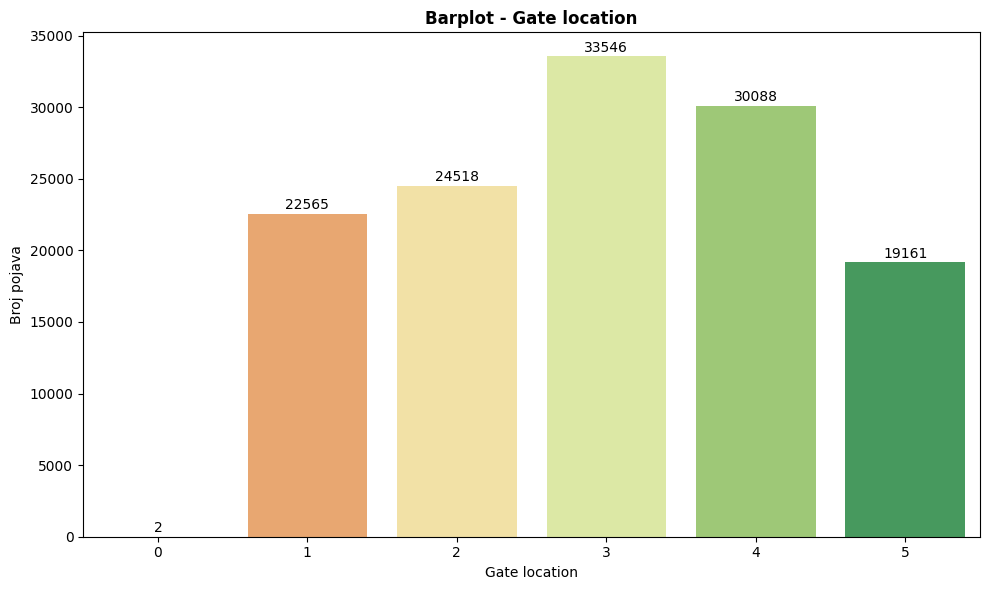

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,



Distribucija ocene za Gate location:
Gate location
0        2
1    22565
2    24518
3    33546
4    30088
5    19161
Name: count, dtype: int64




INFLIGHT WIFI SERVICE


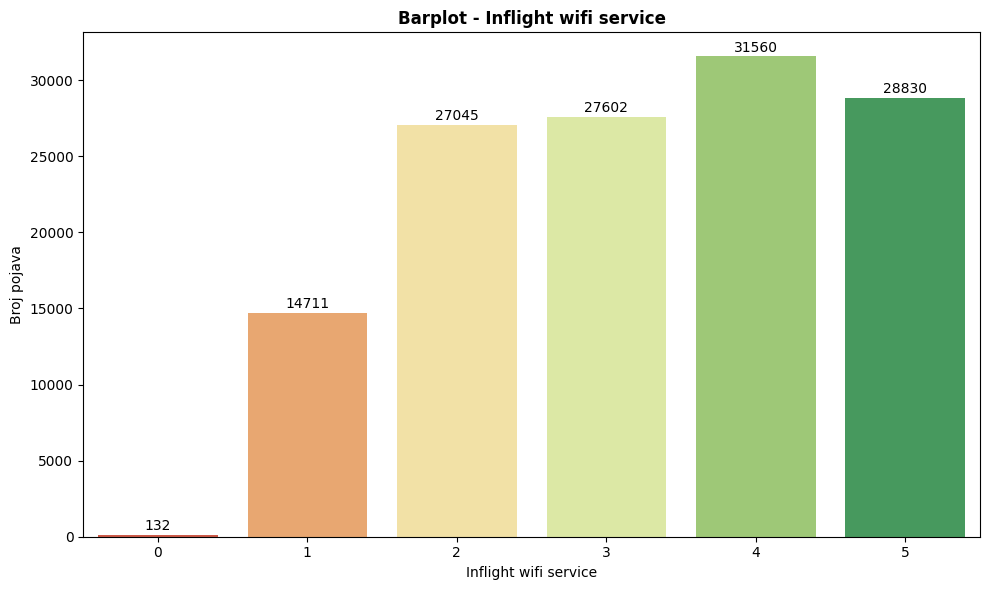


Distribucija ocene za Inflight wifi service:
Inflight wifi service
0      132
1    14711
2    27045
3    27602
4    31560
5    28830
Name: count, dtype: int64




INFLIGHT ENTERTAINMENT


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


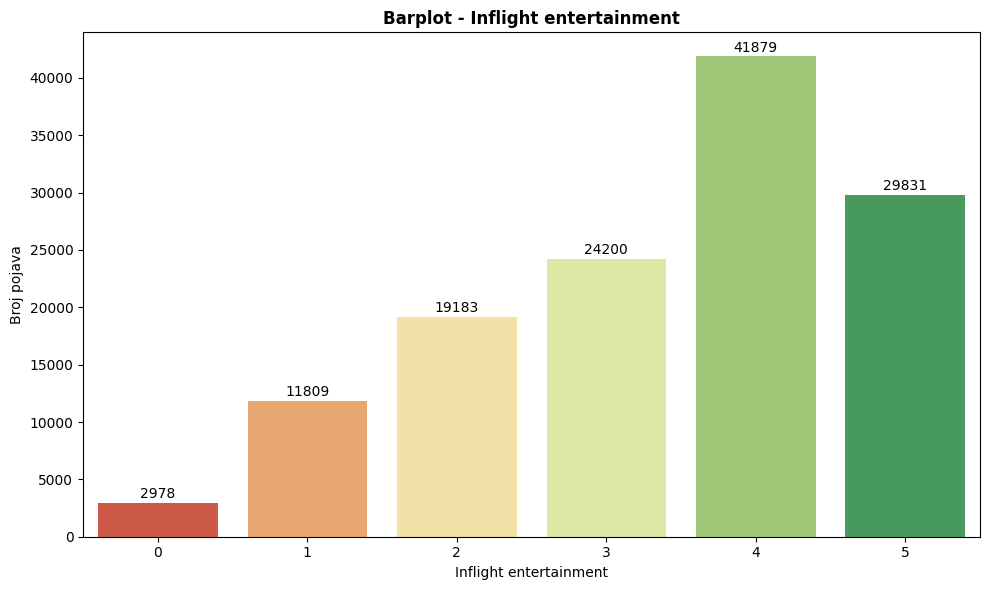


Distribucija ocene za Inflight entertainment:
Inflight entertainment
0     2978
1    11809
2    19183
3    24200
4    41879
5    29831
Name: count, dtype: int64




ONLINE SUPPORT


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


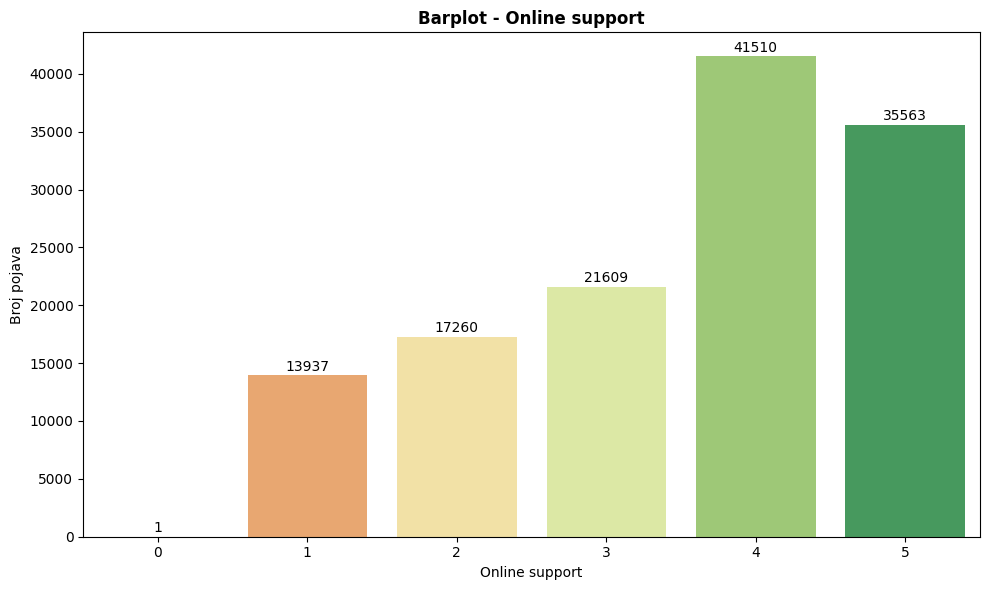


Distribucija ocene za Online support:
Online support
0        1
1    13937
2    17260
3    21609
4    41510
5    35563
Name: count, dtype: int64




EASE OF ONLINE BOOKING


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


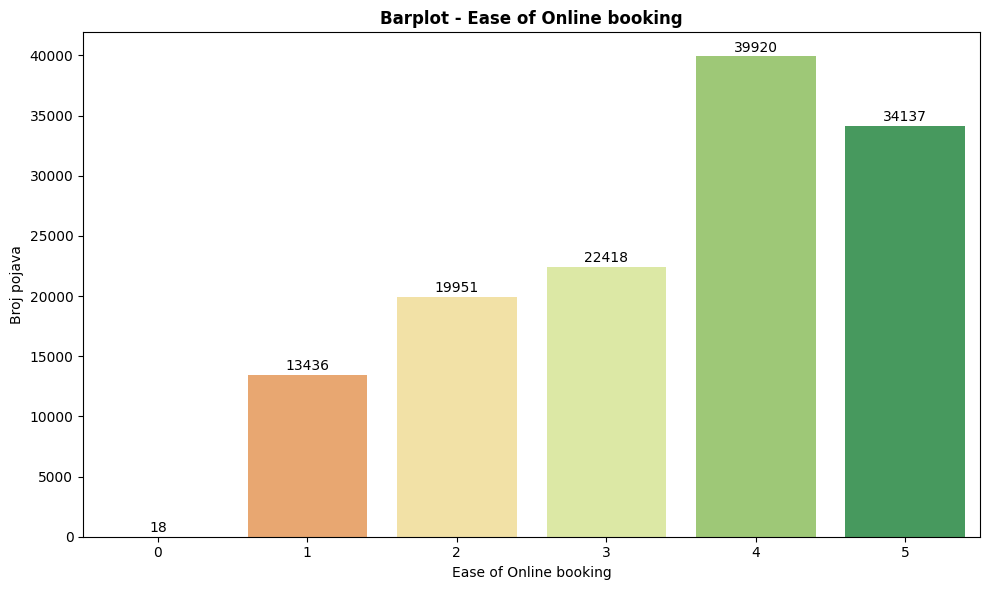


Distribucija ocene za Ease of Online booking:
Ease of Online booking
0       18
1    13436
2    19951
3    22418
4    39920
5    34137
Name: count, dtype: int64




ON-BOARD SERVICE


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


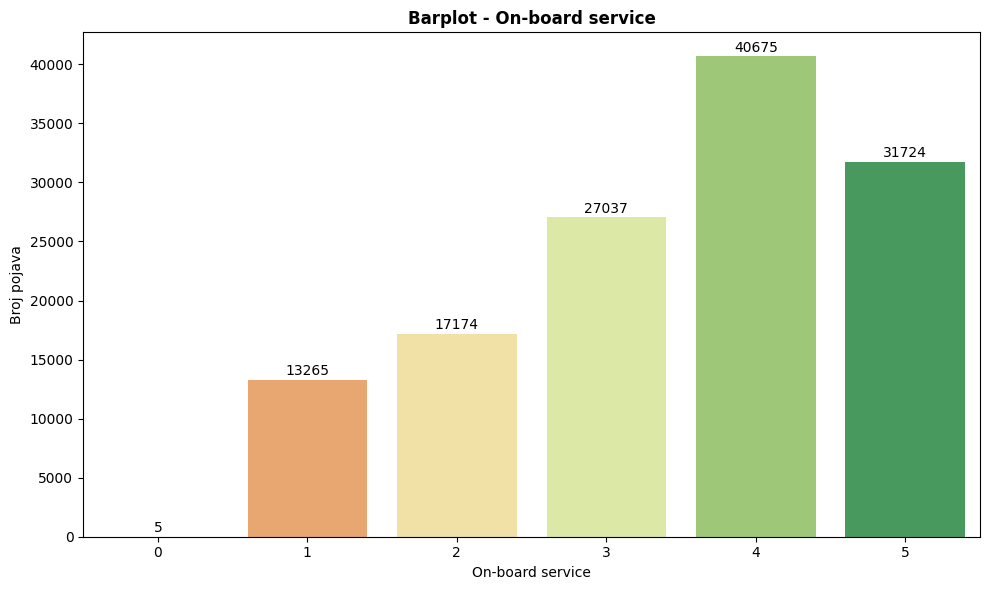


Distribucija ocene za On-board service:
On-board service
0        5
1    13265
2    17174
3    27037
4    40675
5    31724
Name: count, dtype: int64




LEG ROOM SERVICE


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


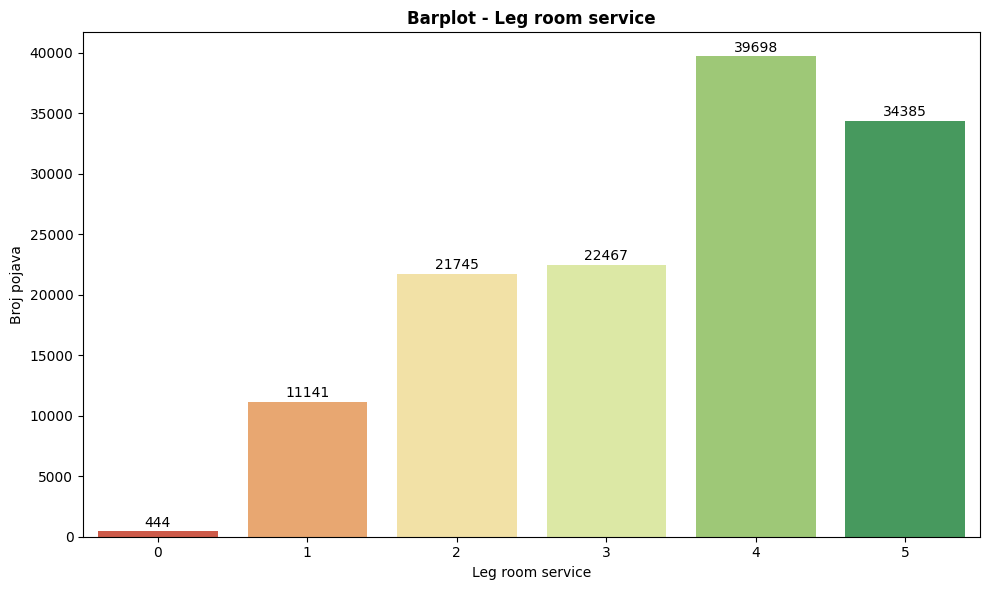


Distribucija ocene za Leg room service:
Leg room service
0      444
1    11141
2    21745
3    22467
4    39698
5    34385
Name: count, dtype: int64




BAGGAGE HANDLING


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x=value_counts_sorted.index,


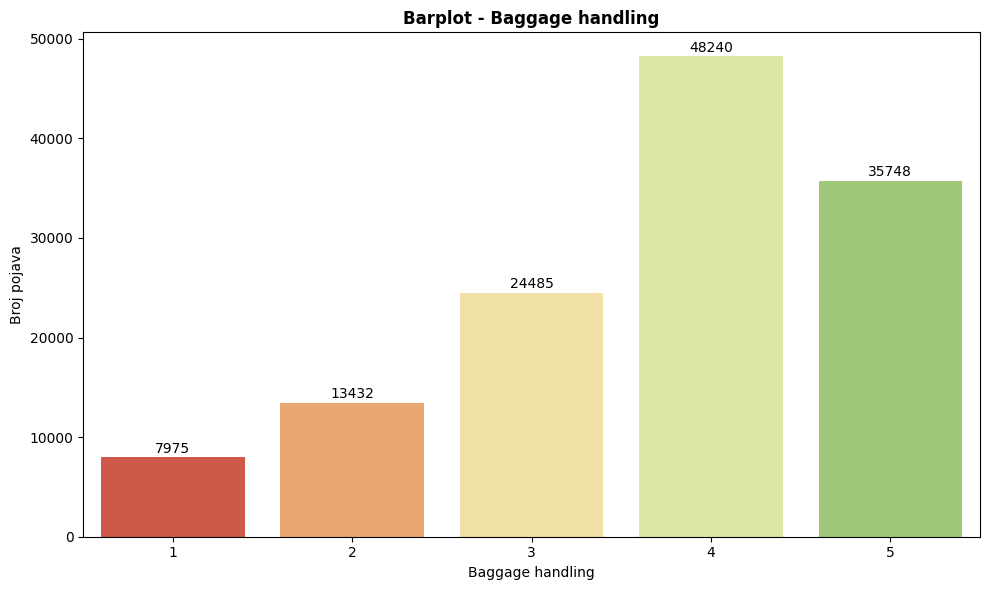


Distribucija ocene za Baggage handling:
Baggage handling
1     7975
2    13432
3    24485
4    48240
5    35748
Name: count, dtype: int64




CHECKIN SERVICE


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


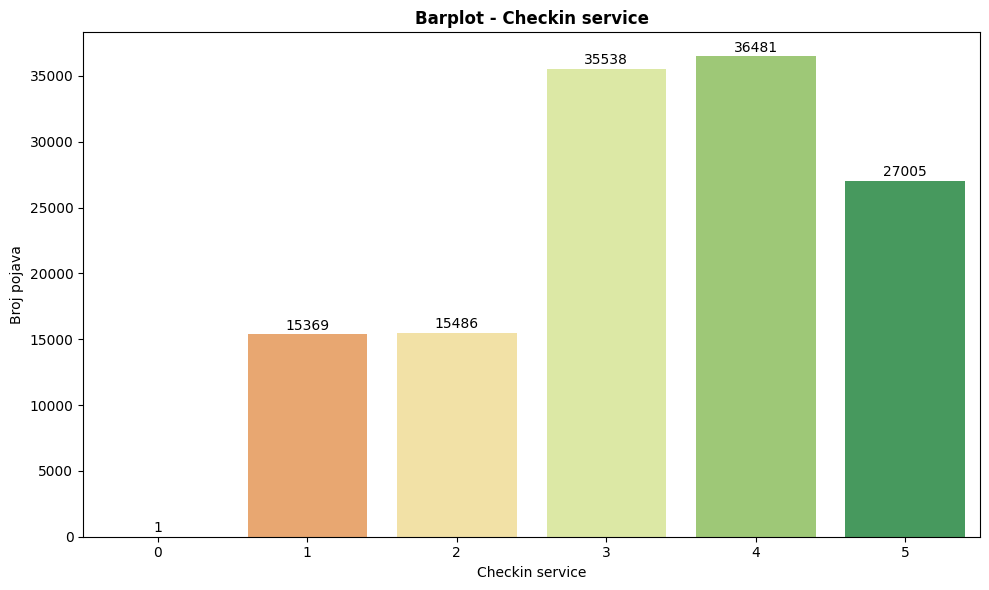


Distribucija ocene za Checkin service:
Checkin service
0        1
1    15369
2    15486
3    35538
4    36481
5    27005
Name: count, dtype: int64




CLEANLINESS


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


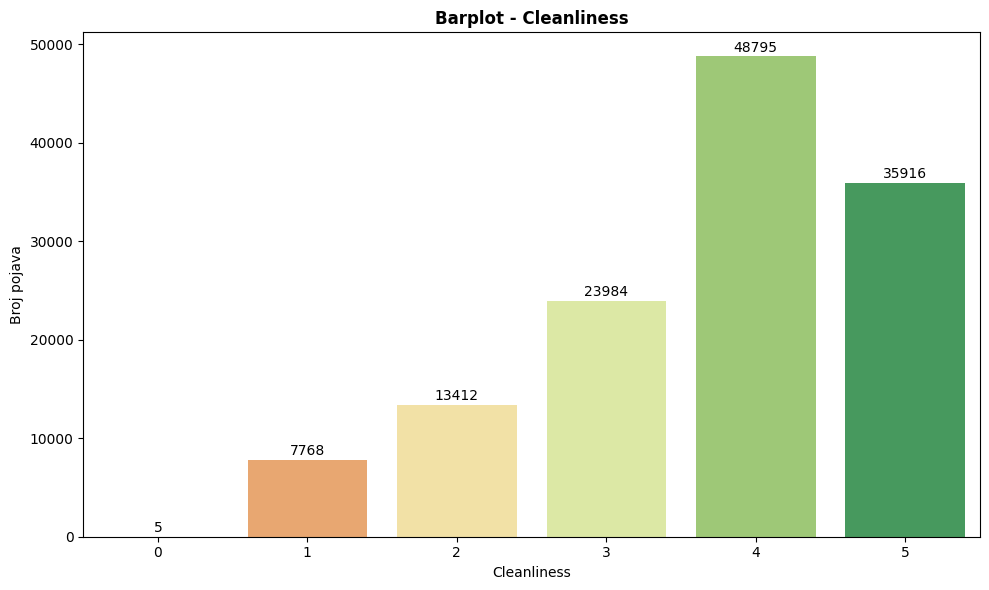


Distribucija ocene za Cleanliness:
Cleanliness
0        5
1     7768
2    13412
3    23984
4    48795
5    35916
Name: count, dtype: int64




ONLINE BOARDING


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\1852627415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_sorted.index,


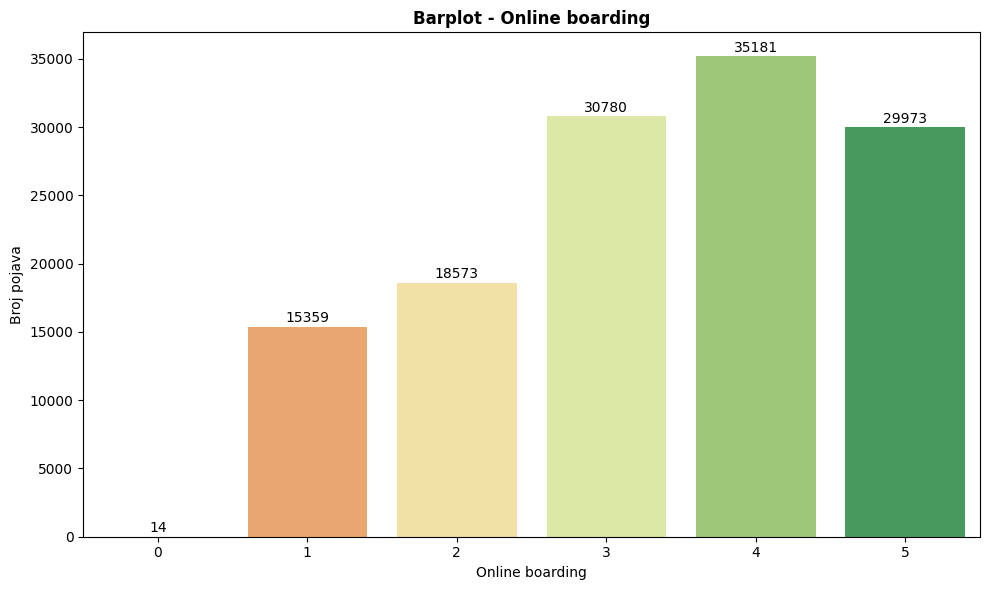


Distribucija ocene za Online boarding:
Online boarding
0       14
1    15359
2    18573
3    30780
4    35181
5    29973
Name: count, dtype: int64


In [11]:
notColumns = ["satisfaction", "Customer Type", "Type of Travel", "Class",
              "Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]
columns = [column for column in data.columns if column not in notColumns]
# Analiza svih Numerički kolona koje predstavljaju ocene.


for column in columns:
    print(f"\n\n\n\n{'='*60}")
    print(f"{column.upper()}")
    print('='*60)
    plot_numeric_grades(data, column)
    
 

## **4. Čišćenje podataka**

U ovom delu ćemo obraditi nedostajuće vrednosti, outliere i nevalidne vrednosti.

### **4.1 Uklanjanje nepravilnih vrednosti**

Pretvaramo sve ocene 0 u NaN

In [12]:
import numpy as np

notColumns = [
    "satisfaction", "Customer Type", "Type of Travel", "Class",
    "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"
]


columns_to_clean = [column for column in data.columns if column not in notColumns]



for col in columns_to_clean:
    if pd.api.types.is_numeric_dtype(data[col]):
        initial_nan_count = data[col].isnull().sum()
        

        zero_count = (data[col] == 0).sum()
        
        # Izvršavanje zamene
        data[col].replace(0, np.nan, inplace=True)
        

print("\nČišćenje je završeno. Novi NaN-ovi su sada spremni za imputaciju (npr. Modom ili KNN-om).")



Čišćenje je završeno. Novi NaN-ovi su sada spremni za imputaciju (npr. Modom ili KNN-om).


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\4223117766.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(0, np.nan, inplace=True)


In [13]:
data.isnull().sum()

satisfaction                            0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Seat comfort                         4797
Departure/Arrival time convenient    6664
Food and drink                       5945
Gate location                           2
Inflight wifi service                 132
Inflight entertainment               2978
Online support                          1
Ease of Online booking                 18
On-board service                        5
Leg room service                      444
Baggage handling                        0
Checkin service                         1
Cleanliness                             5
Online boarding                        14
Departure Delay in Minutes              0
Arrival Delay in Minutes              393
dtype: int64

### **4.2 Rešavanje nedostajućih vrednosti**

Koristimo KNN-inputer za inputaciju u ArrivalDelay kolonu

In [14]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder


data_knn = data.copy()


numeric_cols = data_knn.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data_knn.select_dtypes(include=['object']).columns.tolist()

nominal_cols = ['satisfaction', 'Customer Type', 'Type of Travel']
ordinal_cols = [col for col in categorical_cols if col not in nominal_cols]

#Enkodiranje kategoričkih promenljivih (Ovo ćemo kasnije takođe raditi pre modeliranja)
label_encoders = {}
for col in ordinal_cols:
    le = LabelEncoder()
    data_knn[col] = le.fit_transform(data_knn[col].astype(str))
    label_encoders[col] = le
    
    
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_data = pd.DataFrame(
    ohe.fit_transform(data_knn[nominal_cols]),
    columns=ohe.get_feature_names_out(nominal_cols),
    index=data_knn.index
)    

data_knn = pd.concat([data_knn[numeric_cols + ordinal_cols], ohe_data], axis=1)

# Skaliranje numeričkih promenljivih
scaler = StandardScaler()
data_knn[numeric_cols] = scaler.fit_transform(data_knn[numeric_cols])

# Moramo na 3, ako stavimo na 5, izvršavanje će trajati minut i po!!
knn_imputer = KNNImputer(n_neighbors=3) 
data_imputed_array = knn_imputer.fit_transform(data_knn)

data_imputed = pd.DataFrame(data_imputed_array, columns=data_knn.columns)



#Inverzno skaliranje numeričkih kolona
data_imputed[numeric_cols] = scaler.inverse_transform(data_imputed[numeric_cols])


for col in ordinal_cols:
    data_imputed[col] = data_imputed[col].round().astype(int)
    data_imputed[col] = label_encoders[col].inverse_transform(data_imputed[col])


data['Arrival Delay in Minutes'] = data_imputed['Arrival Delay in Minutes']

# Provera posle imputacije
print("\nUspeh: 'Arrival Delay in Minutes' je imputirana.")
print(f"NaN u 'Arrival Delay in Minutes' posle KNN: {data['Arrival Delay in Minutes'].isnull().sum()}")

data.isnull().sum()


Uspeh: 'Arrival Delay in Minutes' je imputirana.
NaN u 'Arrival Delay in Minutes' posle KNN: 0


satisfaction                            0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Seat comfort                         4797
Departure/Arrival time convenient    6664
Food and drink                       5945
Gate location                           2
Inflight wifi service                 132
Inflight entertainment               2978
Online support                          1
Ease of Online booking                 18
On-board service                        5
Leg room service                      444
Baggage handling                        0
Checkin service                         1
Cleanliness                             5
Online boarding                        14
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
dtype: int64

Rešićemo problem nedostajućih vrednosti kod ocena Modom (Najčešća ocena) ILI Brisanjem.

In [15]:
grade_columns = [
    'Seat comfort',                        # 4797 NULA
    'Food and drink',                      # 5945 NULA
    'Departure/Arrival time convenient',   # 6664 NULA
    'Inflight entertainment',              # 2978 NULA
    'Leg room service',                    # 444
    'Inflight wifi service',               # 132 NULA
    'Ease of Online booking',              # 18 NULA
    'Cleanliness',                         # 5 NULA
    'On-board service',                    # 5 NULA
    'Online boarding',                     # 14 NULA
    'Online support',                      # 1 NULA
    'Gate location',                       # 2 NULE
    'Checkin service',                     # 1 NULA
]

NAN_THRESHOLD = 50 
rows_dropped_total = 0

for col in grade_columns:
    nan_count = data[col].isnull().sum()
    
    # Proveravamo samo kolone koje imaju NaN vrednosti
    if nan_count > 0:
        if nan_count < NAN_THRESHOLD:
            # Brisanje (za mali broj anomaličnih 0)
            rows_before = len(data)
            data.dropna(subset=[col], inplace=True)
            rows_dropped = rows_before - len(data)
            rows_dropped_total += rows_dropped
                   
        else:
            # Imputacija Modom (za veliki broj anomaličnih 0)
            modus_vrednost = data[col].mode()[0] 
            data[col].fillna(modus_vrednost, inplace=True)
            
            data[col] = data[col].astype(int)

print(f"\nUKUPNO REDOVA OBRISANO: {rows_dropped_total}")
print("Sve kolone sa ocenama su sada čiste i sadrže samo vrednosti od 1 do 5.")
data.isnull().sum()



UKUPNO REDOVA OBRISANO: 21
Sve kolone sa ocenama su sada čiste i sadrže samo vrednosti od 1 do 5.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\739195890.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(modus_vrednost, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26348\739195890.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Sada su ostale samo vrednosti 1-5

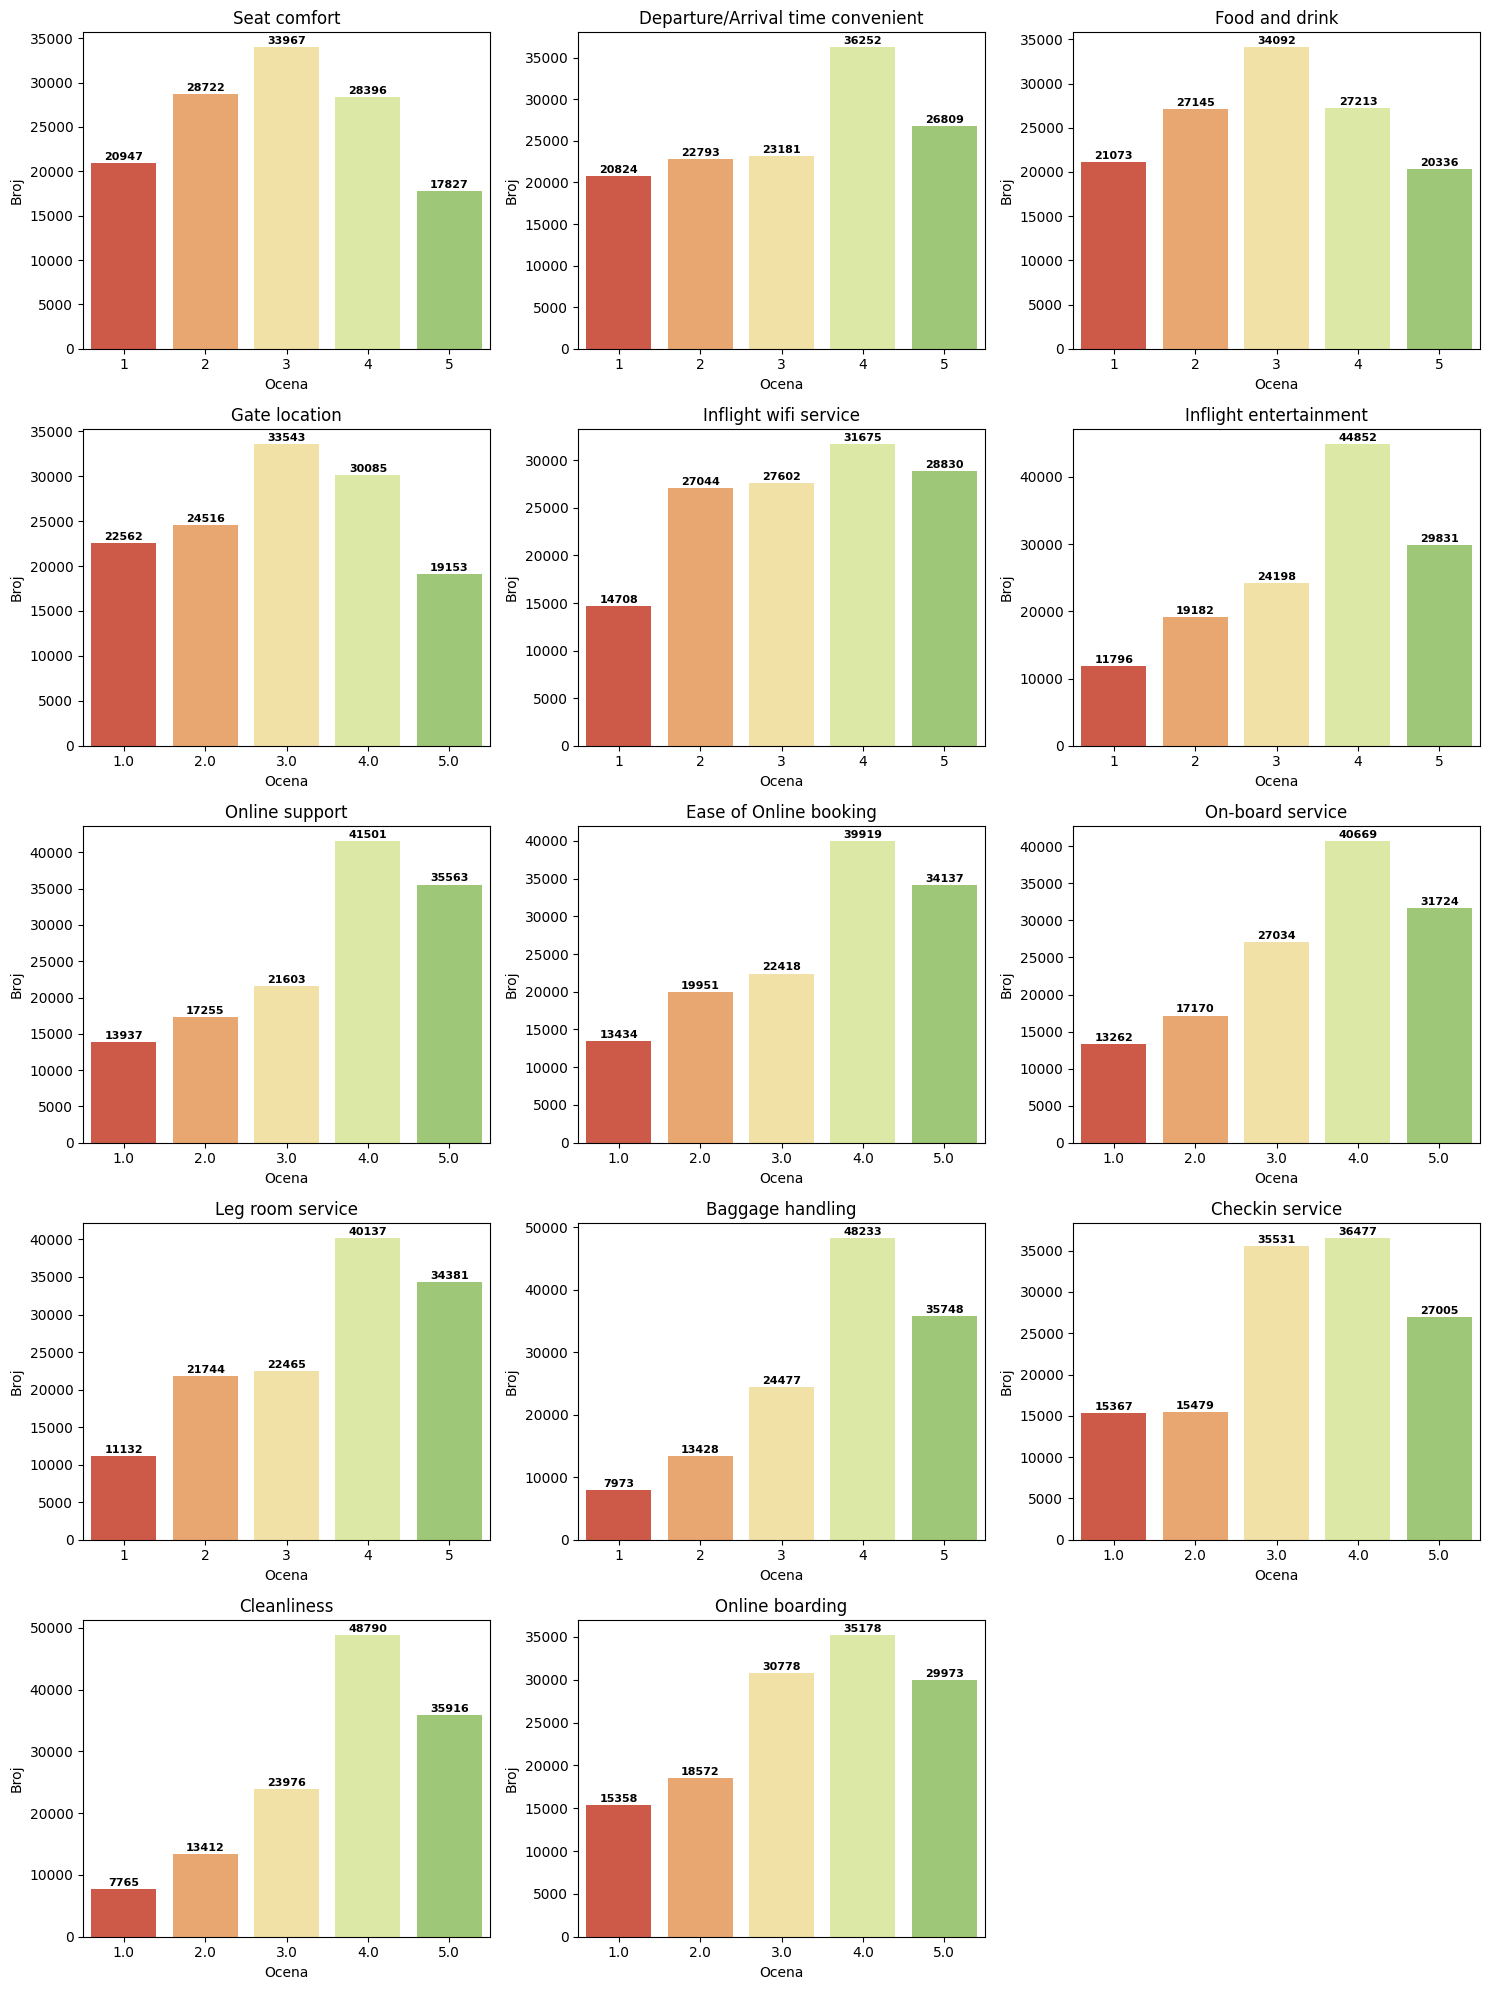

In [16]:
import warnings
import math
warnings.filterwarnings("ignore")

notColumns = ["satisfaction", "Customer Type", "Type of Travel", "Class",
              "Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
columns = [column for column in data.columns if column not in notColumns]


def plot_grade_grid(data, grade_columns, cols_per_row=3, fig_width=15, fig_height_per_row=4):
   
    num_cols = len(grade_columns)
    num_rows = math.ceil(num_cols / cols_per_row)
    
    fig, axes = plt.subplots(num_rows, cols_per_row, 
                             figsize=(fig_width, num_rows * fig_height_per_row))
    
    
    if num_rows == 1 and cols_per_row == 1:
        axes = np.array([axes])
    elif num_rows == 1 or cols_per_row == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    palette = sns.color_palette("RdYlGn", 6)

    for i, col in enumerate(grade_columns):
        ax = axes[i]
        
        value_counts_sorted = data[col].value_counts().sort_index()

        sns.barplot(x=value_counts_sorted.index, 
                    y=value_counts_sorted.values, 
                    palette=palette, 
                    ax=ax)
        
        ax.set_title(f'{col}', fontsize=12)
        ax.set_xlabel('Ocena', fontsize=10)
        ax.set_ylabel('Broj', fontsize=10)
        
        max_v = max(value_counts_sorted.values) if len(value_counts_sorted.values) > 0 else 0
        for j, v in enumerate(value_counts_sorted.values):
            ax.text(j, v + max_v * 0.01, 
                    str(v), 
                    ha='center', 
                    fontsize=8, 
                    weight='bold')

    for i in range(num_cols, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
    
plot_grade_grid(data, columns, cols_per_row=3)


### **4.3 Rešavanje Outliera (Ekstremnih Vrednosti)**

Koristićemo Ograničavanje (Capping) za smanjenje uticaja outliera u kašnjenjima.

In [17]:
delay_cols = ["Departure Delay in Minutes","Arrival Delay in Minutes"]


k_multiplier = 3.0 

for col in delay_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Računanje gornje granice
    upper_bound = Q3 + k_multiplier * IQR
    
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    
    print(f"Varijabla '{col}': Gornja granica (k={k_multiplier}) postavljena na {upper_bound:.2f}")


Varijabla 'Departure Delay in Minutes': Gornja granica (k=3.0) postavljena na 48.00
Varijabla 'Arrival Delay in Minutes': Gornja granica (k=3.0) postavljena na 52.00


Ponovo ćemo prikazati boxplotove i histogram





DEPARTURE DELAY IN MINUTES


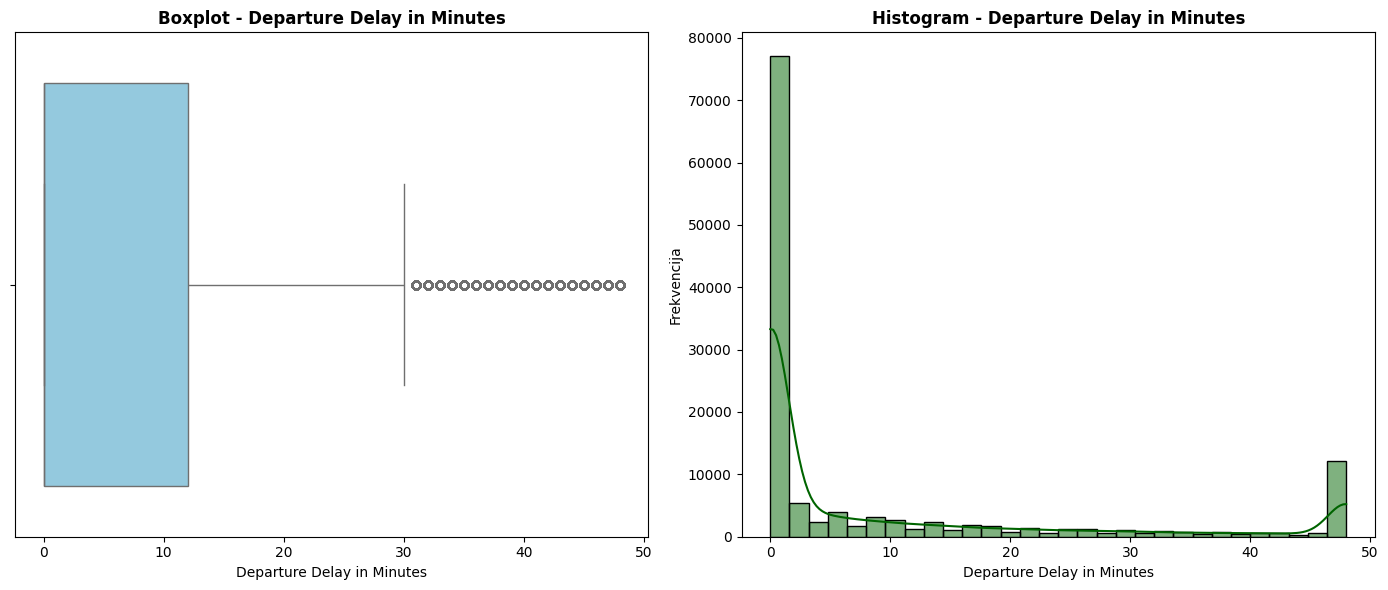


Osnovne statistike za Departure Delay in Minutes:
  Srednja vrednost: 9.42
  Medijana: 0.00
  St. devijacija: 15.73
  Min: 0.00
  Max: 48.00

D'Agostino K^2 test za Departure Delay in Minutes: stat=31969.944, p-vrednost=0.000
Podaci nisu normalno raspoređeni




ARRIVAL DELAY IN MINUTES


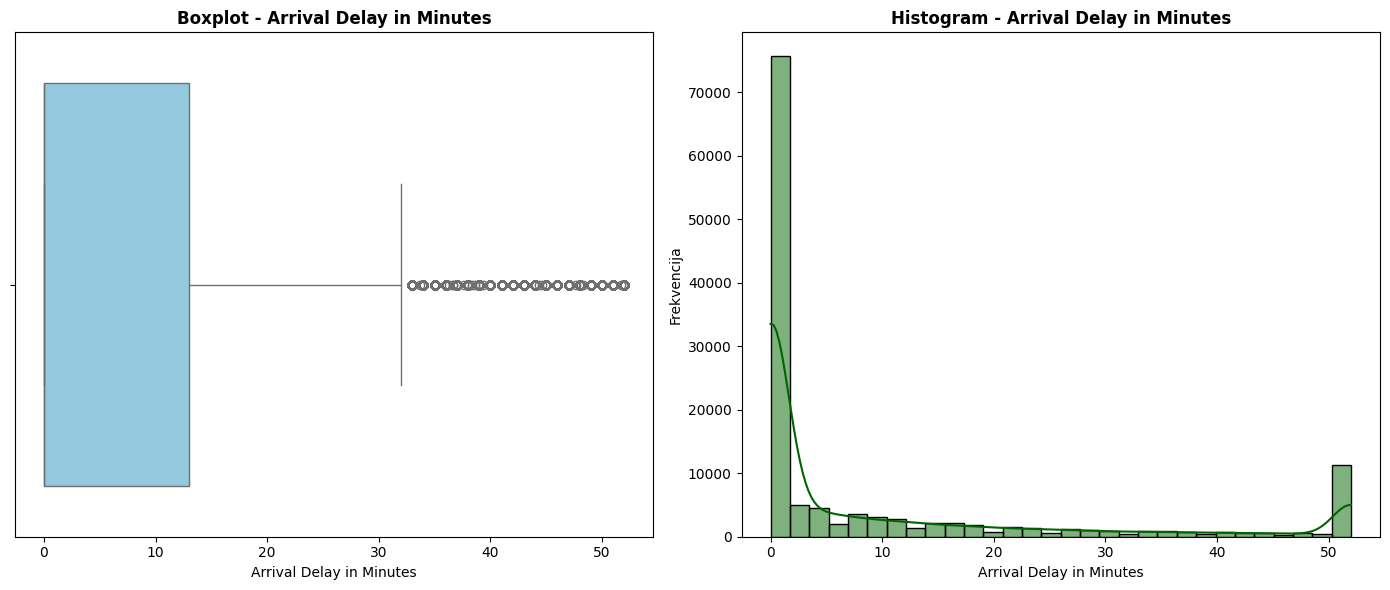


Osnovne statistike za Arrival Delay in Minutes:
  Srednja vrednost: 10.03
  Medijana: 0.00
  St. devijacija: 16.71
  Min: 0.00
  Max: 52.00

D'Agostino K^2 test za Arrival Delay in Minutes: stat=33276.764, p-vrednost=0.000
Podaci nisu normalno raspoređeni


In [18]:
columns = ["Departure Delay in Minutes","Arrival Delay in Minutes"]
# Ponovni prikaz Departure i Arrival Delaya.


for column in columns:
    print(f"\n\n\n\n{'='*60}")
    print(f"{column.upper()}")
    print('='*60)
    plot_numeric_nongrades(data, column)
    


## **5. Bivarijantna analiza**

Bivarijantna analiza pomaže nam da razumemo odnos između promenljivih i ciljne promenljive (`satisfaction`).

Cliff’s Delta formula: (za numeričke vs. binarna)

In [19]:
def cliffs_delta(x, y):
    n1, n2 = len(x), len(y)
    greater = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    delta = (greater - less) / (n1 * n2)
    return delta

Cramer’s V (kategorijske vs. binarna)

In [20]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

Formula za pravljenje grafika za bivarijantnu analizu, i određivanje statističke značajnosti.

In [21]:
ColumnsNumericNonGrades = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]


def plot_target_relationship(data, target_column, feature_column):
    #uzorkovanje
    if len(data) > 10000:
        data = data.sample(n=10000, random_state=42)
    
    #NUMERIČKE promenljive
    if data[feature_column].dtype in ['int64', 'float64', 'int32']:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        sns.boxplot(
            x=target_column,
            y=feature_column,
            data=data,
            palette={'satisfied': "#008437", 'dissatisfied': "#ffa352"},
            ax=axes[0]
        )
        axes[0].set_title(f'Boxplot: {feature_column} po {target_column}', fontsize=12, fontweight='bold')
        axes[0].set_xlabel(target_column)
        axes[0].set_ylabel(feature_column)

        if feature_column in ColumnsNumericNonGrades:
            sns.kdeplot(
                data=data,
                x=feature_column,
                hue=target_column,
                fill=True,
                common_norm=False,
                palette={'satisfied': '#008437', 'dissatisfied': '#ffa352'},
                alpha=0.5,
                ax=axes[1]
            )
            axes[1].set_title(f'Density Plot: {feature_column} po {target_column}', fontsize=12, fontweight='bold')
            axes[1].set_xlabel(feature_column)
            axes[1].set_ylabel('Gustina')
            
        else:
            # 📊 Histogram za ocene 1–5 (diskretne vrednosti)
            sns.histplot(
                data=data,
                x=feature_column,
                hue=target_column,
                multiple='dodge',
                shrink=0.8,
                discrete=True,
                palette={'satisfied': '#008437', 'dissatisfied': '#ffa352'},
                ax=axes[1]
            )
            axes[1].set_title(f'Histogram (1–5 skala): {feature_column}', fontsize=12, fontweight='bold')
            axes[1].set_xlabel(feature_column)
            axes[1].set_ylabel('Frekvencija')

        plt.tight_layout()
        plt.show()

        #STATISTIČKI TEST: Mann–Whitney + Cliff’s Delta
        categories = sorted(data[target_column].unique())
        if len(categories) == 2:
            group1 = data[data[target_column] == categories[0]][feature_column].dropna()
            group2 = data[data[target_column] == categories[1]][feature_column].dropna()
            if len(group1) > 0 and len(group2) > 0:
                u_stat, u_p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
                delta = cliffs_delta(group1.sample(min(500, len(group1))), group2.sample(min(500, len(group2))))
                print(f"Mann–Whitney U test → p = {u_p_value:.2e}, Cliff’s Delta = {delta:.3f}")
                if abs(delta) < 0.1:
                    print("Vrlo slab efekat")
                elif abs(delta) < 0.3:
                    print("Srednji efekat")
                else:
                    print("Jak efekat")
        print("-" * 80)

    #KATEGORIJSKE PROMENLJIVE
    else:
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))

        ct_pct = pd.crosstab(data[feature_column], data[target_column], normalize='index') * 100
        ct_pct.plot(kind='bar', stacked=False, color=['#ffa352', '#008437'], ax=ax[0])
        ax[0].set_title(f'{feature_column} vs {target_column} (Procenat)', fontsize=12, fontweight='bold')
        ax[0].set_xlabel(feature_column)
        ax[0].set_ylabel('Procenat (%)')
        ax[0].legend(title=target_column)
        plt.setp(ax[0].get_xticklabels(), rotation=45)

        ct = pd.crosstab(data[feature_column], data[target_column])
        sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu', ax=ax[1])
        ax[1].set_title(f'Cross-tab Heatmap: {feature_column} × {target_column}', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.show()

        #Chi-square test + Cramer’s V
        chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(ct)
        v = cramers_v(ct)

        # interpretacija jačine veze
        if v < 0.1:
            strength = "vrlo slaba"
        elif v < 0.3:
            strength = "umerena"
        else:
            strength = "jaka"

        print(f"Chi-square test → p = {chi2_p_value:.2e}, Cramer’s V = {v:.3f} ({strength} veza)")
        print("-" * 80)



Analiza odnosa promenljivih sa ciljnom promenljivom.


--------------------------------------------------------------------------------
ANALIZA: CUSTOMER TYPE vs SATISFACTION
--------------------------------------------------------------------------------


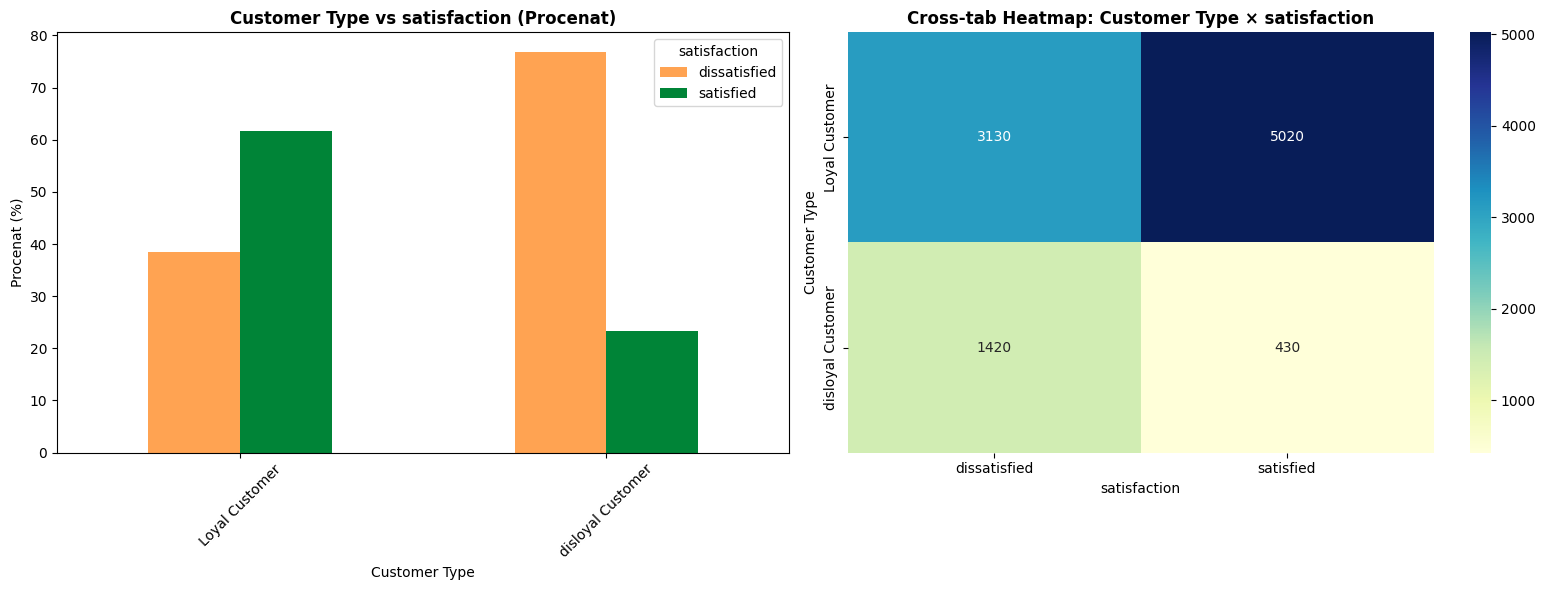

Chi-square test → p = 3.65e-196, Cramer’s V = 0.299 (umerena veza)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: AGE vs SATISFACTION
--------------------------------------------------------------------------------


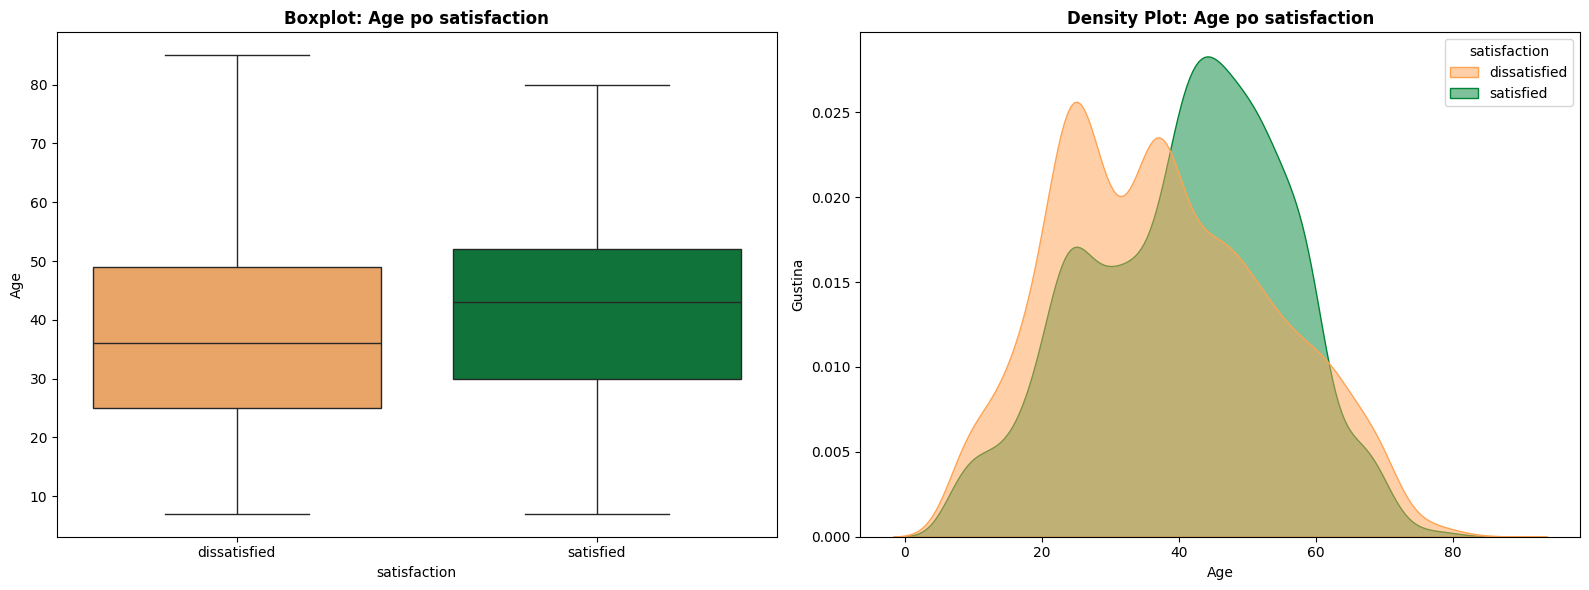

Mann–Whitney U test → p = 8.51e-40, Cliff’s Delta = -0.125
Srednji efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: TYPE OF TRAVEL vs SATISFACTION
--------------------------------------------------------------------------------


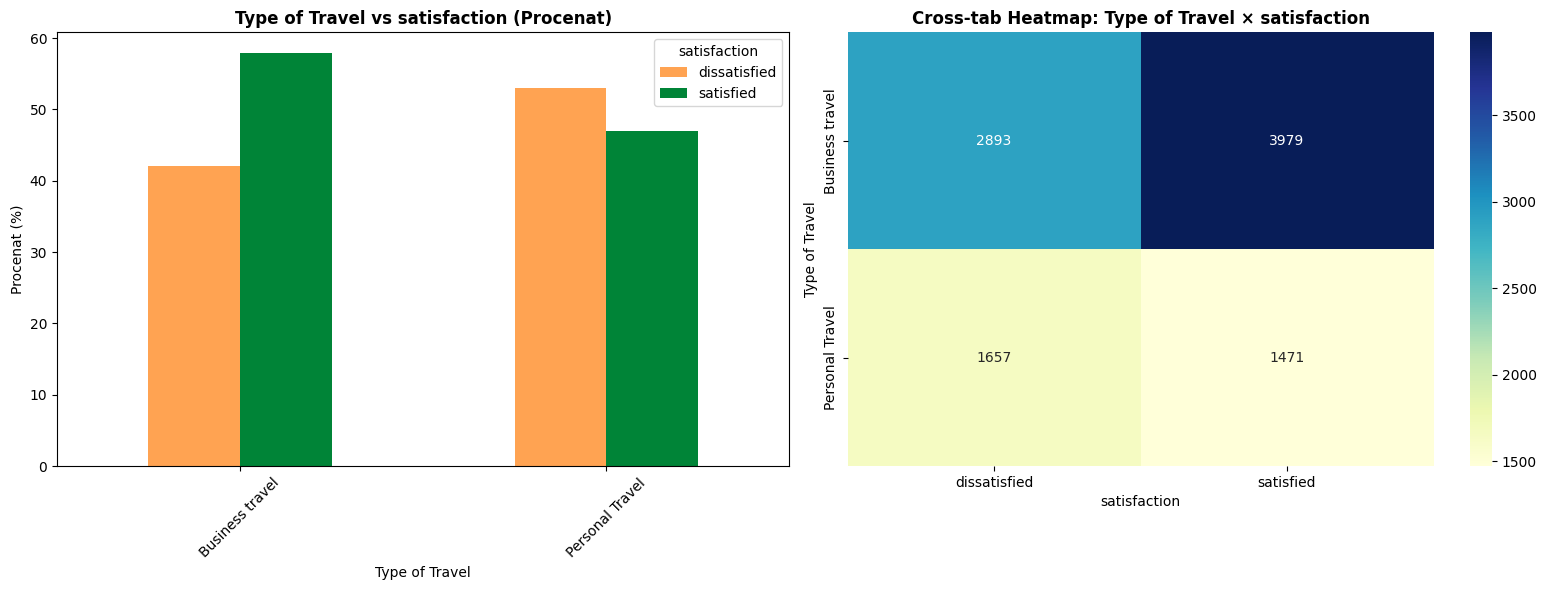

Chi-square test → p = 5.34e-24, Cramer’s V = 0.101 (umerena veza)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: CLASS vs SATISFACTION
--------------------------------------------------------------------------------


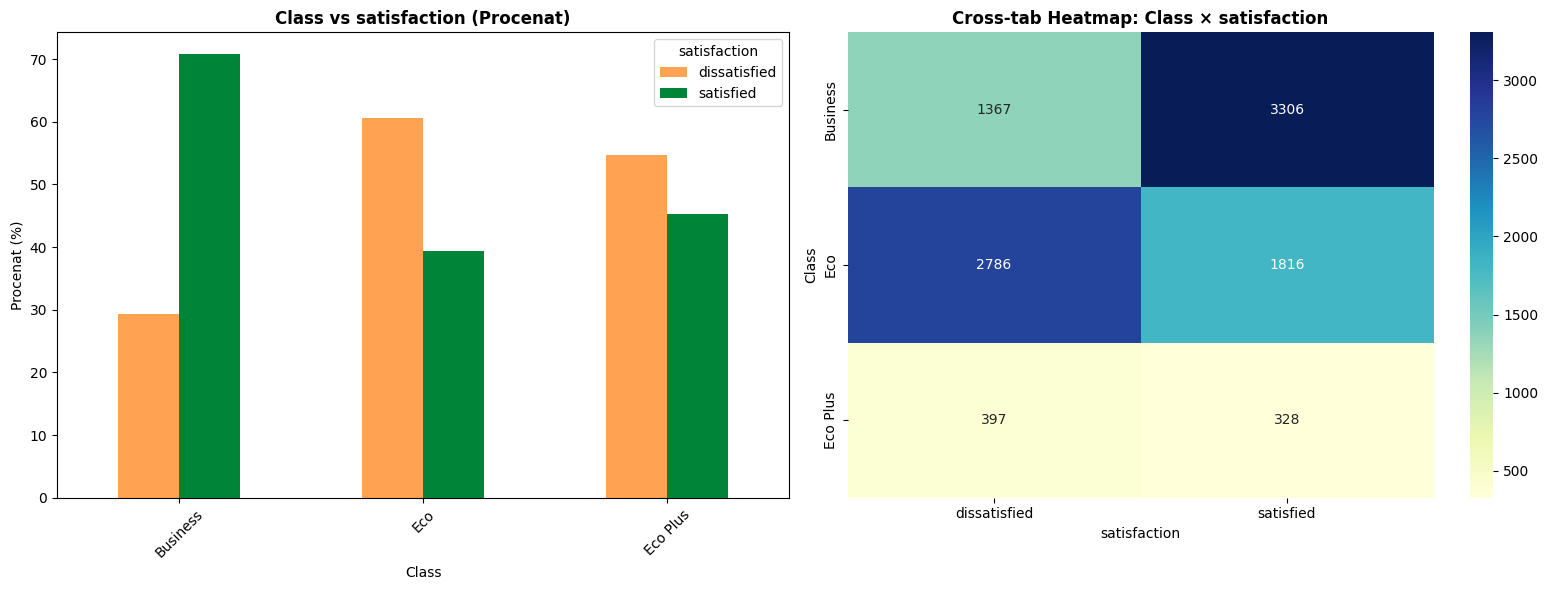

Chi-square test → p = 2.51e-205, Cramer’s V = 0.307 (jaka veza)
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: FLIGHT DISTANCE vs SATISFACTION
--------------------------------------------------------------------------------


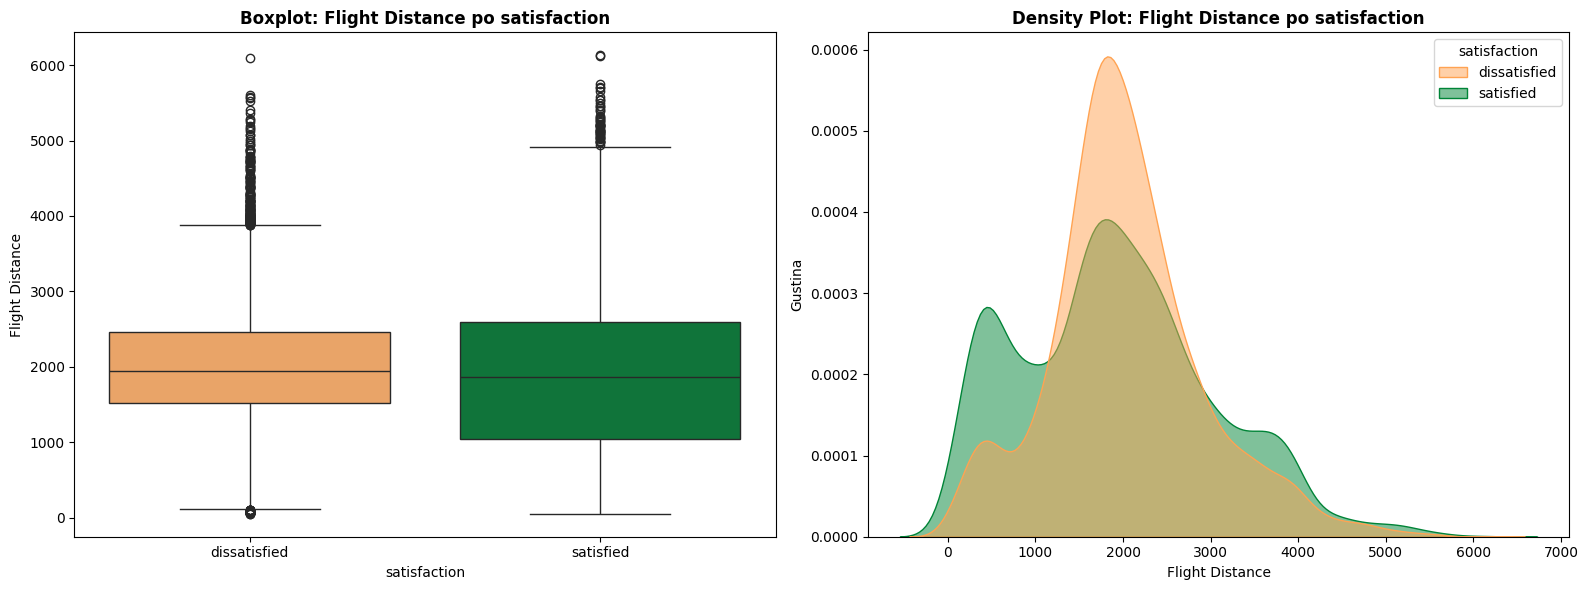

Mann–Whitney U test → p = 3.77e-10, Cliff’s Delta = 0.046
Vrlo slab efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: SEAT COMFORT vs SATISFACTION
--------------------------------------------------------------------------------


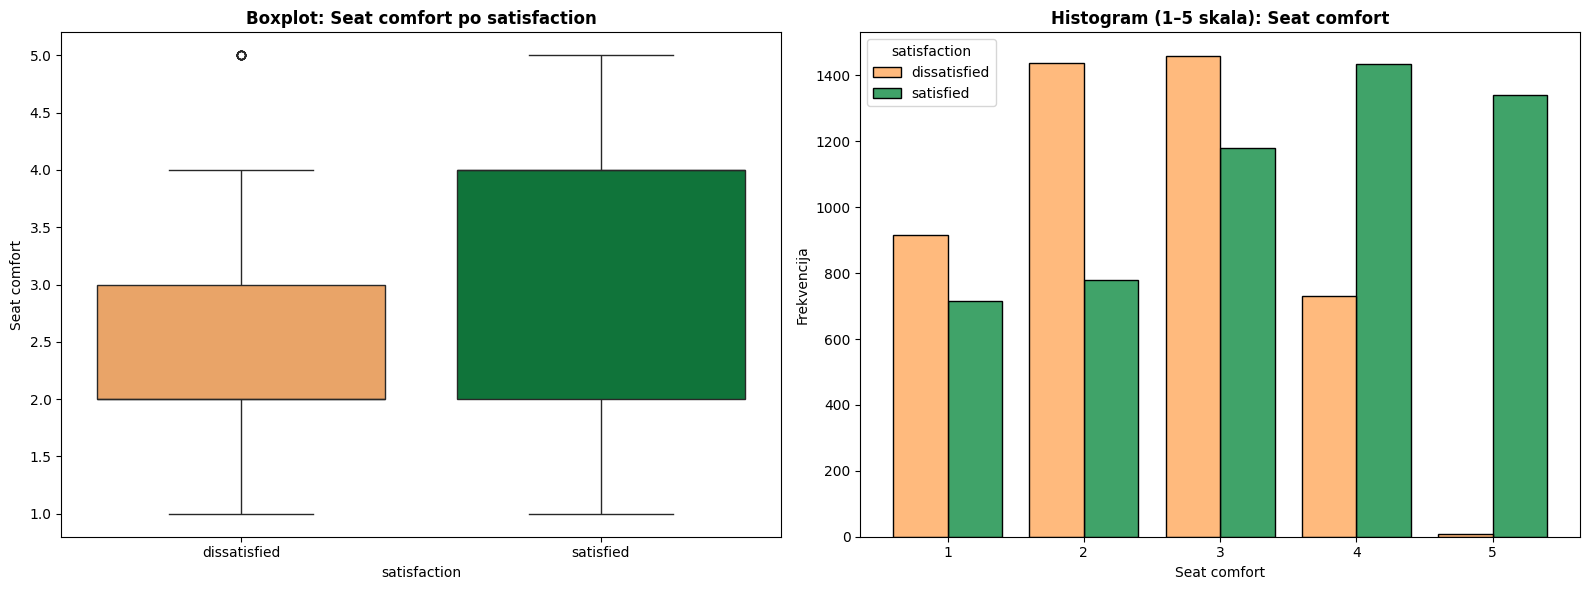

Mann–Whitney U test → p = 2.06e-269, Cliff’s Delta = -0.417
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: DEPARTURE/ARRIVAL TIME CONVENIENT vs SATISFACTION
--------------------------------------------------------------------------------


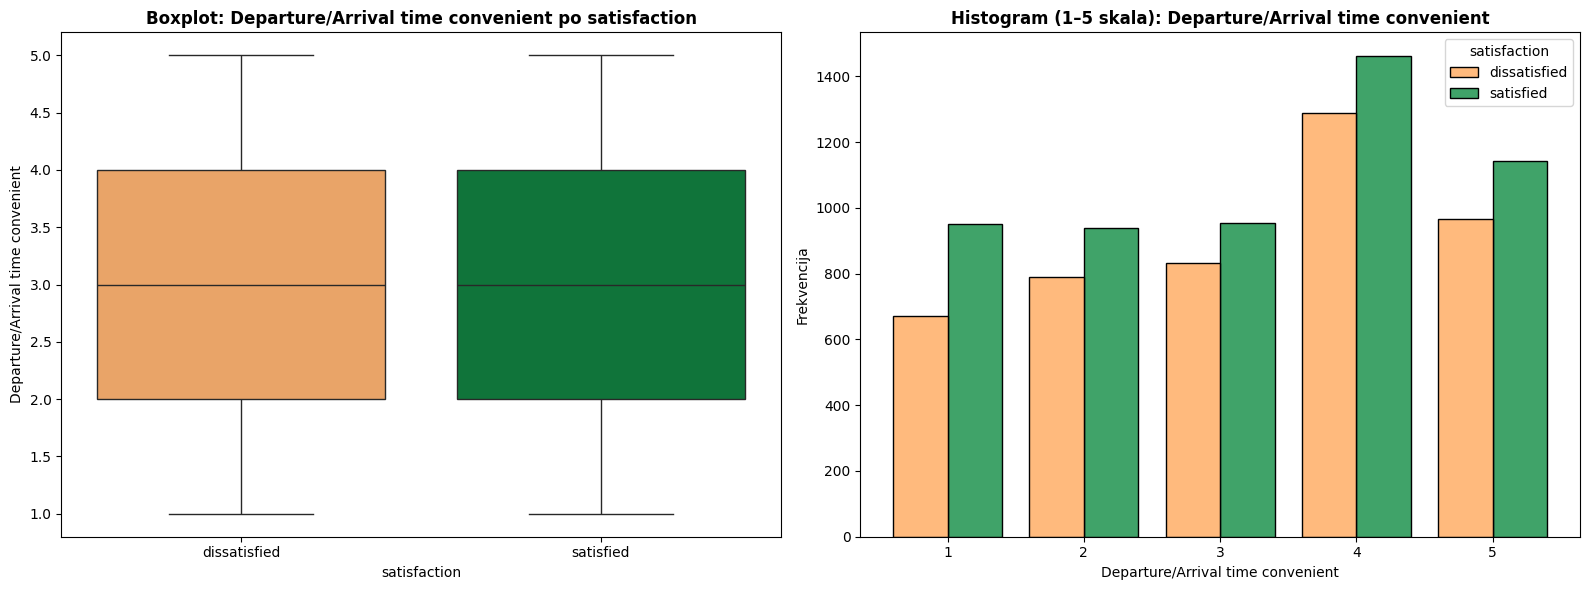

Mann–Whitney U test → p = 1.47e-02, Cliff’s Delta = -0.018
Vrlo slab efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: FOOD AND DRINK vs SATISFACTION
--------------------------------------------------------------------------------


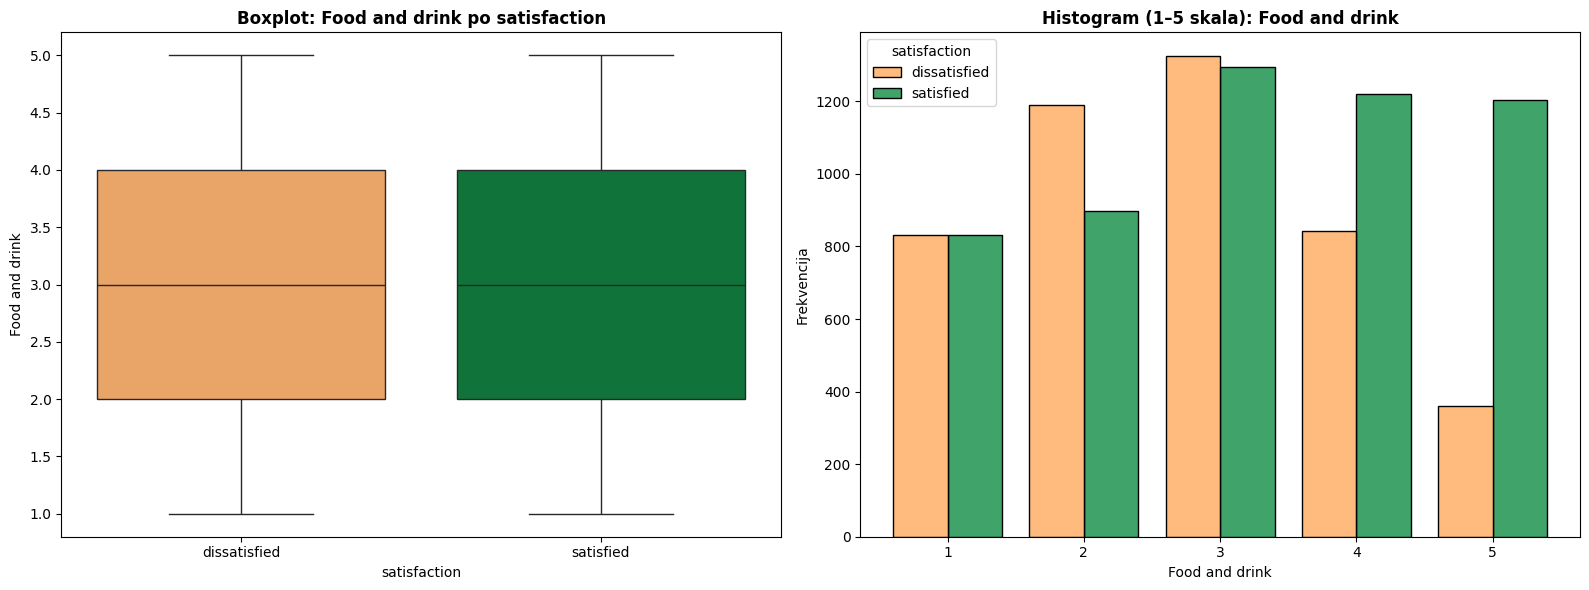

Mann–Whitney U test → p = 1.59e-74, Cliff’s Delta = -0.200
Srednji efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: GATE LOCATION vs SATISFACTION
--------------------------------------------------------------------------------


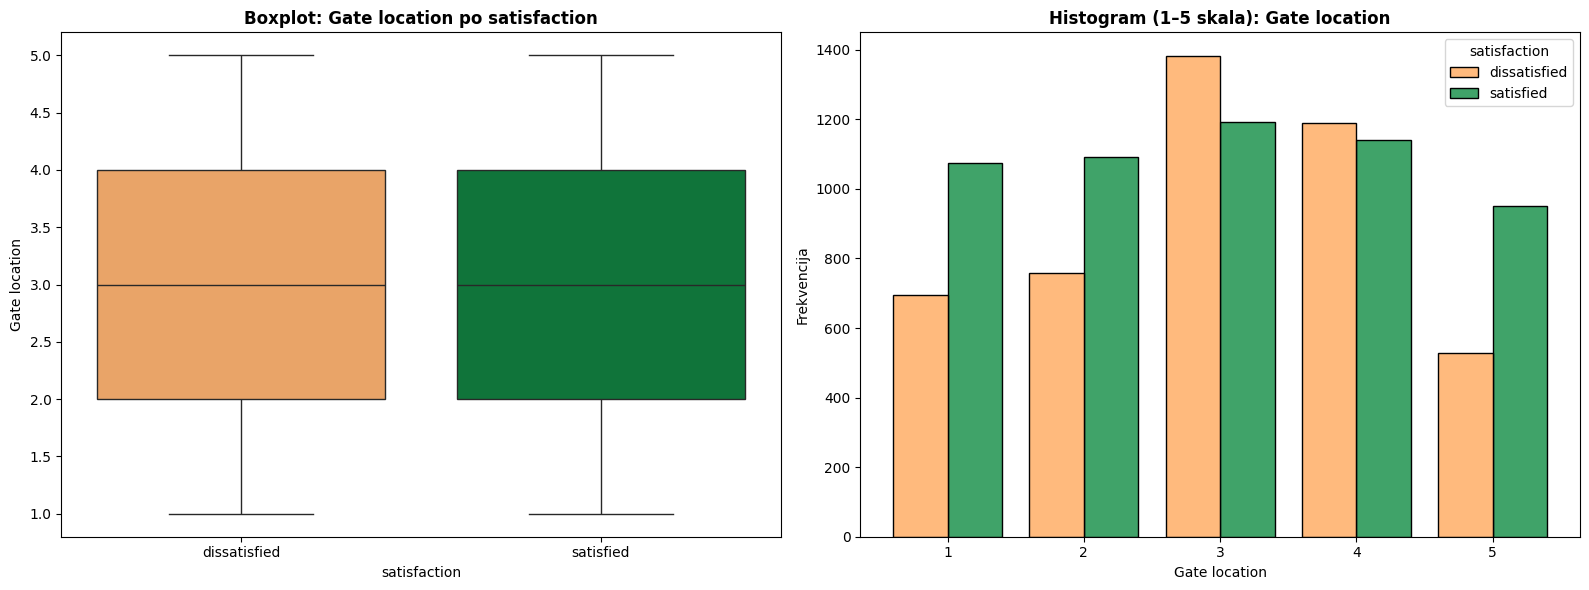

Mann–Whitney U test → p = 2.92e-02, Cliff’s Delta = 0.036
Vrlo slab efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: INFLIGHT WIFI SERVICE vs SATISFACTION
--------------------------------------------------------------------------------


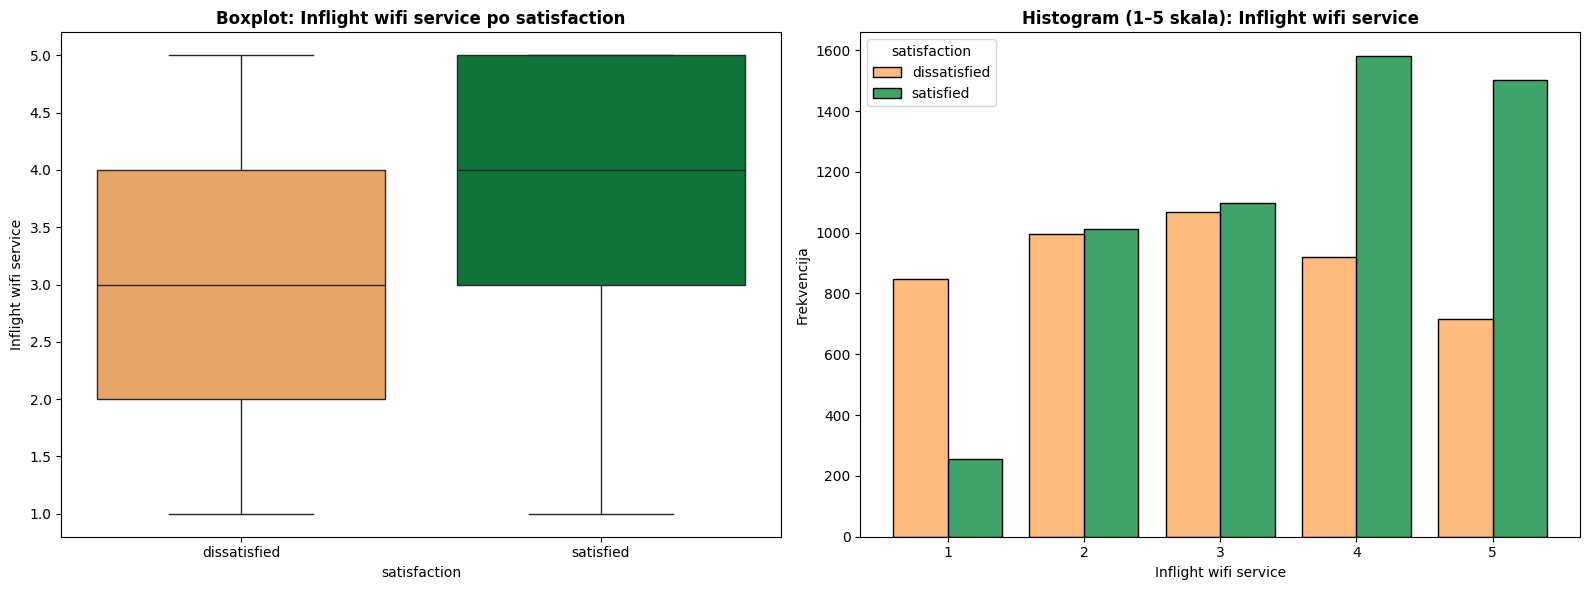

Mann–Whitney U test → p = 3.24e-123, Cliff’s Delta = -0.283
Srednji efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: INFLIGHT ENTERTAINMENT vs SATISFACTION
--------------------------------------------------------------------------------


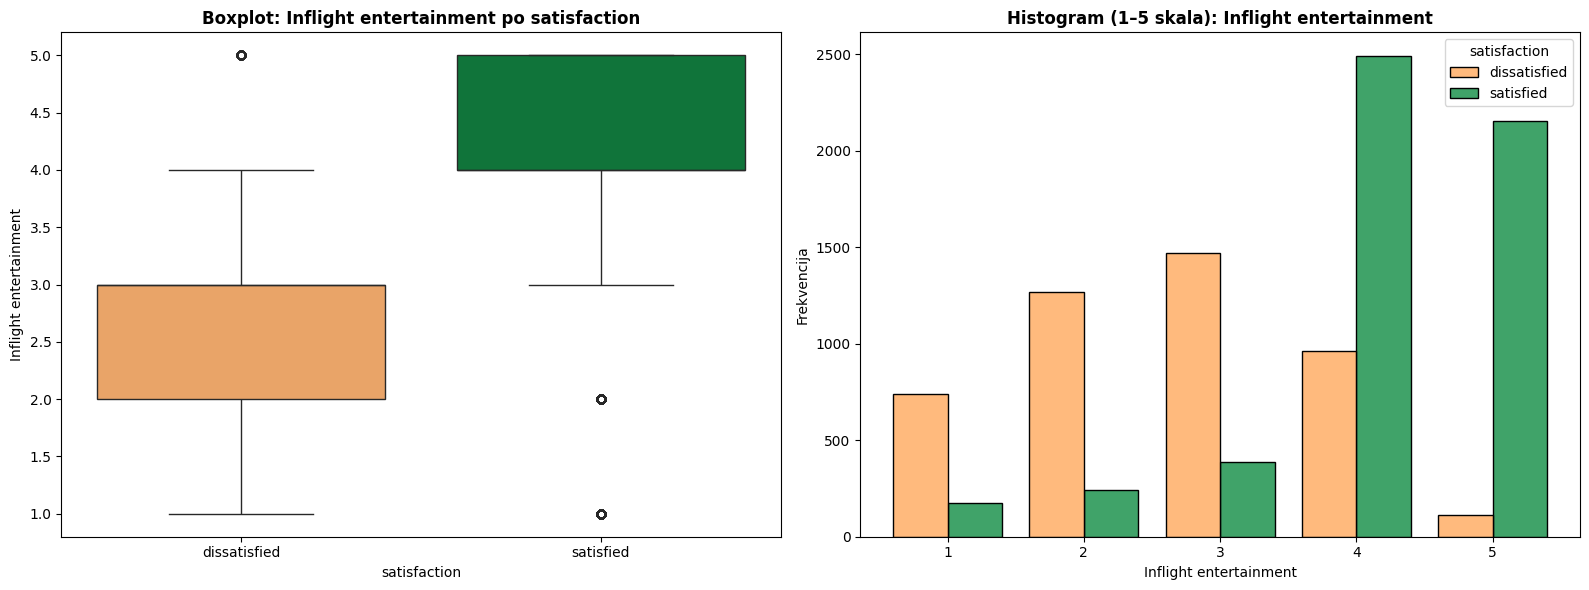

Mann–Whitney U test → p = 0.00e+00, Cliff’s Delta = -0.686
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: ONLINE SUPPORT vs SATISFACTION
--------------------------------------------------------------------------------


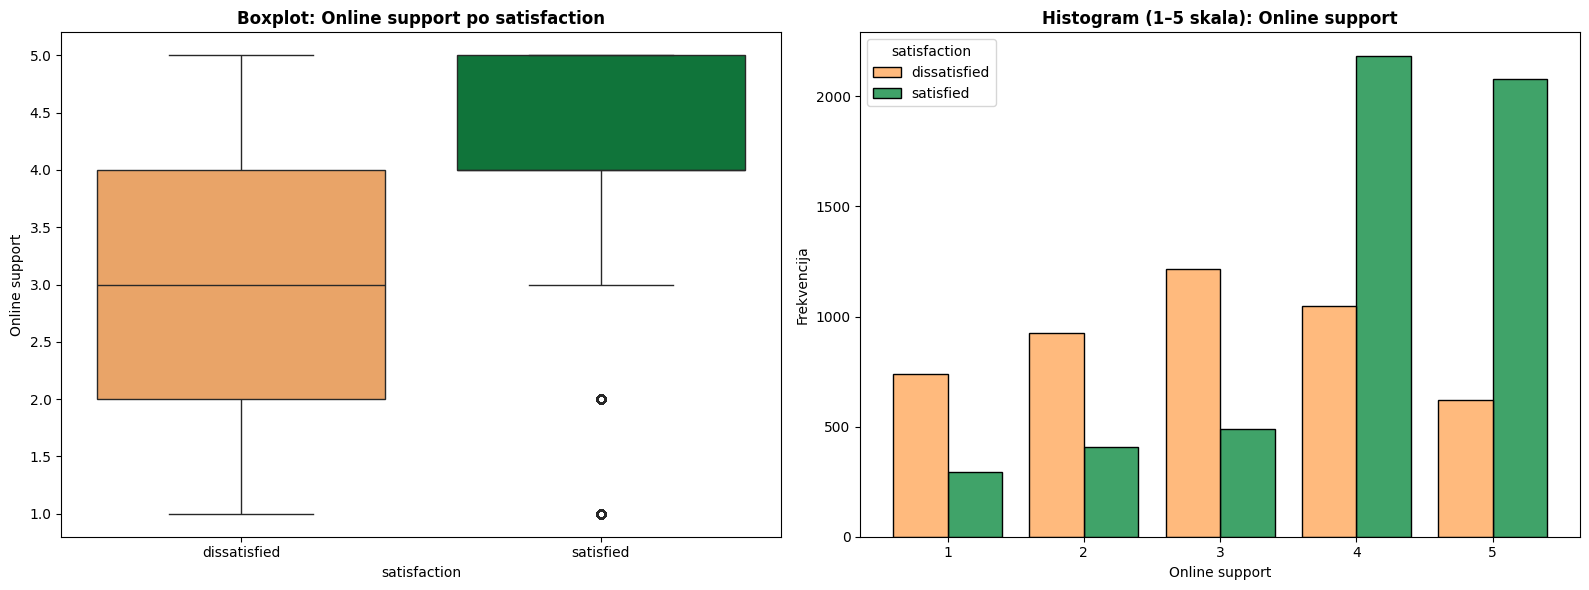

Mann–Whitney U test → p = 0.00e+00, Cliff’s Delta = -0.457
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: EASE OF ONLINE BOOKING vs SATISFACTION
--------------------------------------------------------------------------------


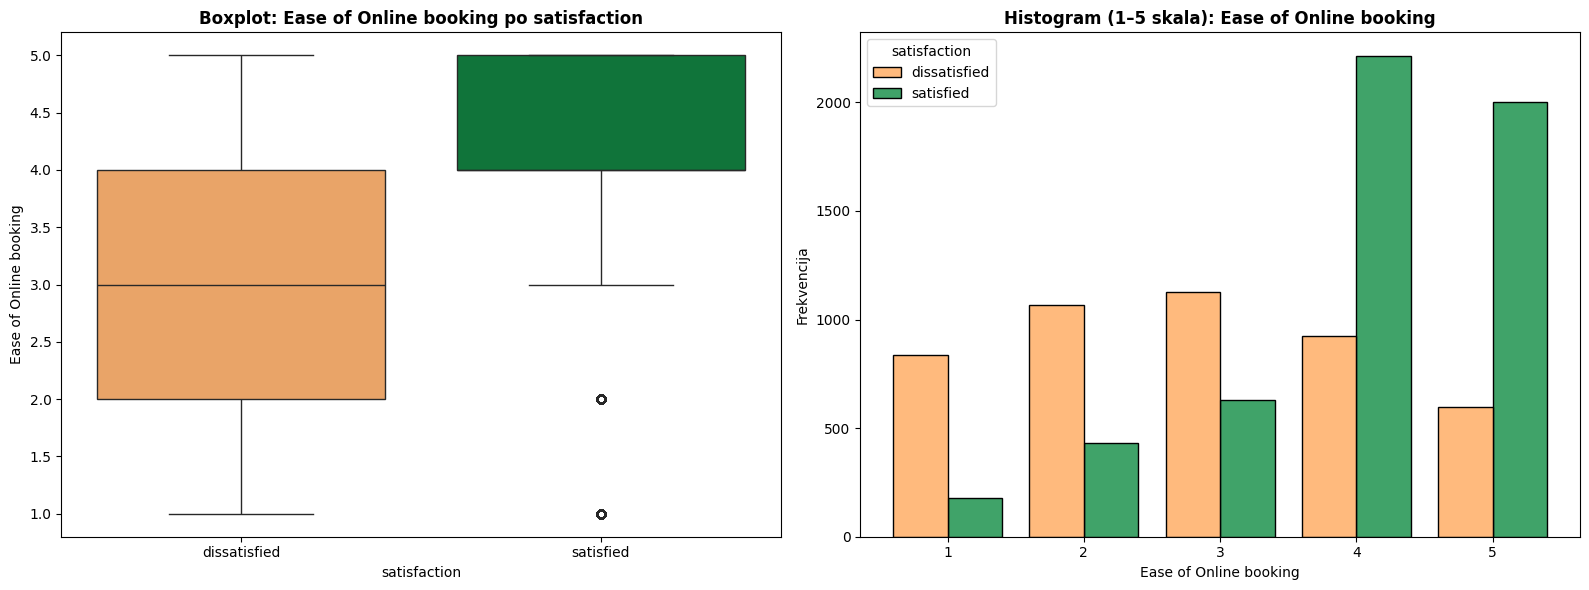

Mann–Whitney U test → p = 0.00e+00, Cliff’s Delta = -0.487
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: ON-BOARD SERVICE vs SATISFACTION
--------------------------------------------------------------------------------


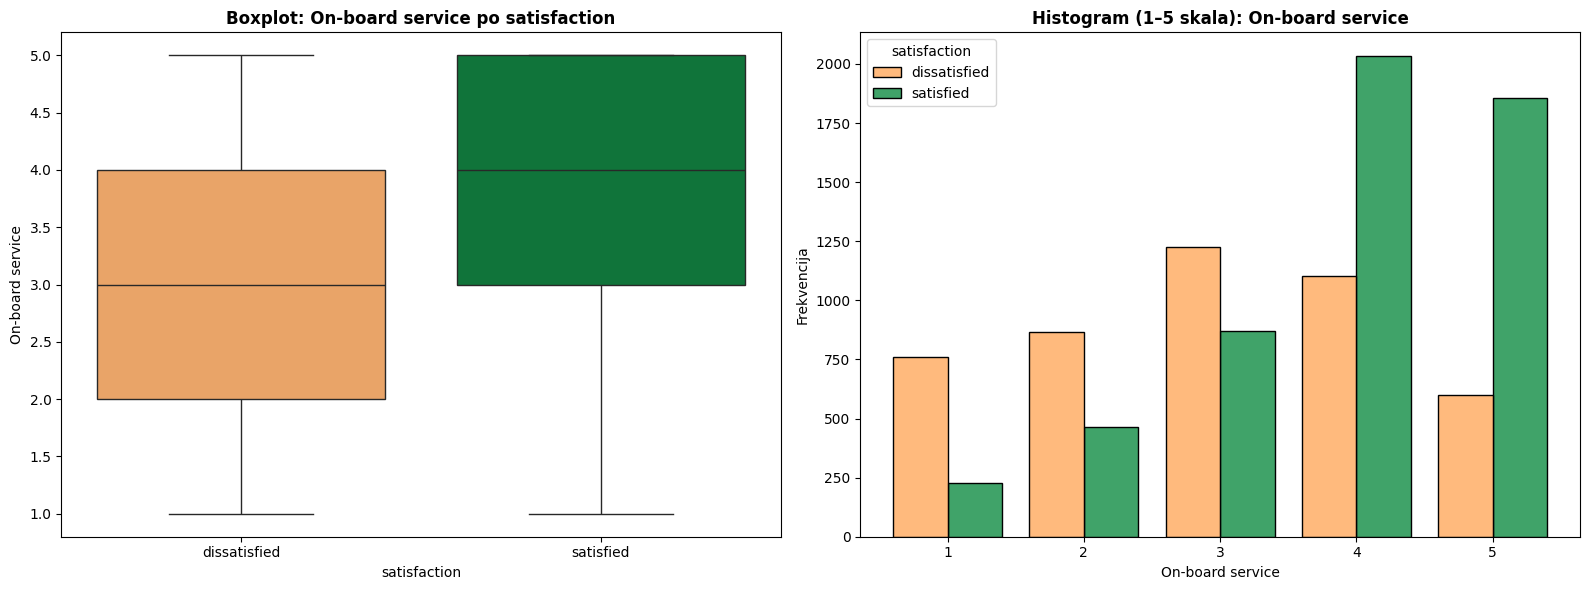

Mann–Whitney U test → p = 3.17e-279, Cliff’s Delta = -0.407
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: LEG ROOM SERVICE vs SATISFACTION
--------------------------------------------------------------------------------


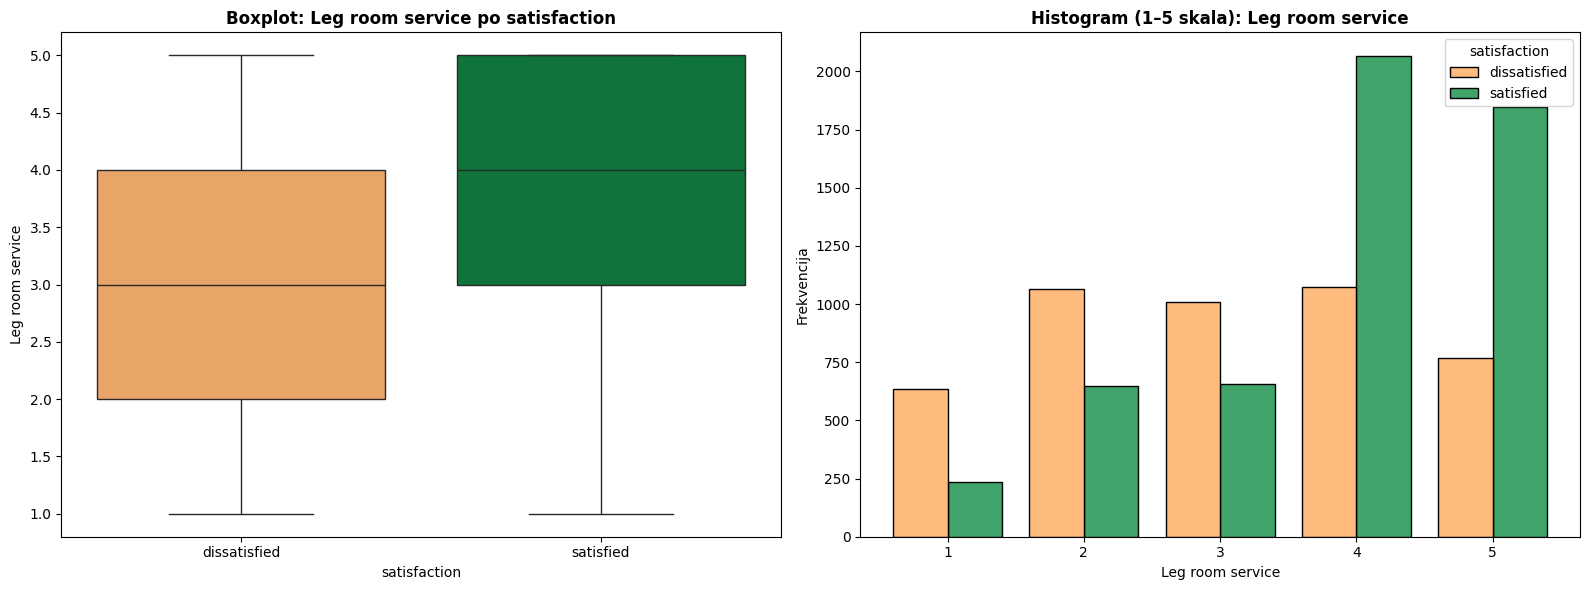

Mann–Whitney U test → p = 6.02e-206, Cliff’s Delta = -0.387
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: BAGGAGE HANDLING vs SATISFACTION
--------------------------------------------------------------------------------


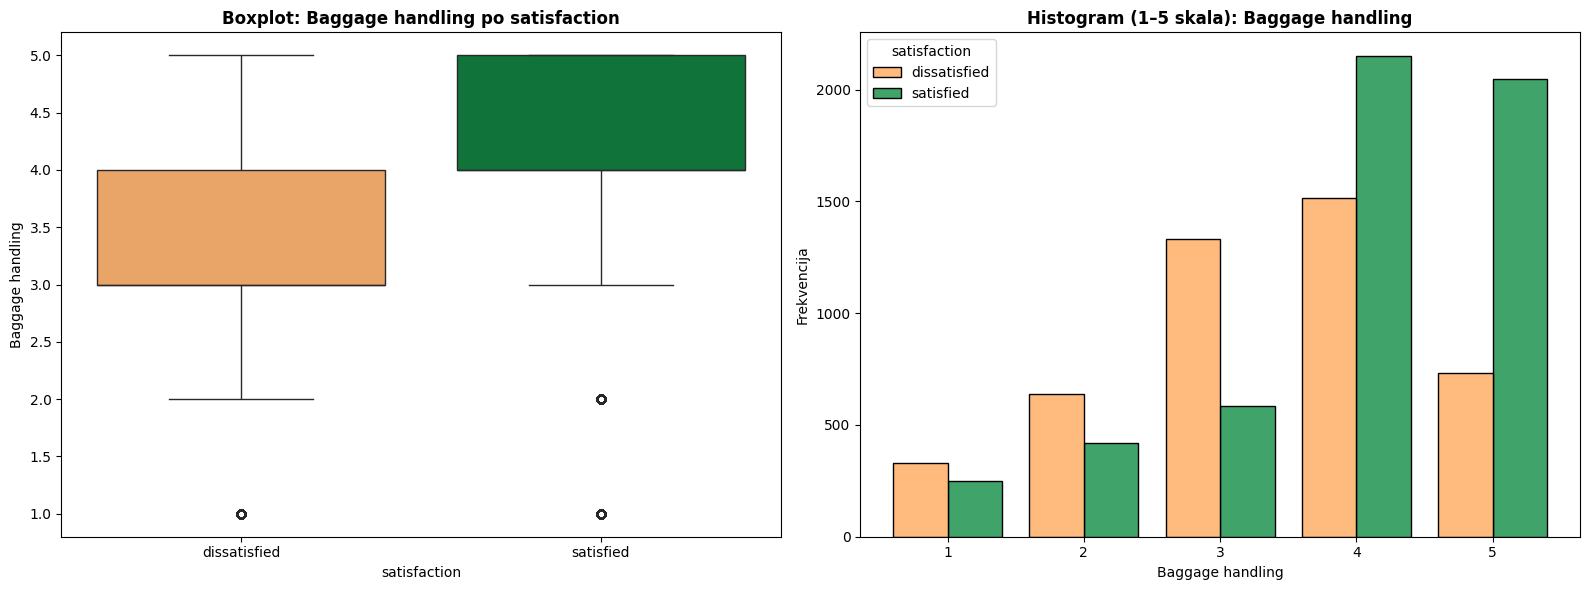

Mann–Whitney U test → p = 5.30e-186, Cliff’s Delta = -0.303
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: CHECKIN SERVICE vs SATISFACTION
--------------------------------------------------------------------------------


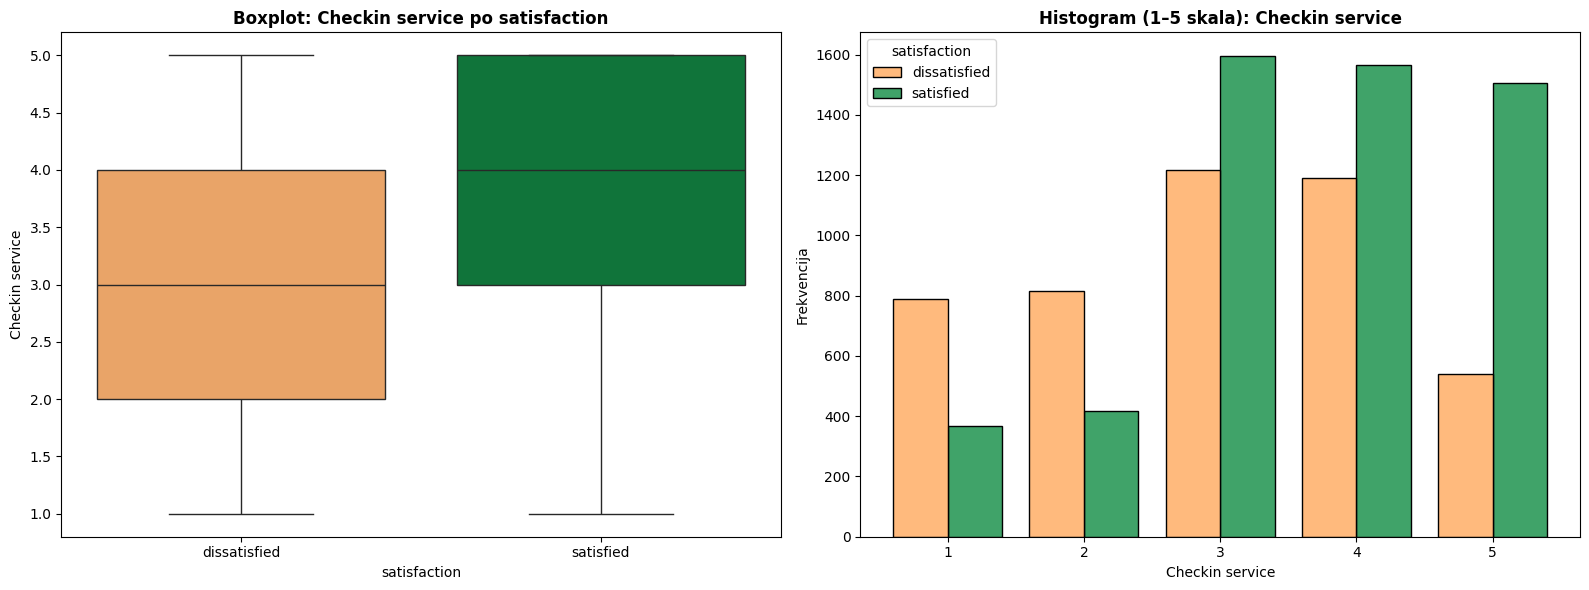

Mann–Whitney U test → p = 7.82e-143, Cliff’s Delta = -0.244
Srednji efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: CLEANLINESS vs SATISFACTION
--------------------------------------------------------------------------------


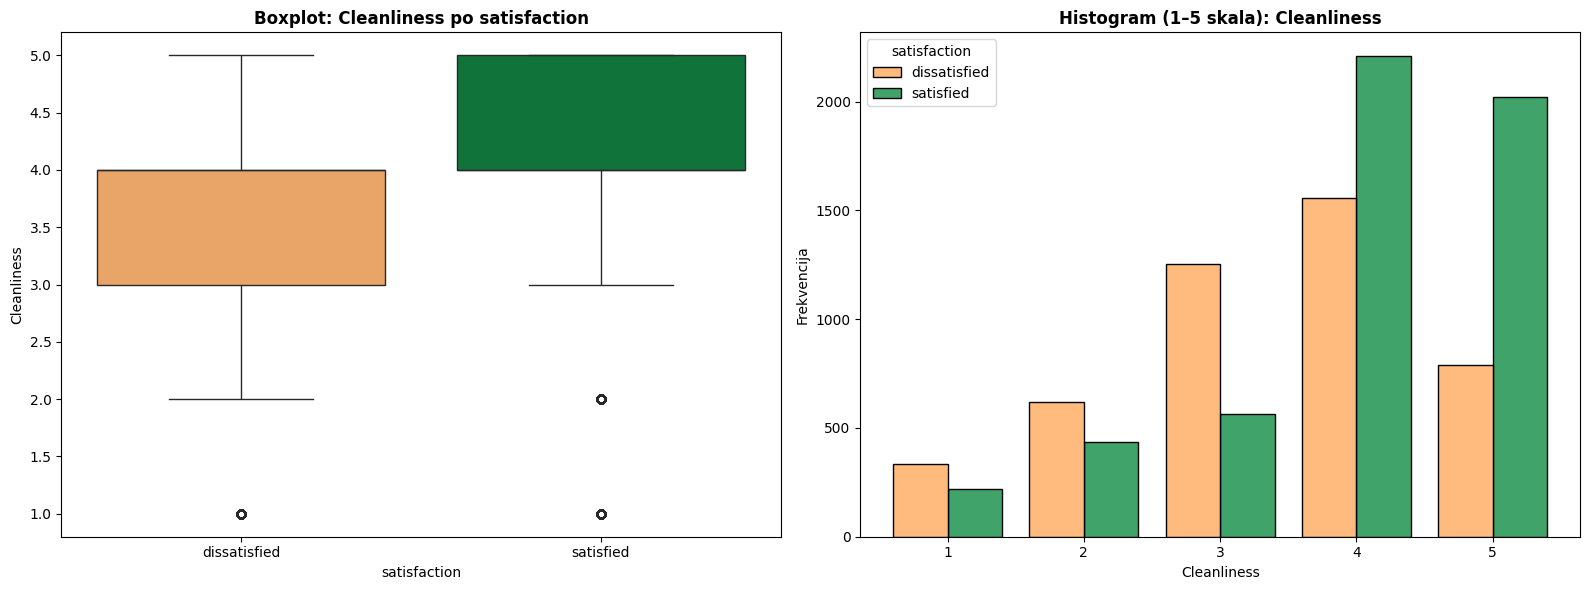

Mann–Whitney U test → p = 6.19e-168, Cliff’s Delta = -0.318
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: ONLINE BOARDING vs SATISFACTION
--------------------------------------------------------------------------------


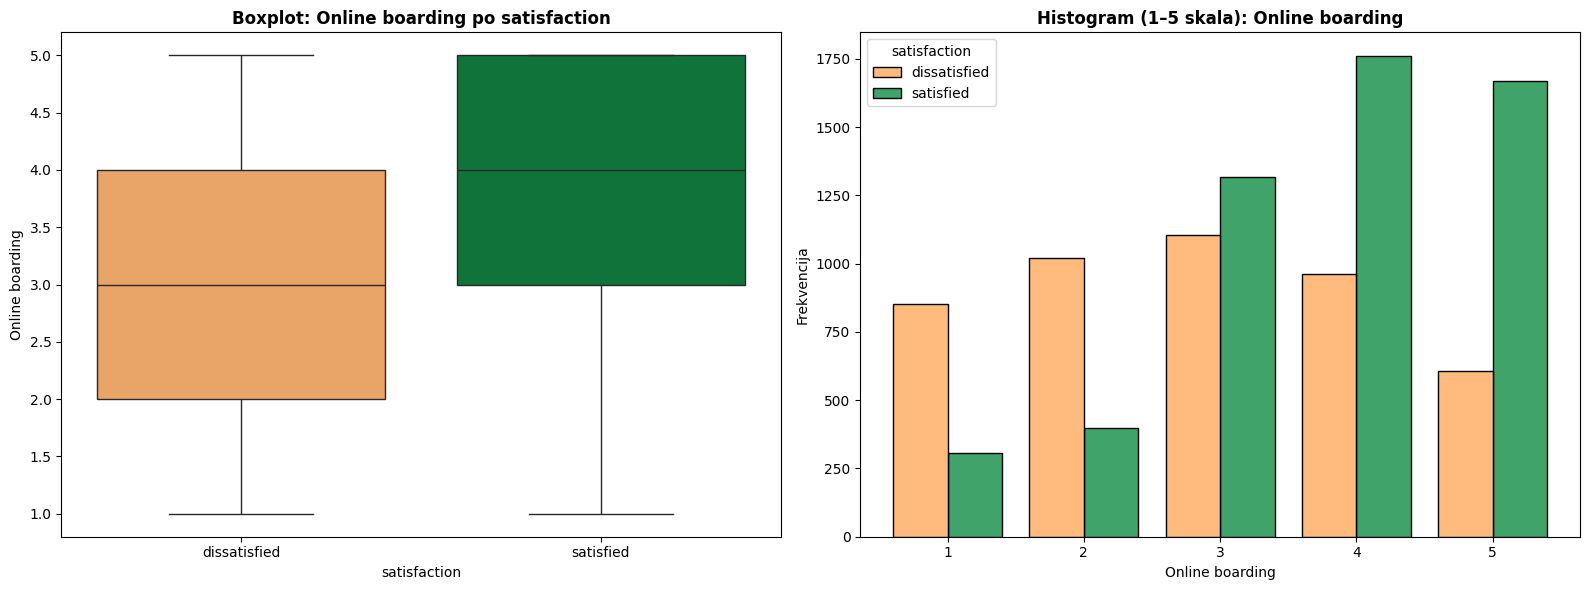

Mann–Whitney U test → p = 4.46e-241, Cliff’s Delta = -0.413
Jak efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: DEPARTURE DELAY IN MINUTES vs SATISFACTION
--------------------------------------------------------------------------------


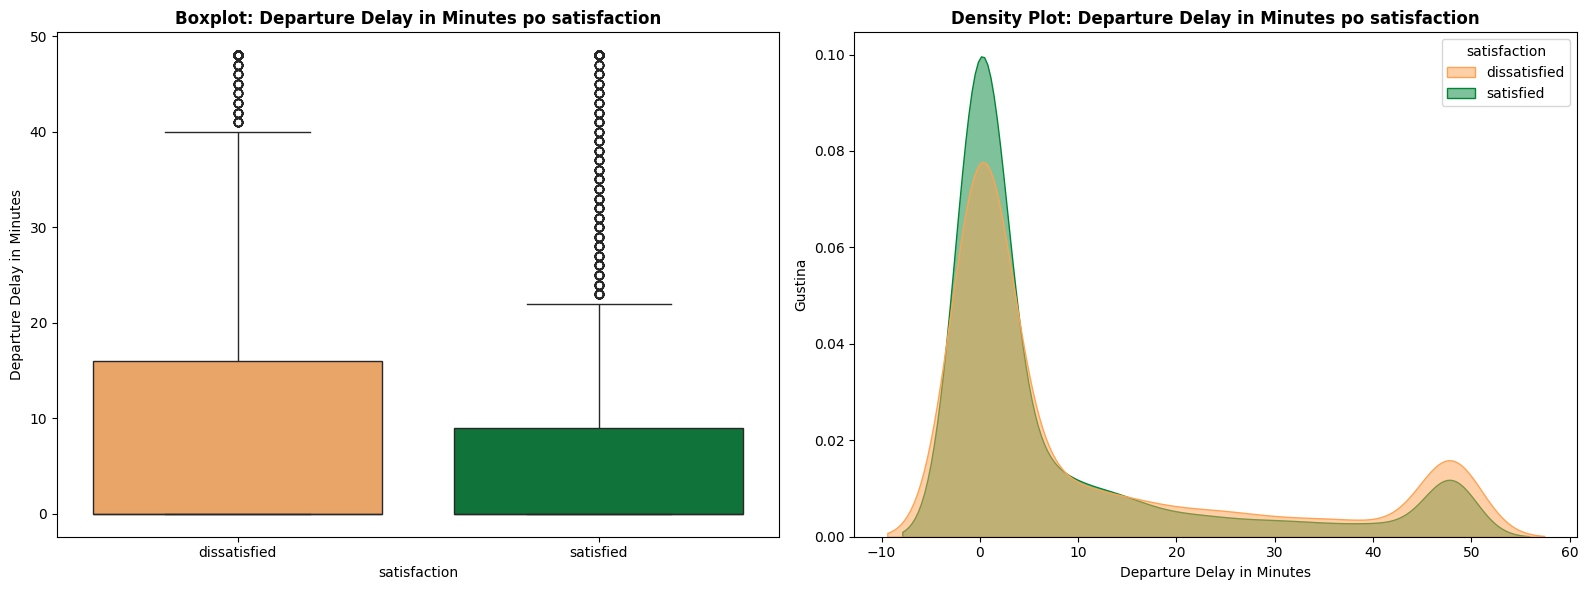

Mann–Whitney U test → p = 7.42e-13, Cliff’s Delta = 0.129
Srednji efekat
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
ANALIZA: ARRIVAL DELAY IN MINUTES vs SATISFACTION
--------------------------------------------------------------------------------


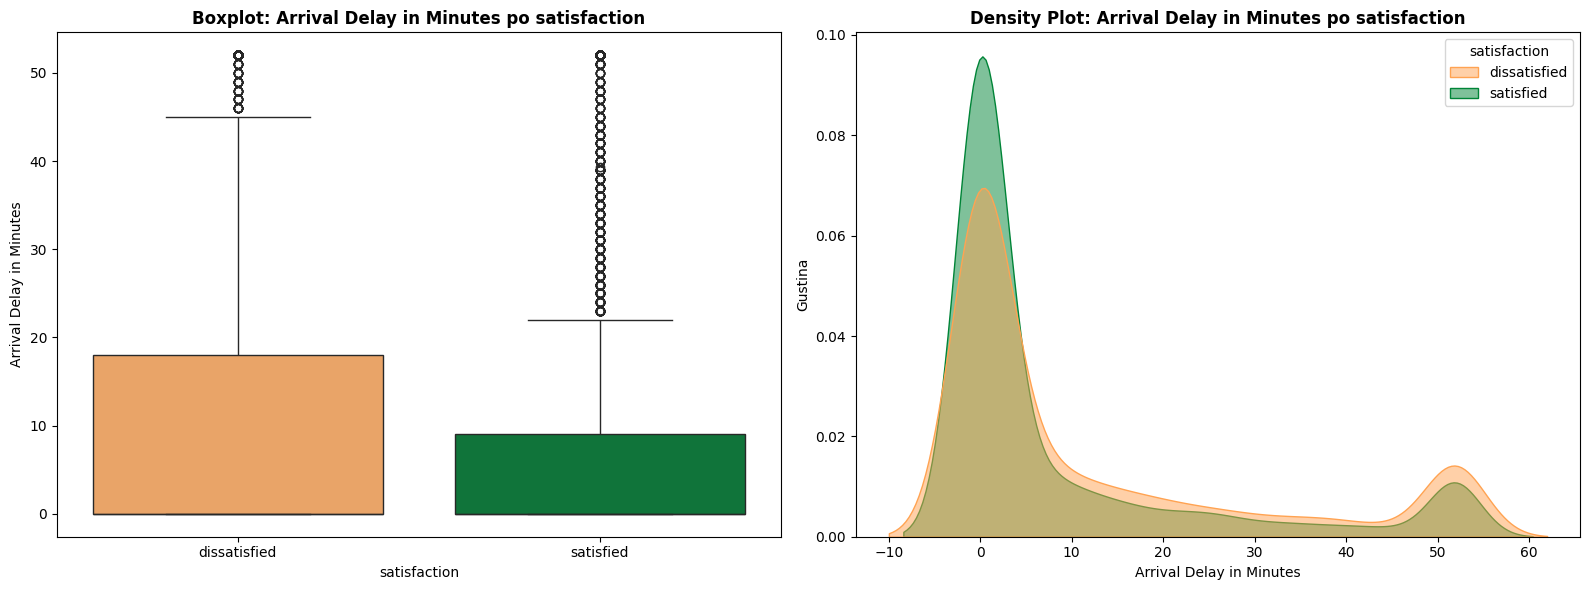

Mann–Whitney U test → p = 7.49e-28, Cliff’s Delta = 0.111
Srednji efekat
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 129859 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129859 non-null  object 
 1   Customer Type                      129859 non-null  object 
 2   Age                                129859 non-null  int64  
 3   Type of Travel                     129859 non-null  object 
 4   Class                              129859 non-null  object 
 5   Flight Distance                    129859 non-null  int64  
 6   Seat comfort                       129859 non-null  int64  
 7   Departure/Arrival time convenient  129859 non-null  int64  
 8   Food and drink                     129859 non-null  int64  
 9   Gate location       

In [22]:
for column in data.columns:
    if column != 'satisfaction':
        print(f"\n{'-'*80}")
        print(f"ANALIZA: {column.upper()} vs SATISFACTION")
        print('-'*80)
        plot_target_relationship(data, 'satisfaction', column)
        
data.info()

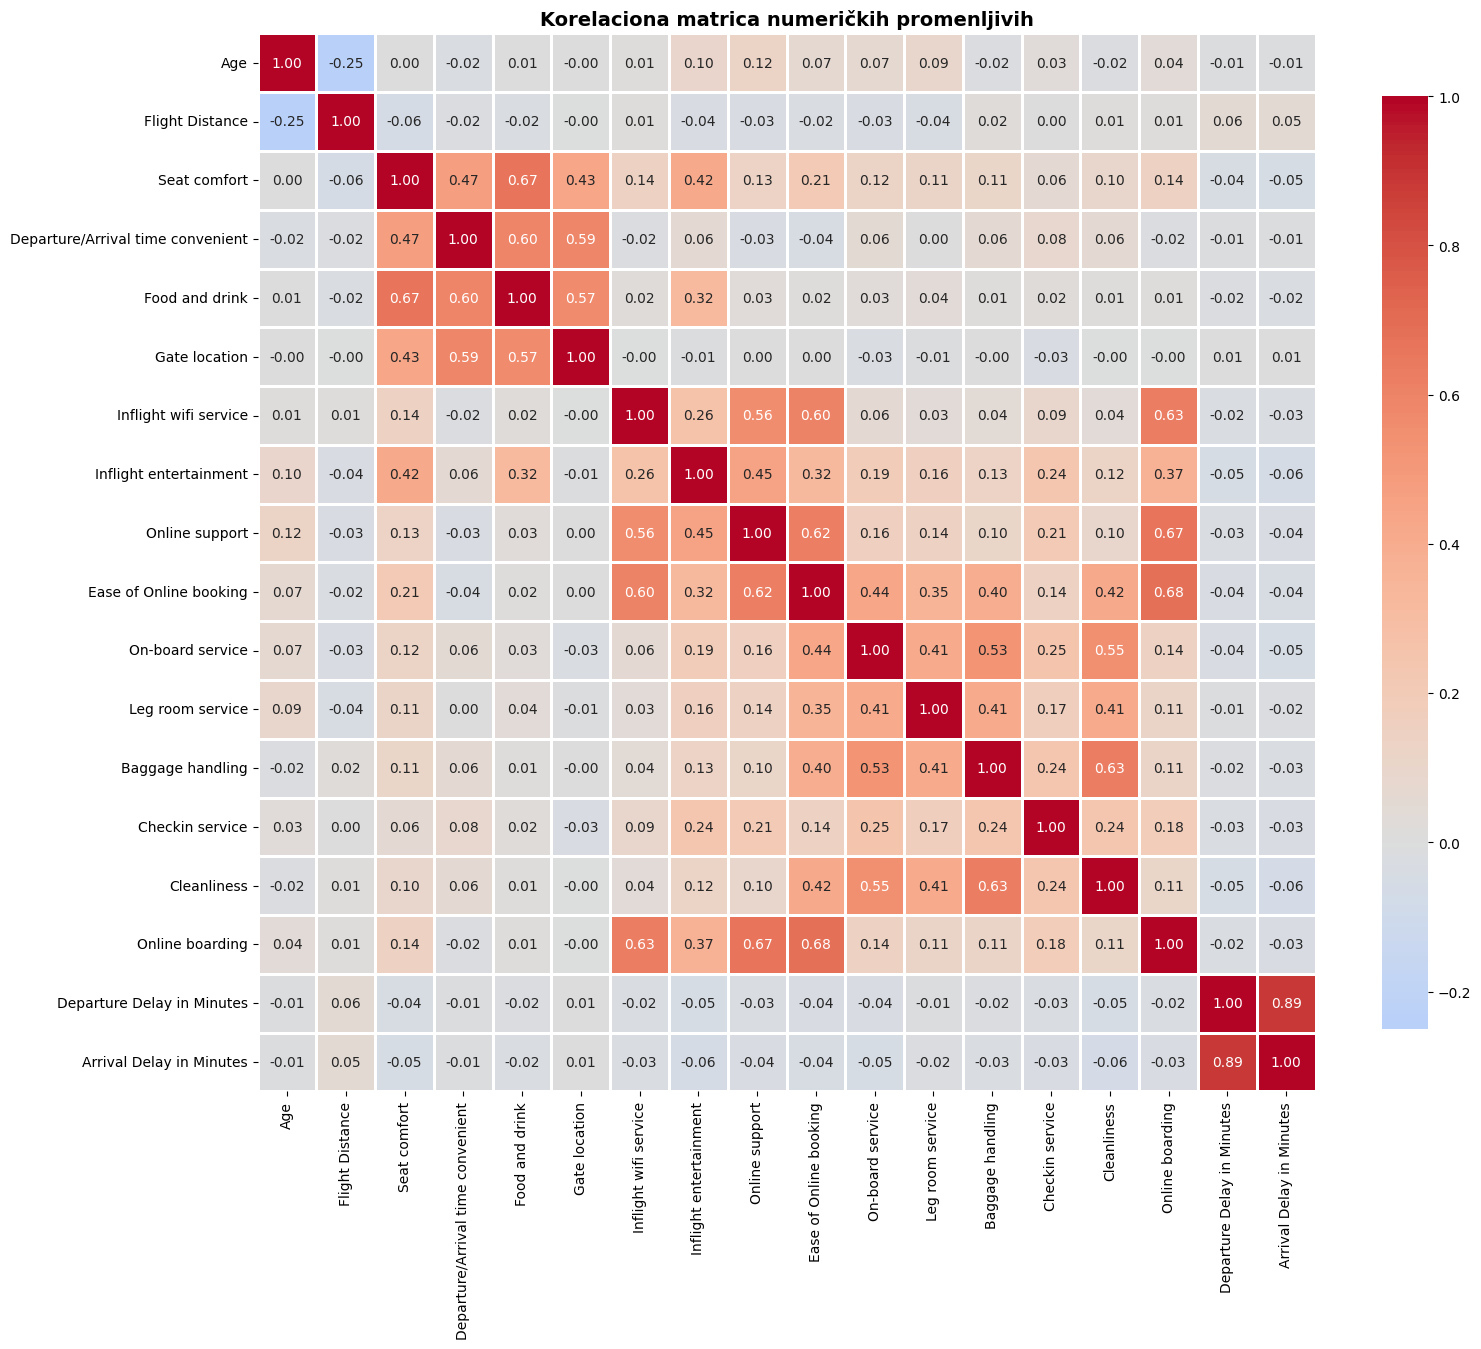


Visoko korelisane promenljive (|r| > 0.7):
             Promenljiva 1            Promenljiva 2  Korelacija
Departure Delay in Minutes Arrival Delay in Minutes    0.886432


In [23]:
numeric_cols = data.select_dtypes(include=['int64', 'float64','int32']).columns

plt.figure(figsize=(16, 14))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelaciona matrica numeričkih promenljivih', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisoko korelisane promenljive (|r| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append({
                'Promenljiva 1': correlation_matrix.columns[i],
                'Promenljiva 2': correlation_matrix.columns[j],
                'Korelacija': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    print(high_corr_df.to_string(index=False))
else:
    print("Nema visoko korelisanih promenljivih.")
    

### **5.2 Redukcija podataka** 

Brišemo podatke koji nam neće koristiti u predviđanju.

In [24]:
columns_to_drop = [
    'Gate location',
    'Departure/Arrival time convenient',
]

data = data.drop(columns=columns_to_drop, errors='ignore')



## **6.	FEATURE ENGINEERING**

### **6.1	Stvaranje novih promenljivih**

Flight_Experience - (Kvalitet usluge na avionu) Nalazimo srednju ocenu kolona zaduženih za uslugu prilikom leta:

In [25]:
service_columns_to_engineer = [
    'Seat comfort', 
    'Food and drink', 
    'Inflight wifi service', 
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness',
]

existing_service_cols = [col for col in service_columns_to_engineer if col in data.columns]

if existing_service_cols:
    
    data[existing_service_cols] = data[existing_service_cols].replace(0, np.nan) 
    
    data['Flight_Experience'] = (
        data[existing_service_cols]
        .mean(axis=1)   
        .round()        
        .astype(int)   
    )

    data = data.drop(columns=existing_service_cols, errors='ignore')


Univarijantna i multivarijantna analiza na novim dobijenim podacima

FLIGHT_EXPERIENCE


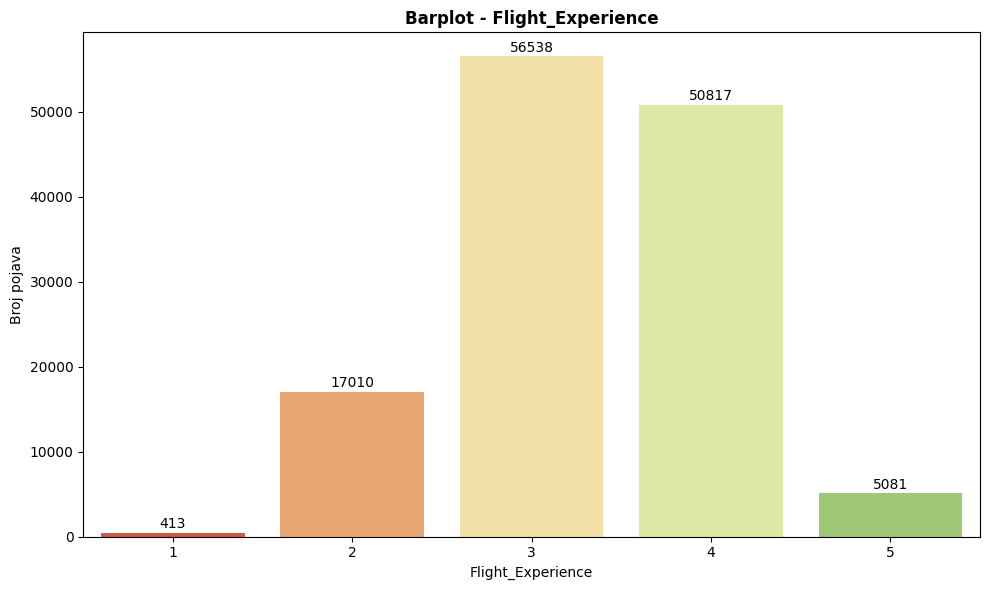


Distribucija ocene za Flight_Experience:
Flight_Experience
1      413
2    17010
3    56538
4    50817
5     5081
Name: count, dtype: int64

--------------------------------------------------------------------------------
ANALIZA: FLIGHT_EXPERIENCE vs SATISFACTION
--------------------------------------------------------------------------------


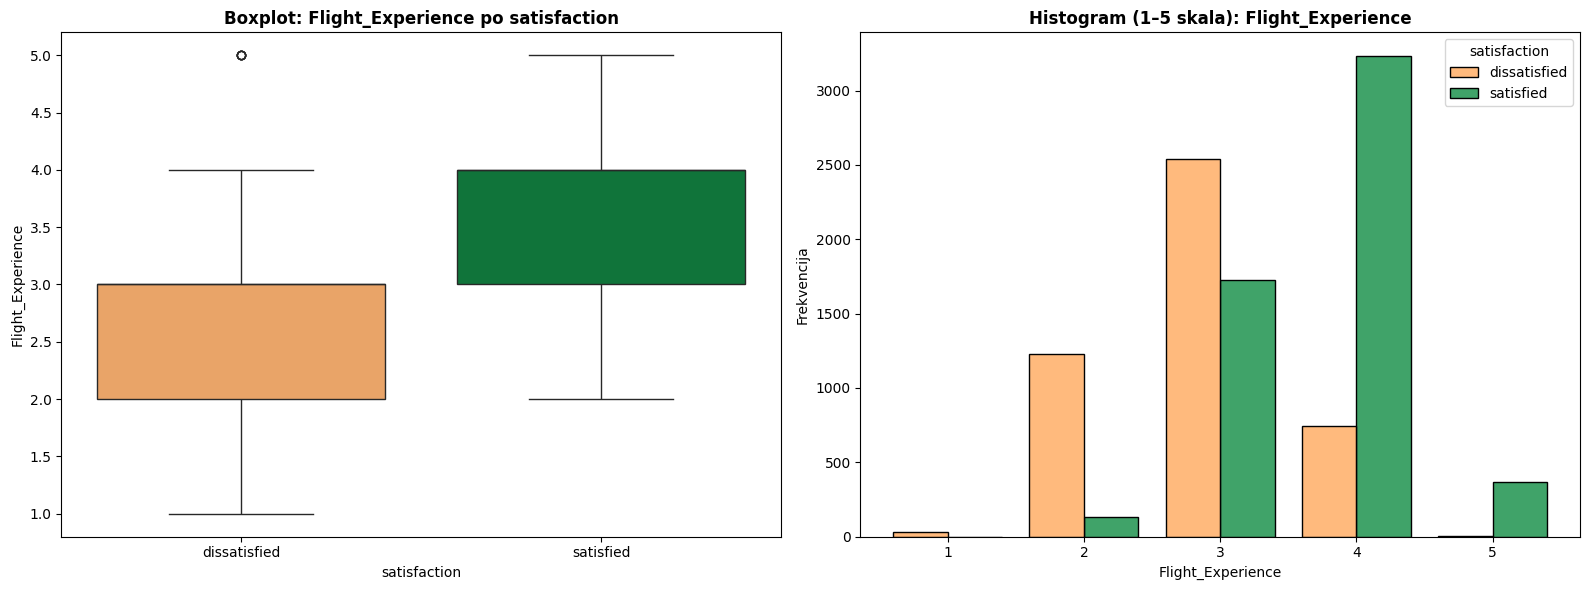

Mann–Whitney U test → p = 0.00e+00, Cliff’s Delta = -0.595
Jak efekat
--------------------------------------------------------------------------------


In [26]:
print('='*60)
print(f"{'Flight_Experience'.upper()}")
print('='*60)
plot_numeric_grades(data, 'Flight_Experience')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Flight_Experience'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Flight_Experience')


Ground_Service_Quality- (Kvalitet usluge na zemlji) Nalazimo srednju ocenu kolona zaduženih za uslugu PRE poletanja

In [27]:
Ground_Service_Quality = [
    'Online support', 
    'Ease of Online booking', 
    'Baggage handling', 
    'Checkin service',
    'Online boarding'
]

existing_service_cols = [col for col in Ground_Service_Quality if col in data.columns]

if existing_service_cols:
       
    data['Ground_Service_Quality'] = (
        data[existing_service_cols]
        .mean(axis=1)   
        .round()        
        .astype(int)   
    )

    data = data.drop(columns=existing_service_cols, errors='ignore')

Univarijantna i multivarijantna analiza na novim dobijenim podacima

GROUND_SERVICE_QUALITY


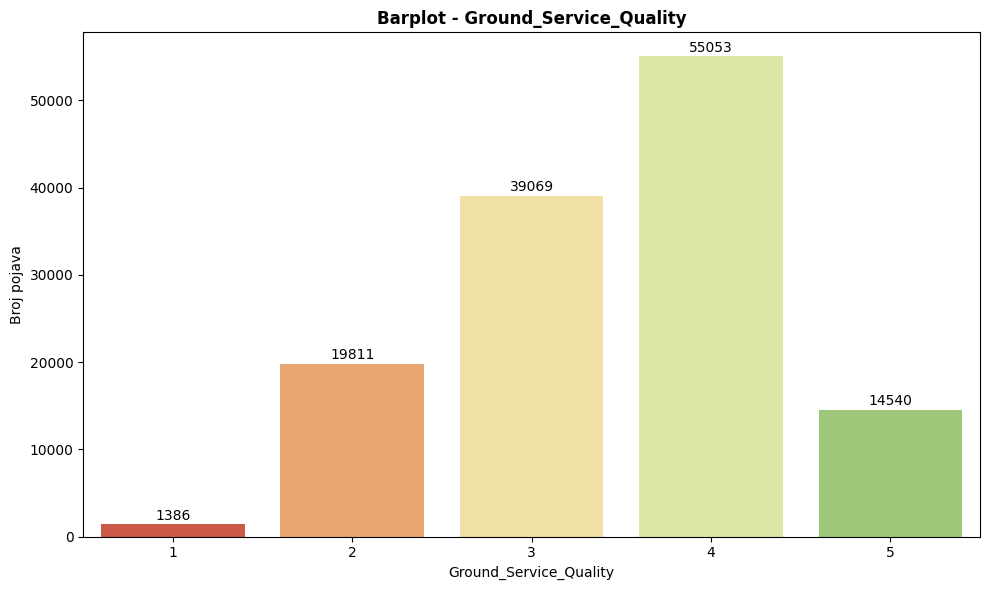


Distribucija ocene za Ground_Service_Quality:
Ground_Service_Quality
1     1386
2    19811
3    39069
4    55053
5    14540
Name: count, dtype: int64

--------------------------------------------------------------------------------
ANALIZA: GROUND_SERVICE_QUALITY vs SATISFACTION
--------------------------------------------------------------------------------


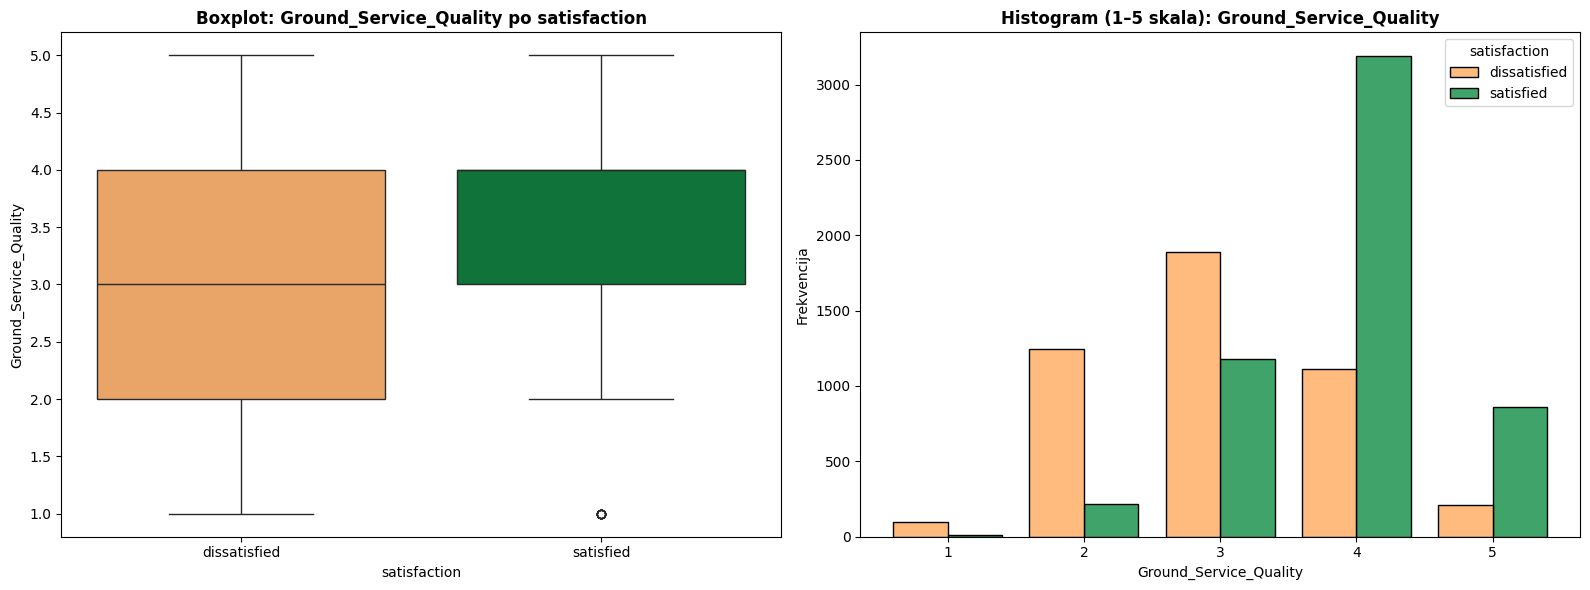

Mann–Whitney U test → p = 0.00e+00, Cliff’s Delta = -0.515
Jak efekat
--------------------------------------------------------------------------------


In [28]:
print('='*60)
print(f"{'Ground_Service_Quality'.upper()}")
print('='*60)
plot_numeric_grades(data, 'Ground_Service_Quality')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Ground_Service_Quality'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Ground_Service_Quality')

Napravićemo novu kolonu Total Delay in Minutes. Sabiramo Departure Delay in Minutes I Arrival Delay in Minutes

In [29]:
service_columns_to_engineer = [
    'Departure Delay in Minutes', 
    'Arrival Delay in Minutes', 
]

existing_service_cols = [col for col in service_columns_to_engineer if col in data.columns]

if existing_service_cols:
      
    data['Total_Delay_in_minutes'] = (
        data[existing_service_cols[0]] + data[existing_service_cols[1]] 
    )

    data = data.drop(columns=existing_service_cols, errors='ignore')


Univarijantna i multivarijantna analiza na novim dobijenim podacima

TOTAL_DELAY_IN_MINUTES


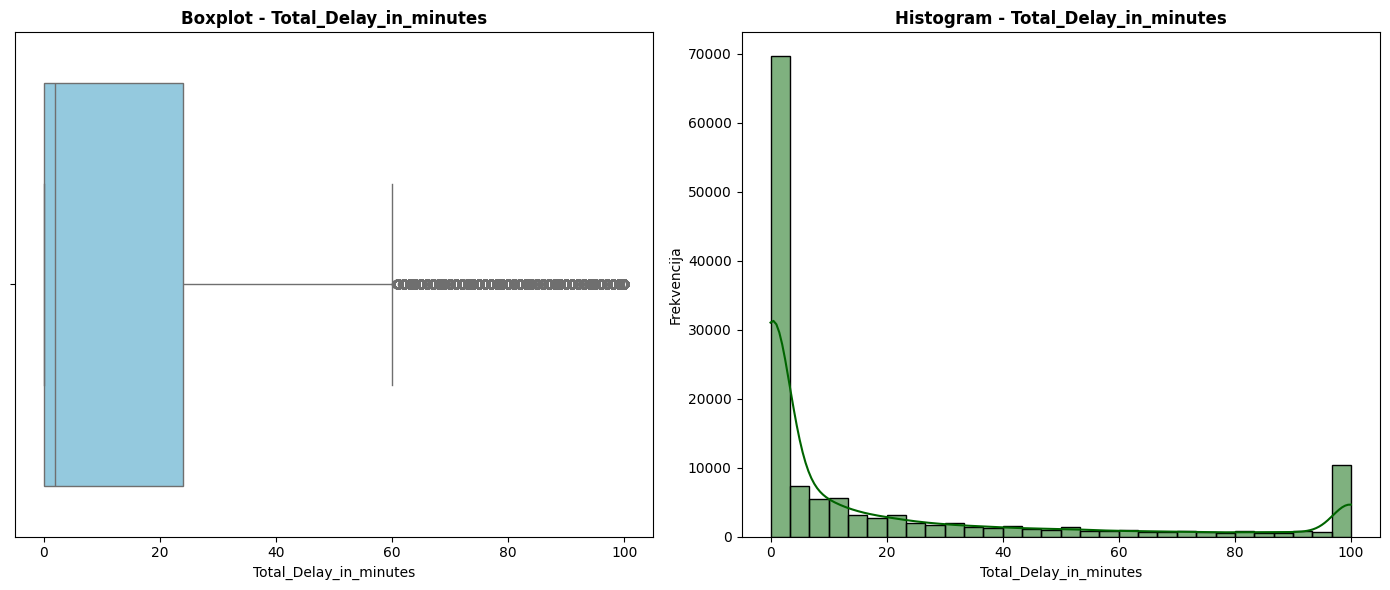


Osnovne statistike za Total_Delay_in_minutes:
  Srednja vrednost: 19.45
  Medijana: 2.00
  St. devijacija: 31.50
  Min: 0.00
  Max: 100.00

D'Agostino K^2 test za Total_Delay_in_minutes: stat=34169.842, p-vrednost=0.000
Podaci nisu normalno raspoređeni

--------------------------------------------------------------------------------
ANALIZA: TOTAL_DELAY_IN_MINUTES vs SATISFACTION
--------------------------------------------------------------------------------


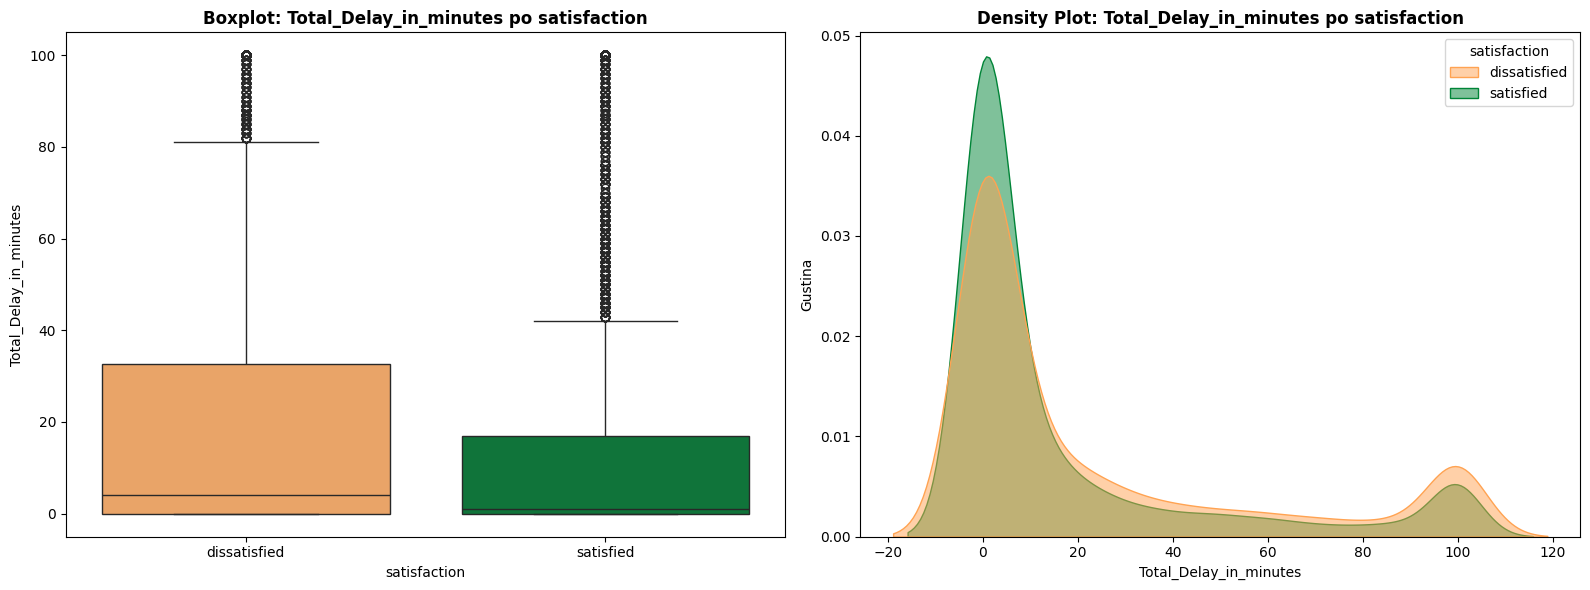

Mann–Whitney U test → p = 1.59e-20, Cliff’s Delta = 0.085
Vrlo slab efekat
--------------------------------------------------------------------------------


In [30]:
ColumnsNumericNonGrades.append('Total_Delay_in_minutes')

print('='*60)
print(f"{'Total_Delay_in_minutes'.upper()}")
print('='*60)
plot_numeric_nongrades(data, 'Total_Delay_in_minutes')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Total_Delay_in_minutes'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Total_Delay_in_minutes')

Age bi mogli da podelimo u tri kategorije: Young,     Adult,      Senior

In [31]:

max_age = data['Age'].max() if 'Age' in data.columns and not data['Age'].empty else 100
    
bins = [0, 30, 55, max_age + 1] 
    
labels = ['Young', 'Adult', 'Senior']
    
data['Age_Group'] = pd.cut(
    data['Age'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True, # Uključuje najnižu vrednost (0)
)

print("Kolona 'Age' je uspešno kategorizovana u 'Age_Group'.")
print(f"Kategorije: {labels}")


Kolona 'Age' je uspešno kategorizovana u 'Age_Group'.
Kategorije: ['Young', 'Adult', 'Senior']


Univarijantna i multivarijantna analiza na novim dobijenim podacima

AGE_GROUP


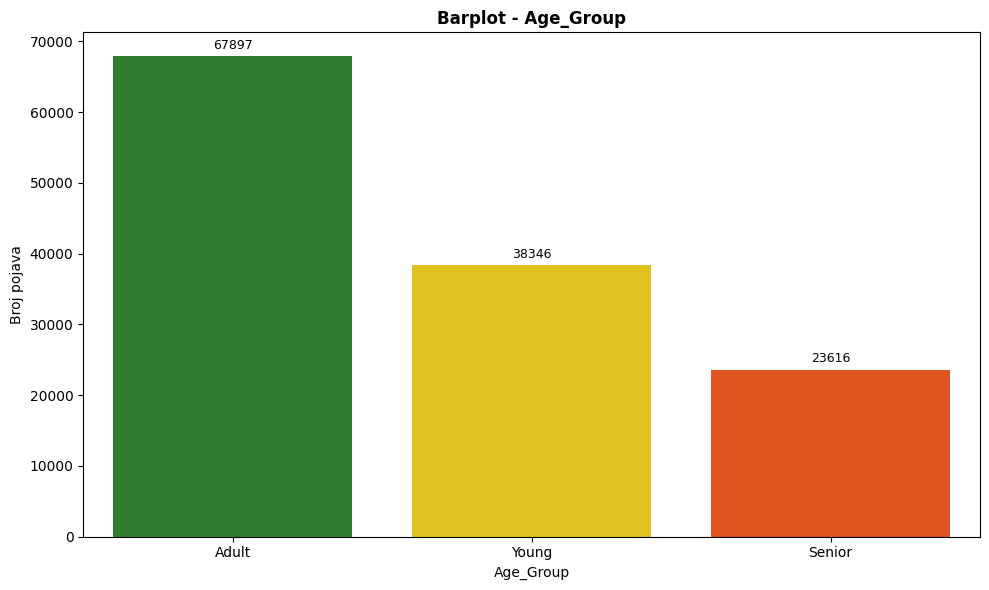


Distribucija kategorija za Age_Group:
Age_Group
Adult     67897
Young     38346
Senior    23616
Name: count, dtype: int64

--------------------------------------------------------------------------------
ANALIZA: AGE_GROUP vs SATISFACTION
--------------------------------------------------------------------------------


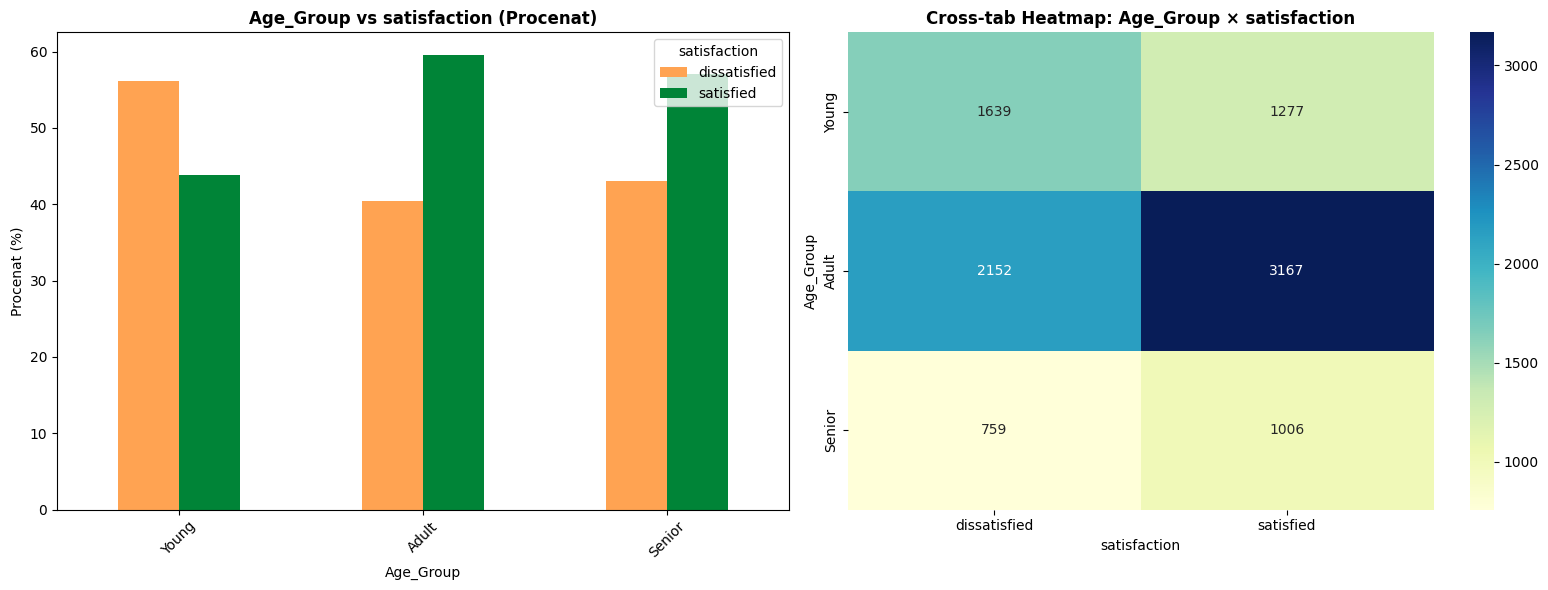

Chi-square test → p = 8.41e-43, Cramer’s V = 0.139 (umerena veza)
--------------------------------------------------------------------------------


In [32]:
print('='*60)
print(f"{'Age_Group'.upper()}")
print('='*60)
plot_categoric(data, 'Age_Group')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Age_Group'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Age_Group')


Flight_distance bi mogli da podelimo u tri kategorije: Short,     Medium,      Long

In [33]:

max_dist = data['Flight Distance'].max() if 'Flight Distance' in data.columns and not data['Flight Distance'].empty else 7000
    
bins = [0, 1000, 4000, max_dist + 1] 
    
labels = ['Short', 'Medium', 'Long']
    
data['Flight_Distance_Group'] = pd.cut(
    data['Flight Distance'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True, 
)

print("Kolona 'Flight Distance' je uspešno kategorizovana u 'Flight_Distance_Group'.")
print(f"Kategorije: {labels}")


Kolona 'Flight Distance' je uspešno kategorizovana u 'Flight_Distance_Group'.
Kategorije: ['Short', 'Medium', 'Long']


Univarijantna i multivarijantna analiza na novim dobijenim podacima

FLIGHT_DISTANCE_GROUP


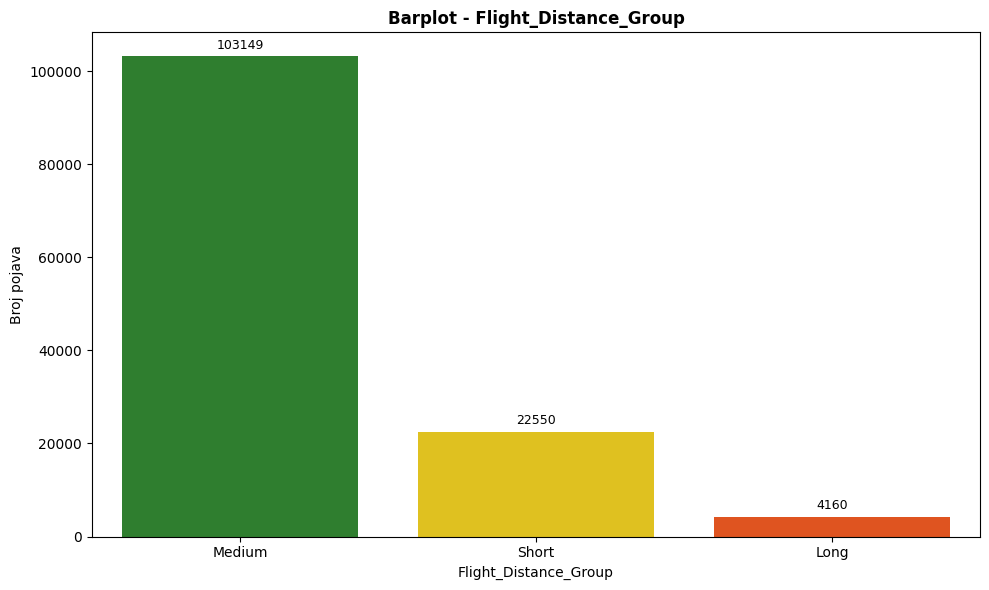


Distribucija kategorija za Flight_Distance_Group:
Flight_Distance_Group
Medium    103149
Short      22550
Long        4160
Name: count, dtype: int64

--------------------------------------------------------------------------------
ANALIZA: FLIGHT_DISTANCE_GROUP vs SATISFACTION
--------------------------------------------------------------------------------


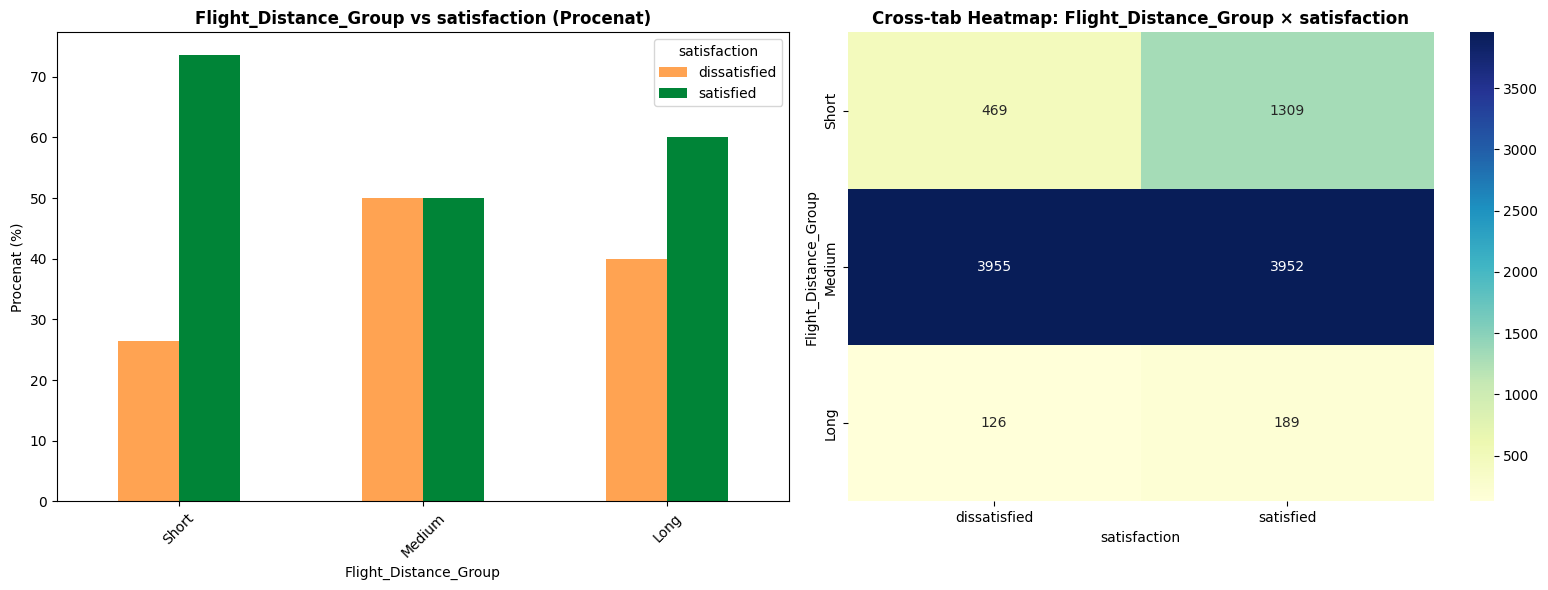

Chi-square test → p = 1.25e-72, Cramer’s V = 0.182 (umerena veza)
--------------------------------------------------------------------------------


In [34]:
print('='*60)
print(f"{'Flight_Distance_Group'.upper()}")
print('='*60)
plot_categoric(data, 'Flight_Distance_Group')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Flight_Distance_Group'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Flight_Distance_Group')


Total delay bi mogli da podelimo u tri kategorije: No_Delay,      Minor_Delay,     Medium_Delay,      Critical_Delay

In [35]:
max_dist = data['Total_Delay_in_minutes'].max() if 'Total_Delay_in_minutes' in data.columns and not data['Total_Delay_in_minutes'].empty else 100

bins = [0, 3, 15, 60, max_dist + 1]    

labels = ['No_Delay','Minor_Delay', 'Medium_Delay', 'Critical_Delay']

data['Total_Delay_in_minutes_group'] = pd.cut(
    data['Total_Delay_in_minutes'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True,
)

print("Kolona 'Total_Delay_in_minutes' je uspešno kategorizovana u 'Total_Delay_in_minutes_group'.")
print(f"Kategorije: {labels}")


Kolona 'Total_Delay_in_minutes' je uspešno kategorizovana u 'Total_Delay_in_minutes_group'.
Kategorije: ['No_Delay', 'Minor_Delay', 'Medium_Delay', 'Critical_Delay']


Univarijantna i multivarijantna analiza na novim dobijenim podacima

TOTAL_DELAY_IN_MINUTES_GROUP


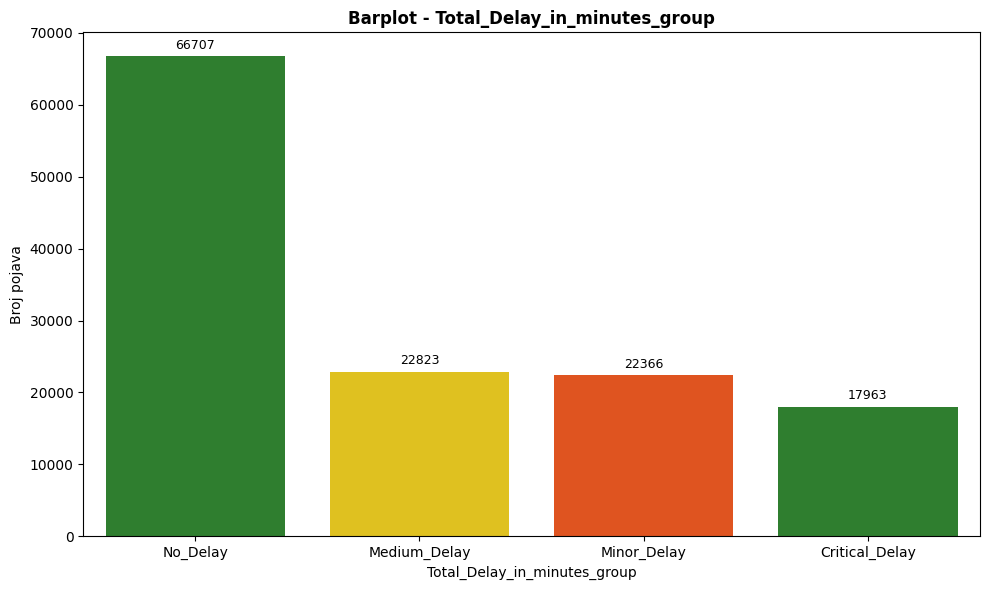


Distribucija kategorija za Total_Delay_in_minutes_group:
Total_Delay_in_minutes_group
No_Delay          66707
Medium_Delay      22823
Minor_Delay       22366
Critical_Delay    17963
Name: count, dtype: int64

--------------------------------------------------------------------------------
ANALIZA: TOTAL_DELAY_IN_MINUTES_GROUP vs SATISFACTION
--------------------------------------------------------------------------------


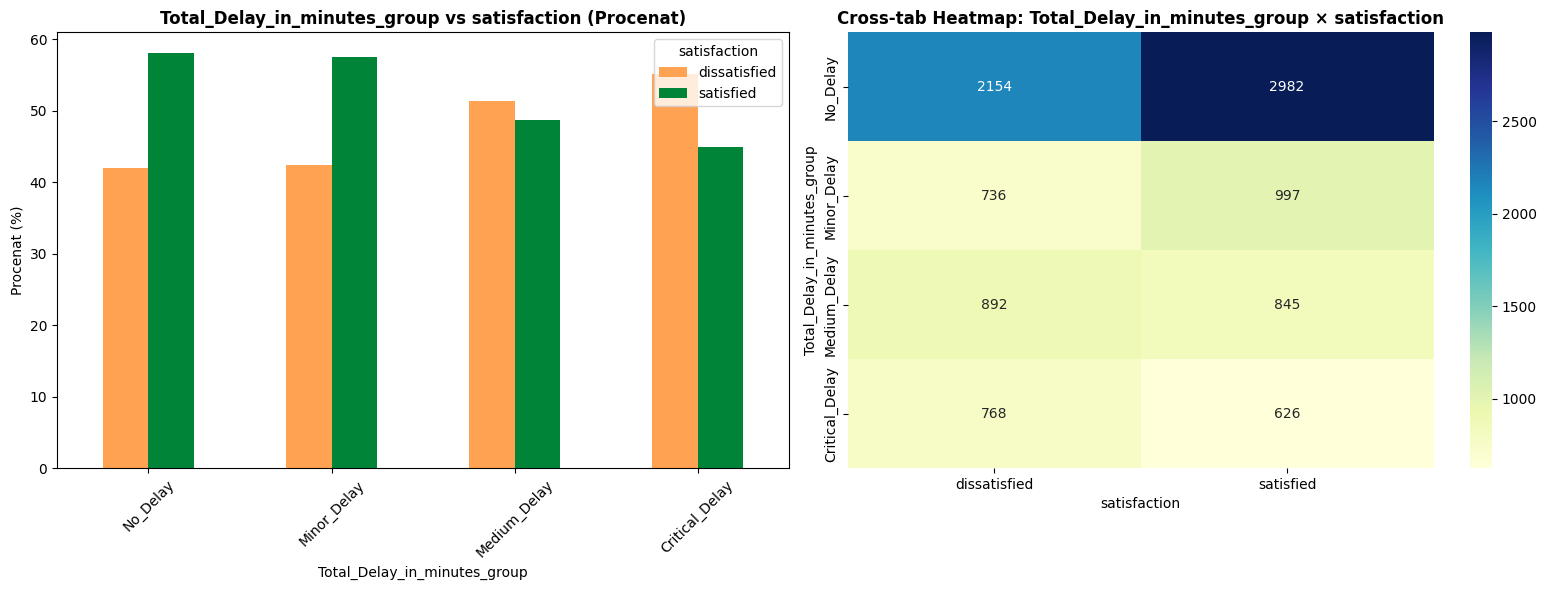

Chi-square test → p = 2.41e-23, Cramer’s V = 0.104 (umerena veza)
--------------------------------------------------------------------------------


In [36]:
print('='*60)
print(f"{'Total_Delay_in_minutes_group'.upper()}")
print('='*60)
plot_categoric(data, 'Total_Delay_in_minutes_group')
    
print(f"\n{'-'*80}")
print(f"ANALIZA: {'Total_Delay_in_minutes_group'.upper()} vs SATISFACTION")
print('-'*80)
plot_target_relationship(data, 'satisfaction', 'Total_Delay_in_minutes_group')

### **6.2	Kodiranje Kategorijskih podataka** 

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129859 entries, 0 to 129879
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   satisfaction                  129859 non-null  object  
 1   Customer Type                 129859 non-null  object  
 2   Age                           129859 non-null  int64   
 3   Type of Travel                129859 non-null  object  
 4   Class                         129859 non-null  object  
 5   Flight Distance               129859 non-null  int64   
 6   Flight_Experience             129859 non-null  int64   
 7   Ground_Service_Quality        129859 non-null  int64   
 8   Total_Delay_in_minutes        129859 non-null  float64 
 9   Age_Group                     129859 non-null  category
 10  Flight_Distance_Group         129859 non-null  category
 11  Total_Delay_in_minutes_group  129859 non-null  category
dtypes: category(3), float64(1), int64(4

Odradićemo LabelEnkodiranje za ciljnu promenljivu

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

TARGET_COL = 'satisfaction'

le = LabelEncoder()
data['Satisfaction_encoded'] = le.fit_transform(data['satisfaction'])
print(data[['satisfaction', 'Satisfaction_encoded']])

#Ostavljamo originalnu Satisfaction, radi lakšeg čitanja kasnije

        satisfaction  Satisfaction_encoded
0          satisfied                     1
1          satisfied                     1
2          satisfied                     1
3          satisfied                     1
4          satisfied                     1
...              ...                   ...
129875     satisfied                     1
129876  dissatisfied                     0
129877  dissatisfied                     0
129878  dissatisfied                     0
129879  dissatisfied                     0

[129859 rows x 2 columns]


Odradićemo Standardno Skaliranje za numeričke vrednosti 

In [39]:
# Kontinuirane numeričke (za Standard Scaling)
SCALE_COLS = ['Age', 'Flight Distance', 'Total_Delay_in_minutes']

scaler = StandardScaler()

data[SCALE_COLS] = scaler.fit_transform(data[SCALE_COLS])


Odradićemo Ordinalno Enkodiranje za ordinalne kategorijske promenljive

In [40]:
OHE_COLS = ['Type of Travel', 'Customer Type']

data = data.reset_index(drop=True) 

ohe = OneHotEncoder(drop='first', sparse_output=False) 

encoded_array = ohe.fit_transform(data[OHE_COLS])

encoded_data = pd.DataFrame(
    encoded_array, 
    columns=ohe.get_feature_names_out(OHE_COLS),
    index=data.index 
)


data = pd.concat([data.drop(OHE_COLS, axis=1), encoded_data], axis=1)
print("\nUspeh: One-Hot Encoding je izvršen bez kreiranja novih NaN vrednosti.")



Uspeh: One-Hot Encoding je izvršen bez kreiranja novih NaN vrednosti.


Odradićemo One Hot Enkodiranje za nominalne kategorijske promenljive

In [41]:
# Ordinalne/Grade/Grupne (za Ordinal Encoding)
ORDINAL_COLS = [
    'Class', 
    'Age_Group', 
    'Flight_Distance_Group', 
    'Total_Delay_in_minutes_group'
]

categories = [
    ['Eco', 'Eco Plus', 'Business'],                        
    ['Young', 'Adult', 'Senior'], 
    ['Short', 'Medium', 'Long'],             
    ['No_Delay', 'Minor_Delay', 'Medium_Delay', 'Critical_Delay']           
]
print(data.isnull().sum())


ordinal_encoder = OrdinalEncoder(categories=categories)
data[ORDINAL_COLS] = ordinal_encoder.fit_transform(data[ORDINAL_COLS])

satisfaction                       0
Age                                0
Class                              0
Flight Distance                    0
Flight_Experience                  0
Ground_Service_Quality             0
Total_Delay_in_minutes             0
Age_Group                          0
Flight_Distance_Group              0
Total_Delay_in_minutes_group       0
Satisfaction_encoded               0
Type of Travel_Personal Travel     0
Customer Type_disloyal Customer    0
dtype: int64


Naša tabela sad izgleda ovako.

In [42]:
data.info()
data
data.to_csv("clean_airline_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129859 entries, 0 to 129858
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   satisfaction                     129859 non-null  object 
 1   Age                              129859 non-null  float64
 2   Class                            129859 non-null  float64
 3   Flight Distance                  129859 non-null  float64
 4   Flight_Experience                129859 non-null  int64  
 5   Ground_Service_Quality           129859 non-null  int64  
 6   Total_Delay_in_minutes           129859 non-null  float64
 7   Age_Group                        129859 non-null  float64
 8   Flight_Distance_Group            129859 non-null  float64
 9   Total_Delay_in_minutes_group     129859 non-null  float64
 10  Satisfaction_encoded             129859 non-null  int64  
 11  Type of Travel_Personal Travel   129859 non-null  float64
 12  Cu

## **7. Modelovanje**
U ovom delu ćemo razviti različite modele mašinskog učenja za predikciju zadovoljstva kupaca.

In [43]:


# Import biblioteka za modelovanje
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import metrika za evaluaciju
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc
)


def evaluate_model_cv(model, X, y, model_name, n_splits=5, random_state=42):
    """
    Evaluira model korišćenjem stratified k-fold cross-validacije.
    """
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    metrics_list = []
    
    print(f"\n{'='*80}")
    print(f"EVALUACIJA MODELA: {model_name}")
    print('='*80)
    
    for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X, y), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Treniranje modela
        model.fit(X_train, y_train)
        
        # Predikcije
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Metrike za trening set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
        train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)
        
        # Metrike za validacioni set
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
        val_recall = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
        val_f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)
        
        metrics_list.append({
            'Fold': fold,
            'Train Accuracy': train_accuracy,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Val Accuracy': val_accuracy,
            'Val Precision': val_precision,
            'Val Recall': val_recall,
            'Val F1': val_f1
        })
        
        print(f"\nFold {fold}:")
        print(f"  Train - Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Rec: {train_recall:.4f}, F1: {train_f1:.4f}")
        print(f"  Val   - Acc: {val_accuracy:.4f}, Prec: {val_precision:.4f}, Rec: {val_recall:.4f}, F1: {val_f1:.4f}")
    
    # Kreiranje DataFrame-a sa metrikama
    metrics_df = pd.DataFrame(metrics_list)
    
    # Prosečne metrike
    print(f"\n{'='*80}")
    print("PROSEČNE METRIKE:")
    print('='*80)
    print(f"Train - Acc: {metrics_df['Train Accuracy'].mean():.4f} (±{metrics_df['Train Accuracy'].std():.4f})")
    print(f"        Prec: {metrics_df['Train Precision'].mean():.4f} (±{metrics_df['Train Precision'].std():.4f})")
    print(f"        Rec: {metrics_df['Train Recall'].mean():.4f} (±{metrics_df['Train Recall'].std():.4f})")
    print(f"        F1: {metrics_df['Train F1'].mean():.4f} (±{metrics_df['Train F1'].std():.4f})")
    print(f"\nVal   - Acc: {metrics_df['Val Accuracy'].mean():.4f} (±{metrics_df['Val Accuracy'].std():.4f})")
    print(f"        Prec: {metrics_df['Val Precision'].mean():.4f} (±{metrics_df['Val Precision'].std():.4f})")
    print(f"        Rec: {metrics_df['Val Recall'].mean():.4f} (±{metrics_df['Val Recall'].std():.4f})")
    print(f"        F1: {metrics_df['Val F1'].mean():.4f} (±{metrics_df['Val F1'].std():.4f})")
    
    return metrics_df

print("Funkcija za evaluaciju modela kreirana!")

Funkcija za evaluaciju modela kreirana!


In [44]:
# Priprema podataka za modelovanje
X_data = data.drop(columns=['satisfaction', 'Satisfaction_encoded'], errors='ignore')
y_data = data['Satisfaction_encoded']

print(f"Dimenzije X: {X_data.shape}")
print(f"Dimenzije y: {y_data.shape}")
print(f"\nDistribucija ciljne promenljive:")
print(y_data.value_counts())

Dimenzije X: (129859, 11)
Dimenzije y: (129859,)

Distribucija ciljne promenljive:
Satisfaction_encoded
1    71085
0    58774
Name: count, dtype: int64


### **7.1 Logistička regresija**

In [45]:
# Treniranje Logistic Regression modela
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Evaluacija modela
logreg_metrics = evaluate_model_cv(logreg_model, X_data, y_data, "Logistic Regression")


EVALUACIJA MODELA: Logistic Regression

Fold 1:
  Train - Acc: 0.8002, Prec: 0.7999, Rec: 0.8002, F1: 0.7999
  Val   - Acc: 0.7987, Prec: 0.7984, Rec: 0.7987, F1: 0.7983

Fold 2:
  Train - Acc: 0.7992, Prec: 0.7989, Rec: 0.7992, F1: 0.7988
  Val   - Acc: 0.7991, Prec: 0.7988, Rec: 0.7991, F1: 0.7987

Fold 3:
  Train - Acc: 0.7998, Prec: 0.7995, Rec: 0.7998, F1: 0.7995
  Val   - Acc: 0.7982, Prec: 0.7979, Rec: 0.7982, F1: 0.7978

Fold 4:
  Train - Acc: 0.7997, Prec: 0.7994, Rec: 0.7997, F1: 0.7994
  Val   - Acc: 0.8009, Prec: 0.8007, Rec: 0.8009, F1: 0.8007

Fold 5:
  Train - Acc: 0.7990, Prec: 0.7987, Rec: 0.7990, F1: 0.7986
  Val   - Acc: 0.8000, Prec: 0.7997, Rec: 0.8000, F1: 0.7996

PROSEČNE METRIKE:
Train - Acc: 0.7996 (±0.0005)
        Prec: 0.7993 (±0.0005)
        Rec: 0.7996 (±0.0005)
        F1: 0.7992 (±0.0005)

Val   - Acc: 0.7994 (±0.0011)
        Prec: 0.7991 (±0.0011)
        Rec: 0.7994 (±0.0011)
        F1: 0.7990 (±0.0011)


### **7.2 Decision Tree**

In [46]:
# Grid Search za optimalne hiperparametre Decision Tree-a
from sklearn.model_selection import GridSearchCV


param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

print("Pokretanje Grid Search-a za Decision Tree...")
grid_search_dt.fit(X_data, y_data)

print(f"\nNajbolji parametri: {grid_search_dt.best_params_}")
print(f"Najbolji score: {grid_search_dt.best_score_:.4f}")

Pokretanje Grid Search-a za Decision Tree...
Fitting 5 folds for each of 45 candidates, totalling 225 fits

Najbolji parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Najbolji score: 0.6761


In [47]:
# Evaluacija Decision Tree modela sa optimalnim parametrima
best_dt_model = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
dt_metrics = evaluate_model_cv(best_dt_model, X_data, y_data, "Decision Tree (Optimized)")


EVALUACIJA MODELA: Decision Tree (Optimized)

Fold 1:
  Train - Acc: 0.8414, Prec: 0.8420, Rec: 0.8414, F1: 0.8416
  Val   - Acc: 0.8292, Prec: 0.8299, Rec: 0.8292, F1: 0.8294

Fold 2:
  Train - Acc: 0.8384, Prec: 0.8405, Rec: 0.8384, F1: 0.8387
  Val   - Acc: 0.8344, Prec: 0.8360, Rec: 0.8344, F1: 0.8347

Fold 3:
  Train - Acc: 0.8401, Prec: 0.8407, Rec: 0.8401, F1: 0.8402
  Val   - Acc: 0.8309, Prec: 0.8316, Rec: 0.8309, F1: 0.8311

Fold 4:
  Train - Acc: 0.8406, Prec: 0.8414, Rec: 0.8406, F1: 0.8408
  Val   - Acc: 0.8338, Prec: 0.8345, Rec: 0.8338, F1: 0.8340

Fold 5:
  Train - Acc: 0.8408, Prec: 0.8426, Rec: 0.8408, F1: 0.8411
  Val   - Acc: 0.8285, Prec: 0.8306, Rec: 0.8285, F1: 0.8288

PROSEČNE METRIKE:
Train - Acc: 0.8403 (±0.0011)
        Prec: 0.8414 (±0.0009)
        Rec: 0.8403 (±0.0011)
        F1: 0.8405 (±0.0011)

Val   - Acc: 0.8314 (±0.0026)
        Prec: 0.8325 (±0.0026)
        Rec: 0.8314 (±0.0026)
        F1: 0.8316 (±0.0026)


### **7.3 Random Forest**

In [48]:
# Randomized Search za Random Forest (brže od Grid Search-a)
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=20, cv=5, 
                                       scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

print("Pokretanje Randomized Search-a za Random Forest...")
random_search_rf.fit(X_data, y_data)

print(f"\nNajbolji parametri: {random_search_rf.best_params_}")
print(f"Najbolji score: {random_search_rf.best_score_:.4f}")

Pokretanje Randomized Search-a za Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Najbolji parametri: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Najbolji score: 0.6914


In [49]:
# Evaluacija Random Forest modela
best_rf_model = RandomForestClassifier(**random_search_rf.best_params_, random_state=42)
rf_metrics = evaluate_model_cv(best_rf_model, X_data, y_data, "Random Forest (Optimized)")


EVALUACIJA MODELA: Random Forest (Optimized)

Fold 1:
  Train - Acc: 0.8408, Prec: 0.8414, Rec: 0.8408, F1: 0.8410
  Val   - Acc: 0.8315, Prec: 0.8323, Rec: 0.8315, F1: 0.8317

Fold 2:
  Train - Acc: 0.8398, Prec: 0.8403, Rec: 0.8398, F1: 0.8399
  Val   - Acc: 0.8364, Prec: 0.8369, Rec: 0.8364, F1: 0.8366

Fold 3:
  Train - Acc: 0.8400, Prec: 0.8406, Rec: 0.8400, F1: 0.8401
  Val   - Acc: 0.8341, Prec: 0.8347, Rec: 0.8341, F1: 0.8343

Fold 4:
  Train - Acc: 0.8396, Prec: 0.8405, Rec: 0.8396, F1: 0.8398
  Val   - Acc: 0.8369, Prec: 0.8376, Rec: 0.8369, F1: 0.8371

Fold 5:
  Train - Acc: 0.8403, Prec: 0.8414, Rec: 0.8403, F1: 0.8405
  Val   - Acc: 0.8296, Prec: 0.8309, Rec: 0.8296, F1: 0.8299

PROSEČNE METRIKE:
Train - Acc: 0.8401 (±0.0005)
        Prec: 0.8408 (±0.0005)
        Rec: 0.8401 (±0.0005)
        F1: 0.8403 (±0.0005)

Val   - Acc: 0.8337 (±0.0031)
        Prec: 0.8344 (±0.0029)
        Rec: 0.8337 (±0.0031)
        F1: 0.8339 (±0.0031)


### **7.4 XGBoost**

In [50]:
# Randomized Search za XGBoost


param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=20, cv=5,
                                        scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

print("Pokretanje Randomized Search-a za XGBoost...")
random_search_xgb.fit(X_data, y_data)

print(f"\nNajbolji parametri: {random_search_xgb.best_params_}")
print(f"Najbolji score: {random_search_xgb.best_score_:.4f}")

Pokretanje Randomized Search-a za XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Najbolji parametri: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Najbolji score: 0.6931


In [51]:
# Evaluacija XGBoost modela
best_xgb_model = XGBClassifier(**random_search_xgb.best_params_, random_state=42, eval_metric='logloss')
xgb_metrics = evaluate_model_cv(best_xgb_model, X_data, y_data, "XGBoost (Optimized)")


EVALUACIJA MODELA: XGBoost (Optimized)

Fold 1:
  Train - Acc: 0.8454, Prec: 0.8453, Rec: 0.8454, F1: 0.8453
  Val   - Acc: 0.8322, Prec: 0.8321, Rec: 0.8322, F1: 0.8321

Fold 2:
  Train - Acc: 0.8444, Prec: 0.8443, Rec: 0.8444, F1: 0.8442
  Val   - Acc: 0.8332, Prec: 0.8331, Rec: 0.8332, F1: 0.8329

Fold 3:
  Train - Acc: 0.8444, Prec: 0.8442, Rec: 0.8444, F1: 0.8443
  Val   - Acc: 0.8340, Prec: 0.8338, Rec: 0.8340, F1: 0.8338

Fold 4:
  Train - Acc: 0.8439, Prec: 0.8438, Rec: 0.8439, F1: 0.8438
  Val   - Acc: 0.8373, Prec: 0.8371, Rec: 0.8373, F1: 0.8372

Fold 5:
  Train - Acc: 0.8465, Prec: 0.8463, Rec: 0.8465, F1: 0.8463
  Val   - Acc: 0.8300, Prec: 0.8299, Rec: 0.8300, F1: 0.8299

PROSEČNE METRIKE:
Train - Acc: 0.8449 (±0.0010)
        Prec: 0.8448 (±0.0010)
        Rec: 0.8449 (±0.0010)
        F1: 0.8448 (±0.0010)

Val   - Acc: 0.8333 (±0.0027)
        Prec: 0.8332 (±0.0026)
        Rec: 0.8333 (±0.0027)
        F1: 0.8332 (±0.0026)


## **8. Poređenje modela i finalna evaluacija**


POREĐENJE PERFORMANSI MODELA
              Model  Train Accuracy  Val Accuracy  Train F1  Val F1
Logistic Regression          0.7996        0.7994    0.7992  0.7990
      Decision Tree          0.8403        0.8314    0.8405  0.8316
      Random Forest          0.8401        0.8337    0.8403  0.8339
            XGBoost          0.8449        0.8333    0.8448  0.8332


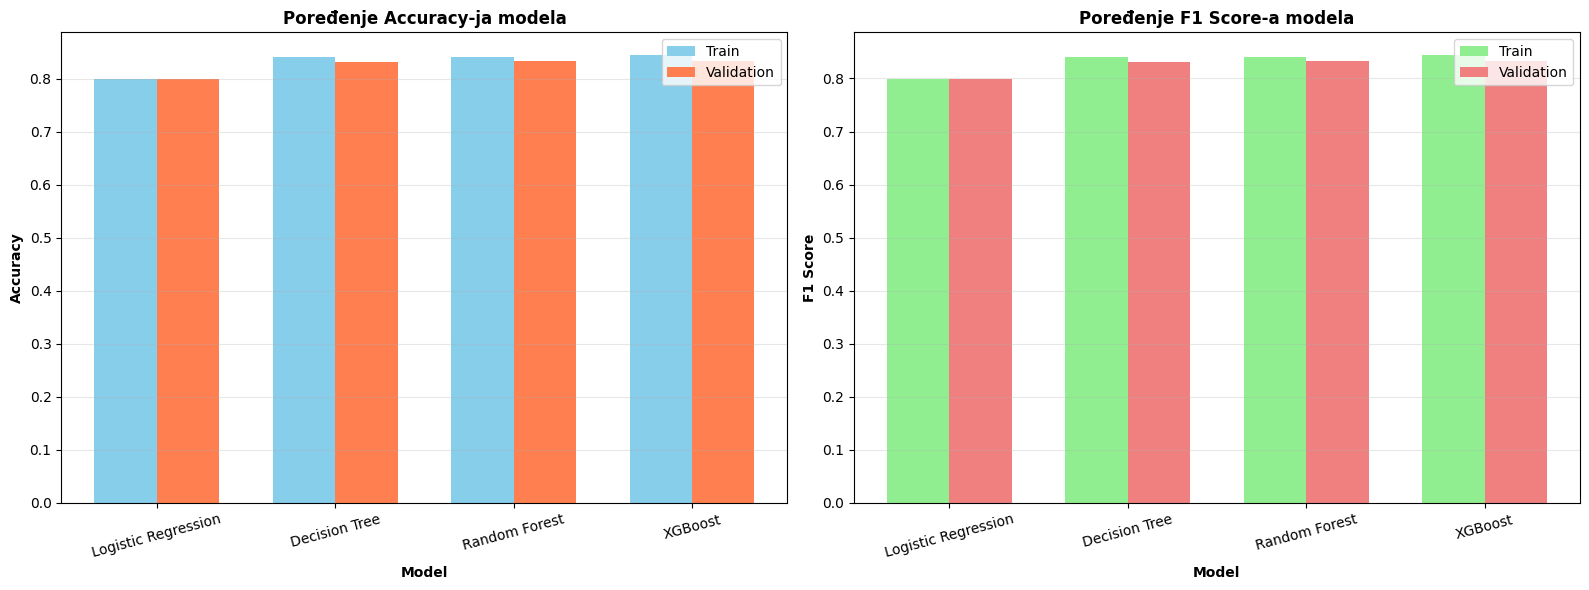

In [52]:
# Poređenje svih modela
comparison_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Train Accuracy': [
        logreg_metrics['Train Accuracy'].mean(),
        dt_metrics['Train Accuracy'].mean(),
        rf_metrics['Train Accuracy'].mean(),
        xgb_metrics['Train Accuracy'].mean()
    ],
    'Val Accuracy': [
        logreg_metrics['Val Accuracy'].mean(),
        dt_metrics['Val Accuracy'].mean(),
        rf_metrics['Val Accuracy'].mean(),
        xgb_metrics['Val Accuracy'].mean()
    ],
    'Train F1': [
        logreg_metrics['Train F1'].mean(),
        dt_metrics['Train F1'].mean(),
        rf_metrics['Train F1'].mean(),
        xgb_metrics['Train F1'].mean()
    ],
    'Val F1': [
        logreg_metrics['Val F1'].mean(),
        dt_metrics['Val F1'].mean(),
        rf_metrics['Val F1'].mean(),
        xgb_metrics['Val F1'].mean()
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\n" + "="*80)
print("POREĐENJE PERFORMANSI MODELA")
print("="*80)
print(comparison_df.to_string(index=False))

# Vizualizacija poređenja
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy
x = np.arange(len(comparison_df['Model']))
width = 0.35

axes[0].bar(x - width/2, comparison_df['Train Accuracy'], width, label='Train', color='skyblue')
axes[0].bar(x + width/2, comparison_df['Val Accuracy'], width, label='Validation', color='coral')
axes[0].set_xlabel('Model', fontweight='bold')
axes[0].set_ylabel('Accuracy', fontweight='bold')
axes[0].set_title('Poređenje Accuracy-ja modela', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Model'], rotation=15)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# F1 Score
axes[1].bar(x - width/2, comparison_df['Train F1'], width, label='Train', color='lightgreen')
axes[1].bar(x + width/2, comparison_df['Val F1'], width, label='Validation', color='lightcoral')
axes[1].set_xlabel('Model', fontweight='bold')
axes[1].set_ylabel('F1 Score', fontweight='bold')
axes[1].set_title('Poređenje F1 Score-a modela', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison_df['Model'], rotation=15)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### **8.1 ROC krive za sve modele**

In [53]:
# Kreiranje train/test split-a za finalno testiranje
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

# Treniranje svih modela na train setu
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42),
    'Random Forest': RandomForestClassifier(**random_search_rf.best_params_, random_state=42),
    'XGBoost': XGBClassifier(**random_search_xgb.best_params_, random_state=42, eval_metric='logloss')
}

# Treniranje modela
print("Treniranje finalnih modela...")
models['Logistic Regression'].fit(X_train_linear, y_train_linear)
models['Decision Tree'].fit(X_train_tree, y_train_tree)
models['Random Forest'].fit(X_train_tree, y_train_tree)
models['XGBoost'].fit(X_train_tree, y_train_tree)

print("Svi modeli su uspešno trenirani!")

Treniranje finalnih modela...
Svi modeli su uspešno trenirani!


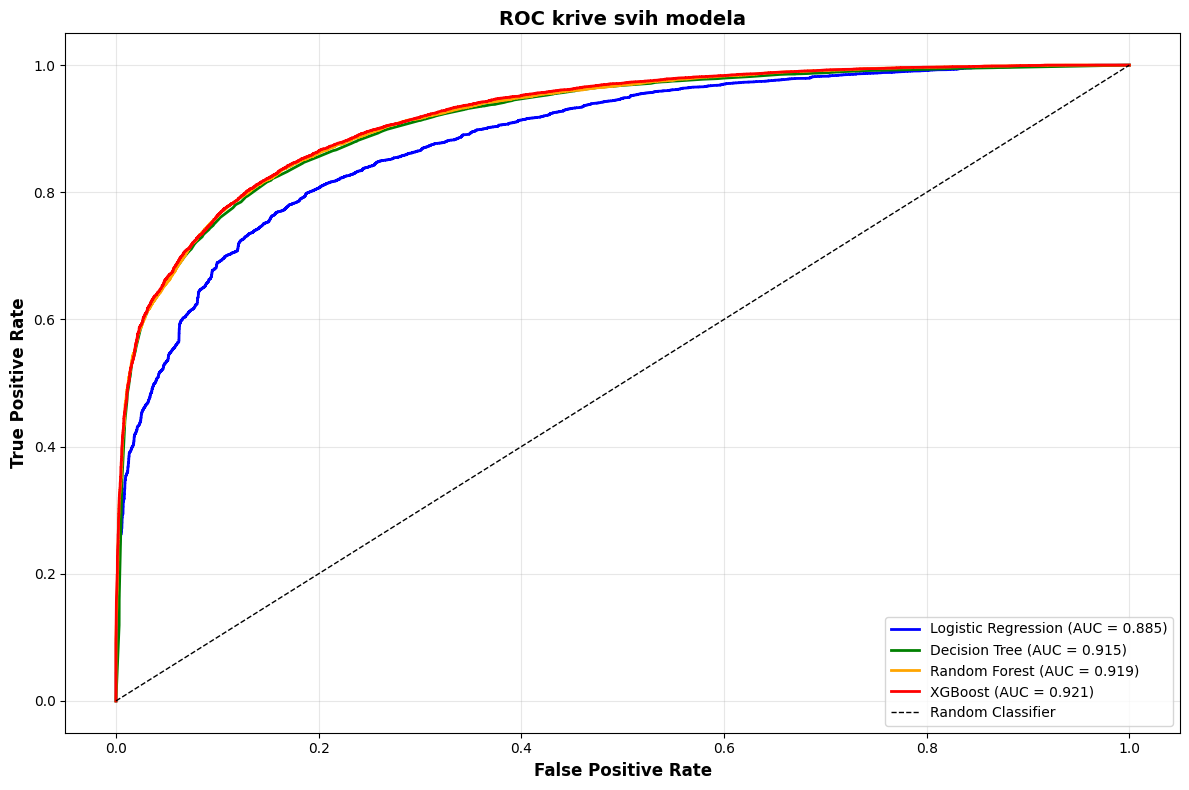


AUC skorovi:
  Logistic Regression: 0.8851
  Decision Tree: 0.9151
  Random Forest: 0.9189
  XGBoost: 0.9205


In [54]:
# ROC krive za sve modele
plt.figure(figsize=(12, 8))

# Kreiranje binarnih labela (1 za 'satisfied', 0 za ostalo)
# Za linear model
y_test_linear_binary = (y_test_linear == 'satisfied').astype(int) if y_test_linear.dtype == 'object' else y_test_linear

# Za tree model (provera da li je već enkodiran)
if y_test_tree.dtype == 'object':
    y_test_tree_binary = (y_test_tree == 'satisfied').astype(int)
else:
    # Ako je već enkodiran, pretpostavljamo da je 1 = 'satisfied'
    y_test_tree_binary = y_test_tree

# Logistic Regression
y_proba_lr = models['Logistic Regression'].predict_proba(X_test_linear)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_linear_binary, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2, color='blue')

# Decision Tree
y_proba_dt = models['Decision Tree'].predict_proba(X_test_tree)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_tree_binary, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', linewidth=2, color='green')

# Random Forest
y_proba_rf = models['Random Forest'].predict_proba(X_test_tree)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_tree_binary, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2, color='orange')

# XGBoost
y_proba_xgb = models['XGBoost'].predict_proba(X_test_tree)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_tree_binary, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2, color='red')

# Dijagonala (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC krive svih modela', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAUC skorovi:")
print(f"  Logistic Regression: {auc_lr:.4f}")
print(f"  Decision Tree: {auc_dt:.4f}")
print(f"  Random Forest: {auc_rf:.4f}")
print(f"  XGBoost: {auc_xgb:.4f}")

### **8.2 Konfuziona matrica za najbolji model**


Najbolji model: XGBoost (AUC = 0.9205)


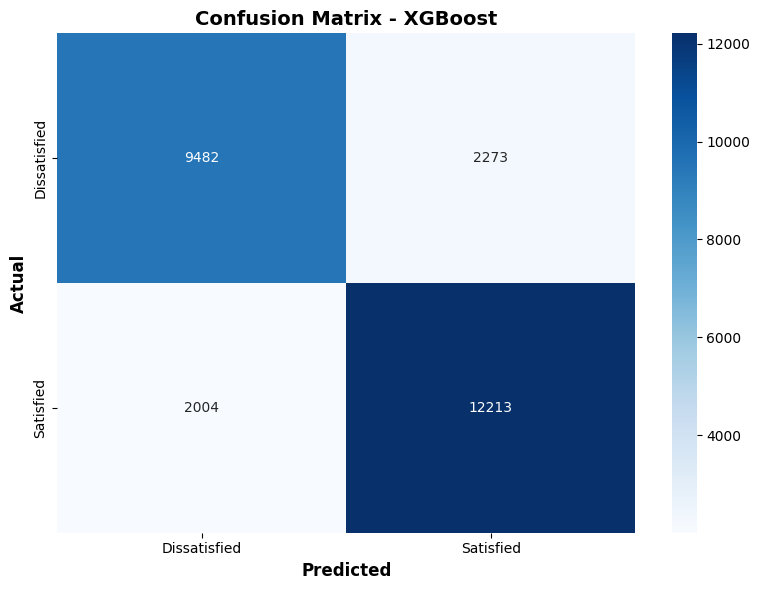


CLASSIFICATION REPORT - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     11755
           1       0.84      0.86      0.85     14217

    accuracy                           0.84     25972
   macro avg       0.83      0.83      0.83     25972
weighted avg       0.84      0.84      0.84     25972



In [55]:
# Određivanje najboljeg modela (po AUC skoru)
auc_scores = {'Logistic Regression': auc_lr, 'Decision Tree': auc_dt, 
              'Random Forest': auc_rf, 'XGBoost': auc_xgb}
best_model_name = max(auc_scores, key=auc_scores.get)

print(f"\nNajbolji model: {best_model_name} (AUC = {auc_scores[best_model_name]:.4f})")

# Odabir najboljeg modela i odgovarajućeg test seta
if best_model_name == 'Logistic Regression':
    best_model = models['Logistic Regression']
    X_test_best = X_test_linear
    y_test_best = y_test_linear
else:
    best_model = models[best_model_name]
    X_test_best = X_test_tree
    y_test_best = y_test_tree

# Predikcije
y_pred_best = best_model.predict(X_test_best)

# Confusion matrix
cm = confusion_matrix(y_test_best, y_pred_best)

# Vizualizacija confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("="*80)
print(classification_report(y_test_best, y_pred_best))

### **8.3 Feature Importance analiza**

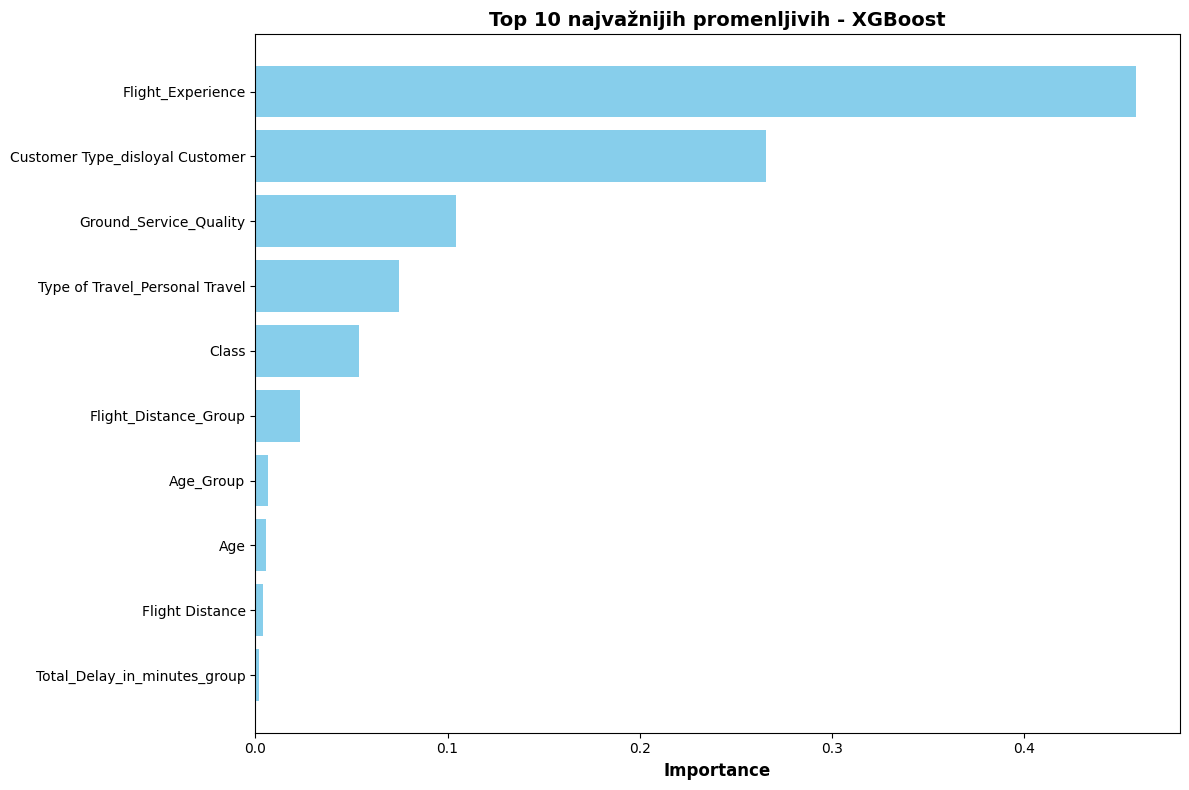


Top 10 najvažnijih promenljivih:
                        Feature  Importance
              Flight_Experience    0.458047
Customer Type_disloyal Customer    0.265443
         Ground_Service_Quality    0.104420
 Type of Travel_Personal Travel    0.074787
                          Class    0.053777
          Flight_Distance_Group    0.023146
                      Age_Group    0.006460
                            Age    0.005411
                Flight Distance    0.004150
   Total_Delay_in_minutes_group    0.002198


In [57]:
# Feature importance za tree-based modele
if best_model_name in ['Decision Tree', 'Random Forest', 'XGBoost']:
    feature_importance = best_model.feature_importances_
    feature_names = X_test_best.columns
    
    # Kreiranje DataFrame-a
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    # Top 10 najvažnijih promenljivih
    top_10 = importance_df.head(10)
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_10)), top_10['Importance'], color='skyblue')
    plt.yticks(range(len(top_10)), top_10['Feature'])
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.title(f'Top 10 najvažnijih promenljivih - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 najvažnijih promenljivih:")
    print(importance_df.head(10).to_string(index=False))

## **9. Zaključak**

### **Glavni nalazi:**

1. **Performanse modela:**
   - Svi razvijeni modeli su pokazali vrlo dobre performanse na validacionim podelama.
   - Ensemble pristupi (Random Forest i XGBoost) su u proseku davali najbolje rezultate, dok je Logistic Regression pružio dobru baznu liniju i jasnu interpretabilnost.

2. **Najvažniji faktori zadovoljstva (na osnovu engineered i enkodovanih atributa):**
   - Ground_Service_Quality i Flight_Experience (sintetisane ocene usluga pre i tokom leta)
   - Class (viši skorovi za Business)
   - Type of Travel (Business vs Personal)
   - Online boarding / online procesi (kroz komponentu Ground_Service_Quality)
   - Total_Delay_in_minutes (negativan uticaj, ali manji od kvaliteta usluga)

3. **Ključni uvidi:**
   - Kvalitet usluga (na zemlji i u letu) presudno utiče na zadovoljstvo i amortizuje negativne efekte manjeg kašnjenja.
   - Putnici Business klase i poslovnih putovanja imaju veću verovatnoću zadovoljstva.
   - Ukupno kašnjenje utiče na zadovoljstvo, ali nakon čišćenja i limitiranja outliera, značaj je manji od servisa.

### **Preporuke za aviokompaniju:**

1. **Ulagati u online i ground procese** (check-in, boarding, support) — brži i pouzdaniji tokovi povećavaju zadovoljstvo.
2. **Poboljšati Flight Experience** (udobnost sedišta, čistoća, entertainment) — direktno podiže verovatnoću zadovoljstva.
3. **Segmentisana ponuda** za Business vs Personal putnike (različite prioritizacije i benefiti).
4. **Kontrola kašnjenja** — i dalje raditi na smanjenju, i transparentnoj komunikaciji pri većim kašnjenjima.
5. **Praćenje feature importance** u produkciji i prilagođavanje ponude po segmentima.